## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Cs"
indep_variables = ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha',
    'A_year', 'F_Soil_ID', 'AEDR_mean', 'Distance_km', 'Azimuth']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean,Distance_km,Azimuth
0,0,26.060965,25.423284,49.081648,68,1,3.524231,5.926403,249
1,0,4.303100,4.705979,8.731641,15,1,3.830667,6.018960,249
2,0,28.142898,27.556869,54.703060,69,1,0.483571,13.046428,189
3,0,14.953551,8.506028,40.420188,15,2,0.364500,12.741627,189
4,0,7.208435,3.425669,2.120687,10,2,0.333333,12.893213,189


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.705262
1,8.420682
2,5.099866
3,3.737670
4,4.290459


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7470342317210092, 0.7687024091682962, 0.7680195792730296]
    Mean: 0.761
    Std: 0.010

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.81338946 0.94474526 0.96190785]
    Mean: 0.907
    Std: 0.066

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9035083663669159, 0.6743303621982459, 0.8445324751497985]
    Mean: 0.807
    Std: 0.097

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.9418725995630293                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.1871888610118586                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.16900510034523616                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 147         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.3539794420915652                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9418725995630293
Gamma: 0.1871888610118586
Learning_rate: 0.16900510034523616
Max_depth: 3
N_estimators: 147
Subsample: 0.3539794420915652


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:5.05733	validation_1-rmse:4.36935
[1]	validation_0-rmse:4.31327	validation_1-rmse:3.66496
[2]	validation_0-rmse:3.68517	validation_1-rmse:3.08845
[3]	validation_0-rmse:3.14441	validation_1-rmse:2.65177
[4]	validation_0-rmse:2.67661	validation_1-rmse:2.28428
[5]	validation_0-rmse:2.35663	validation_1-rmse:2.03850
[6]	validation_0-rmse:2.06633	validation_1-rmse:1.80175
[7]	validation_0-rmse:1.80346	validation_1-rmse:1.63479


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.59109	validation_1-rmse:1.51655
[9]	validation_0-rmse:1.43245	validation_1-rmse:1.49169
[10]	validation_0-rmse:1.26370	validation_1-rmse:1.45739
[11]	validation_0-rmse:1.14496	validation_1-rmse:1.44361
[12]	validation_0-rmse:1.06369	validation_1-rmse:1.41765
[13]	validation_0-rmse:0.99505	validation_1-rmse:1.35434
[14]	validation_0-rmse:0.92775	validation_1-rmse:1.31054
[15]	validation_0-rmse:0.87280	validation_1-rmse:1.27791
[16]	validation_0-rmse:0.82700	validation_1-rmse:1.25777
[17]	validation_0-rmse:0.80628	validation_1-rmse:1.24899
[18]	validation_0-rmse:0.77549	validation_1-rmse:1.25265
[19]	validation_0-rmse:0.74779	validation_1-rmse:1.24337
[20]	validation_0-rmse:0.72429	validation_1-rmse:1.21524
[21]	validation_0-rmse:0.70759	validation_1-rmse:1.18169
[22]	validation_0-rmse:0.69106	validation_1-rmse:1.19370
[23]	validation_0-rmse:0.67380	validation_1-rmse:1.19126
[24]	validation_0-rmse:0.65635	validation_1-rmse:1.20385
[25]	validation_0-rmse:0.63789	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.94656	validation_1-rmse:5.00566
[1]	validation_0-rmse:4.20299	validation_1-rmse:4.25358
[2]	validation_0-rmse:3.59313	validation_1-rmse:3.67032
[3]	validation_0-rmse:3.06455	validation_1-rmse:3.22113
[4]	validation_0-rmse:2.65153	validation_1-rmse:2.85081
[5]	validation_0-rmse:2.29879	validation_1-rmse:2.55902
[6]	validation_0-rmse:1.99951	validation_1-rmse:2.26296
[7]	validation_0-rmse:1.76429	validation_1-rmse:2.07811
[8]	validation_0-rmse:1.56960	validation_1-rmse:1.94142
[9]	validation_0-rmse:1.39056	validation_1-rmse:1.78612
[10]	validation_0-rmse:1.26072	validation_1-rmse:1.68850
[11]	validation_0-rmse:1.14158	validation_1-rmse:1.57407
[12]	validation_0-rmse:1.01500	validation_1-rmse:1.48509
[13]	validation_0-rmse:0.92015	validation_1-rmse:1.42713
[14]	validation_0-rmse:0.86376	validation_1-rmse:1.35450
[15]	validation_0-rmse:0.82852	validation_1-rmse:1.32188
[16]	validation_0-rmse:0.78903	validation_1-rmse:1.28143
[17]	validation_0-rmse:0.74890	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.97366	validation_1-rmse:4.70312
[1]	validation_0-rmse:4.25363	validation_1-rmse:3.98186
[2]	validation_0-rmse:3.63376	validation_1-rmse:3.37465
[3]	validation_0-rmse:3.20041	validation_1-rmse:2.96169
[4]	validation_0-rmse:2.78455	validation_1-rmse:2.55411
[5]	validation_0-rmse:2.42019	validation_1-rmse:2.23937
[6]	validation_0-rmse:2.12670	validation_1-rmse:1.97666
[7]	validation_0-rmse:1.84574	validation_1-rmse:1.73813
[8]	validation_0-rmse:1.63238	validation_1-rmse:1.57510
[9]	validation_0-rmse:1.47958	validation_1-rmse:1.43789
[10]	validation_0-rmse:1.35304	validation_1-rmse:1.35800
[11]	validation_0-rmse:1.22568	validation_1-rmse:1.25861
[12]	validation_0-rmse:1.12353	validation_1-rmse:1.17227


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.03963	validation_1-rmse:1.10820
[14]	validation_0-rmse:0.99292	validation_1-rmse:1.07783
[15]	validation_0-rmse:0.92509	validation_1-rmse:1.04312
[16]	validation_0-rmse:0.87157	validation_1-rmse:1.03738
[17]	validation_0-rmse:0.83524	validation_1-rmse:1.01685
[18]	validation_0-rmse:0.79917	validation_1-rmse:1.00576
[19]	validation_0-rmse:0.76871	validation_1-rmse:0.99523
[20]	validation_0-rmse:0.73548	validation_1-rmse:0.99825
[21]	validation_0-rmse:0.70326	validation_1-rmse:0.97355
[22]	validation_0-rmse:0.67739	validation_1-rmse:0.97505
[23]	validation_0-rmse:0.66955	validation_1-rmse:0.98459
[24]	validation_0-rmse:0.65206	validation_1-rmse:0.97808
[25]	validation_0-rmse:0.63712	validation_1-rmse:0.98557
[26]	validation_0-rmse:0.62833	validation_1-rmse:0.98731
[27]	validation_0-rmse:0.61045	validation_1-rmse:0.97222
[28]	validation_0-rmse:0.60175	validation_1-rmse:0.98194
[29]	validation_0-rmse:0.58740	validation_1-rmse:0.95974
[30]	validation_0-rmse:0.57778	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.97898	validation_1-rmse:5.04965
[1]	validation_0-rmse:4.24363	validation_1-rmse:4.27410
[2]	validation_0-rmse:3.63950	validation_1-rmse:3.68048
[3]	validation_0-rmse:3.12906	validation_1-rmse:3.17977
[4]	validation_0-rmse:2.69413	validation_1-rmse:2.73467
[5]	validation_0-rmse:2.34918	validation_1-rmse:2.45380
[6]	validation_0-rmse:2.04182	validation_1-rmse:2.19515


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.81732	validation_1-rmse:1.98248
[8]	validation_0-rmse:1.60944	validation_1-rmse:1.78010
[9]	validation_0-rmse:1.45586	validation_1-rmse:1.69787
[10]	validation_0-rmse:1.28521	validation_1-rmse:1.52282
[11]	validation_0-rmse:1.17682	validation_1-rmse:1.46839
[12]	validation_0-rmse:1.09867	validation_1-rmse:1.39442
[13]	validation_0-rmse:1.00158	validation_1-rmse:1.31731
[14]	validation_0-rmse:0.93961	validation_1-rmse:1.27470
[15]	validation_0-rmse:0.87885	validation_1-rmse:1.21578
[16]	validation_0-rmse:0.84382	validation_1-rmse:1.18717
[17]	validation_0-rmse:0.78896	validation_1-rmse:1.14614
[18]	validation_0-rmse:0.75836	validation_1-rmse:1.11020
[19]	validation_0-rmse:0.72888	validation_1-rmse:1.08235
[20]	validation_0-rmse:0.69174	validation_1-rmse:1.04822
[21]	validation_0-rmse:0.67063	validation_1-rmse:1.03396
[22]	validation_0-rmse:0.66011	validation_1-rmse:1.02646
[23]	validation_0-rmse:0.64718	validation_1-rmse:1.03236
[24]	validation_0-rmse:0.62368	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.95265	validation_1-rmse:5.27601
[1]	validation_0-rmse:4.21843	validation_1-rmse:4.53445
[2]	validation_0-rmse:3.62939	validation_1-rmse:3.94658
[3]	validation_0-rmse:3.16122	validation_1-rmse:3.45344
[4]	validation_0-rmse:2.71366	validation_1-rmse:2.97353
[5]	validation_0-rmse:2.37519	validation_1-rmse:2.59297
[6]	validation_0-rmse:2.08756	validation_1-rmse:2.26295
[7]	validation_0-rmse:1.82857	validation_1-rmse:1.99028
[8]	validation_0-rmse:1.63462	validation_1-rmse:1.76944
[9]	validation_0-rmse:1.45196	validation_1-rmse:1.57167
[10]	validation_0-rmse:1.29560	validation_1-rmse:1.38246


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.16959	validation_1-rmse:1.24483
[12]	validation_0-rmse:1.09048	validation_1-rmse:1.14826
[13]	validation_0-rmse:1.01932	validation_1-rmse:1.06839
[14]	validation_0-rmse:0.96448	validation_1-rmse:1.00770
[15]	validation_0-rmse:0.90225	validation_1-rmse:0.94446
[16]	validation_0-rmse:0.86097	validation_1-rmse:0.90059
[17]	validation_0-rmse:0.81678	validation_1-rmse:0.86414
[18]	validation_0-rmse:0.78520	validation_1-rmse:0.81981
[19]	validation_0-rmse:0.76183	validation_1-rmse:0.79727
[20]	validation_0-rmse:0.74845	validation_1-rmse:0.78353
[21]	validation_0-rmse:0.74931	validation_1-rmse:0.77481
[22]	validation_0-rmse:0.72103	validation_1-rmse:0.75405
[23]	validation_0-rmse:0.69658	validation_1-rmse:0.74938
[24]	validation_0-rmse:0.67305	validation_1-rmse:0.76562
[25]	validation_0-rmse:0.65169	validation_1-rmse:0.75357
[26]	validation_0-rmse:0.63955	validation_1-rmse:0.76560
[27]	validation_0-rmse:0.63171	validation_1-rmse:0.75715
[28]	validation_0-rmse:0.62541	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.87068	validation_1-rmse:1.92235
[8]	validation_0-rmse:1.64131	validation_1-rmse:1.71156
[9]	validation_0-rmse:1.45601	validation_1-rmse:1.53067
[10]	validation_0-rmse:1.29911	validation_1-rmse:1.38008
[11]	validation_0-rmse:1.17991	validation_1-rmse:1.28811
[12]	validation_0-rmse:1.08008	validation_1-rmse:1.17603
[13]	validation_0-rmse:1.00872	validation_1-rmse:1.10687
[14]	validation_0-rmse:0.94768	validation_1-rmse:1.04817
[15]	validation_0-rmse:0.90972	validation_1-rmse:1.01035
[16]	validation_0-rmse:0.86977	validation_1-rmse:0.97625
[17]	validation_0-rmse:0.82161	validation_1-rmse:0.92261
[18]	validation_0-rmse:0.79285	validation_1-rmse:0.91032
[19]	validation_0-rmse:0.76255	validation_1-rmse:0.86995
[20]	validation_0-rmse:0.73659	validation_1-rmse:0.85756
[21]	validation_0-rmse:0.72009	validation_1-rmse:0.85015
[22]	validation_0-rmse:0.70717	validation_1-rmse:0.81462
[23]	validation_0-rmse:0.69708	validation_1-rmse:0.82405
[24]	validation_0-rmse:0.68199	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.98456	validation_1-rmse:2.63584
[7]	validation_0-rmse:1.71334	validation_1-rmse:2.28366
[8]	validation_0-rmse:1.51999	validation_1-rmse:2.05921
[9]	validation_0-rmse:1.33081	validation_1-rmse:1.88696
[10]	validation_0-rmse:1.20434	validation_1-rmse:1.73115
[11]	validation_0-rmse:1.09614	validation_1-rmse:1.57928
[12]	validation_0-rmse:1.01251	validation_1-rmse:1.46358
[13]	validation_0-rmse:0.95090	validation_1-rmse:1.38988
[14]	validation_0-rmse:0.88116	validation_1-rmse:1.29207
[15]	validation_0-rmse:0.82461	validation_1-rmse:1.20903
[16]	validation_0-rmse:0.77666	validation_1-rmse:1.14543
[17]	validation_0-rmse:0.74689	validation_1-rmse:1.11336
[18]	validation_0-rmse:0.71537	validation_1-rmse:1.08269
[19]	validation_0-rmse:0.68539	validation_1-rmse:1.03308
[20]	validation_0-rmse:0.66732	validation_1-rmse:1.01390
[21]	validation_0-rmse:0.65277	validation_1-rmse:0.99878
[22]	validation_0-rmse:0.63303	validation_1-rmse:0.98358
[23]	validation_0-rmse:0.61597	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.92499	validation_1-rmse:4.97892
[1]	validation_0-rmse:4.21807	validation_1-rmse:4.27850
[2]	validation_0-rmse:3.57613	validation_1-rmse:3.64169
[3]	validation_0-rmse:3.05836	validation_1-rmse:3.12768
[4]	validation_0-rmse:2.62646	validation_1-rmse:2.64525
[5]	validation_0-rmse:2.30242	validation_1-rmse:2.30116
[6]	validation_0-rmse:2.06106	validation_1-rmse:2.02228
[7]	validation_0-rmse:1.78606	validation_1-rmse:1.73694
[8]	validation_0-rmse:1.59040	validation_1-rmse:1.55112
[9]	validation_0-rmse:1.42247	validation_1-rmse:1.39667
[10]	validation_0-rmse:1.30852	validation_1-rmse:1.27670
[11]	validation_0-rmse:1.17114	validation_1-rmse:1.15054
[12]	validation_0-rmse:1.08095	validation_1-rmse:1.07378
[13]	validation_0-rmse:1.00487	validation_1-rmse:0.99625
[14]	validation_0-rmse:0.93258	validation_1-rmse:0.93442


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[15]	validation_0-rmse:0.86922	validation_1-rmse:0.86761
[16]	validation_0-rmse:0.84117	validation_1-rmse:0.85131
[17]	validation_0-rmse:0.80002	validation_1-rmse:0.81606
[18]	validation_0-rmse:0.78002	validation_1-rmse:0.81435
[19]	validation_0-rmse:0.74700	validation_1-rmse:0.78617
[20]	validation_0-rmse:0.73041	validation_1-rmse:0.77022
[21]	validation_0-rmse:0.71207	validation_1-rmse:0.75866
[22]	validation_0-rmse:0.69178	validation_1-rmse:0.75145
[23]	validation_0-rmse:0.68181	validation_1-rmse:0.73807
[24]	validation_0-rmse:0.65792	validation_1-rmse:0.72983
[25]	validation_0-rmse:0.64534	validation_1-rmse:0.71862
[26]	validation_0-rmse:0.63684	validation_1-rmse:0.71642
[27]	validation_0-rmse:0.62806	validation_1-rmse:0.70988
[28]	validation_0-rmse:0.61452	validation_1-rmse:0.70092
[29]	validation_0-rmse:0.60344	validation_1-rmse:0.69557
[30]	validation_0-rmse:0.59019	validation_1-rmse:0.69720
[31]	validation_0-rmse:0.58126	validation_1-rmse:0.69599
[32]	validation_0-rmse:0.57984	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.17816	validation_1-rmse:2.69826
[4]	validation_0-rmse:2.71658	validation_1-rmse:2.32752
[5]	validation_0-rmse:2.35514	validation_1-rmse:2.03083
[6]	validation_0-rmse:2.03672	validation_1-rmse:1.76891
[7]	validation_0-rmse:1.80058	validation_1-rmse:1.58307
[8]	validation_0-rmse:1.59628	validation_1-rmse:1.42651
[9]	validation_0-rmse:1.43680	validation_1-rmse:1.33290
[10]	validation_0-rmse:1.28185	validation_1-rmse:1.23673
[11]	validation_0-rmse:1.14002	validation_1-rmse:1.16993
[12]	validation_0-rmse:1.01041	validation_1-rmse:1.08668
[13]	validation_0-rmse:0.93750	validation_1-rmse:1.04095
[14]	validation_0-rmse:0.86598	validation_1-rmse:1.00155
[15]	validation_0-rmse:0.83010	validation_1-rmse:0.98070
[16]	validation_0-rmse:0.79049	validation_1-rmse:0.96931
[17]	validation_0-rmse:0.75495	validation_1-rmse:0.94795
[18]	validation_0-rmse:0.72130	validation_1-rmse:0.93136
[19]	validation_0-rmse:0.70442	validation_1-rmse:0.92604
[20]	validation_0-rmse:0.67965	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.91912	validation_1-rmse:5.07652
[1]	validation_0-rmse:4.15081	validation_1-rmse:4.27182
[2]	validation_0-rmse:3.60808	validation_1-rmse:3.72160
[3]	validation_0-rmse:3.05606	validation_1-rmse:3.21200
[4]	validation_0-rmse:2.64704	validation_1-rmse:2.83266
[5]	validation_0-rmse:2.34451	validation_1-rmse:2.55378
[6]	validation_0-rmse:2.02144	validation_1-rmse:2.30398
[7]	validation_0-rmse:1.72878	validation_1-rmse:2.05232
[8]	validation_0-rmse:1.56329	validation_1-rmse:1.90230
[9]	validation_0-rmse:1.43114	validation_1-rmse:1.76515
[10]	validation_0-rmse:1.26288	validation_1-rmse:1.65101


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.13420	validation_1-rmse:1.56675
[12]	validation_0-rmse:1.04176	validation_1-rmse:1.50240
[13]	validation_0-rmse:0.95613	validation_1-rmse:1.43429
[14]	validation_0-rmse:0.90711	validation_1-rmse:1.37456
[15]	validation_0-rmse:0.85602	validation_1-rmse:1.34843
[16]	validation_0-rmse:0.80168	validation_1-rmse:1.29831
[17]	validation_0-rmse:0.76411	validation_1-rmse:1.25208
[18]	validation_0-rmse:0.72842	validation_1-rmse:1.22100
[19]	validation_0-rmse:0.70057	validation_1-rmse:1.21154
[20]	validation_0-rmse:0.68221	validation_1-rmse:1.17571
[21]	validation_0-rmse:0.66334	validation_1-rmse:1.17111
[22]	validation_0-rmse:0.63957	validation_1-rmse:1.13822
[23]	validation_0-rmse:0.62902	validation_1-rmse:1.12973
[24]	validation_0-rmse:0.61083	validation_1-rmse:1.11989
[25]	validation_0-rmse:0.59854	validation_1-rmse:1.11141
[26]	validation_0-rmse:0.57793	validation_1-rmse:1.10050
[27]	validation_0-rmse:0.56691	validation_1-rmse:1.09804
[28]	validation_0-rmse:0.55216	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.74575	validation_1-rmse:3.78052
[3]	validation_0-rmse:3.29840	validation_1-rmse:3.34171
[4]	validation_0-rmse:2.85169	validation_1-rmse:2.92312
[5]	validation_0-rmse:2.47366	validation_1-rmse:2.59789
[6]	validation_0-rmse:2.13112	validation_1-rmse:2.29772
[7]	validation_0-rmse:1.89780	validation_1-rmse:2.11227
[8]	validation_0-rmse:1.69208	validation_1-rmse:1.93826
[9]	validation_0-rmse:1.49880	validation_1-rmse:1.72911
[10]	validation_0-rmse:1.36196	validation_1-rmse:1.59879
[11]	validation_0-rmse:1.21874	validation_1-rmse:1.51909
[12]	validation_0-rmse:1.09370	validation_1-rmse:1.40458
[13]	validation_0-rmse:1.01392	validation_1-rmse:1.33529
[14]	validation_0-rmse:0.95562	validation_1-rmse:1.28847
[15]	validation_0-rmse:0.90360	validation_1-rmse:1.25987
[16]	validation_0-rmse:0.83436	validation_1-rmse:1.18816
[17]	validation_0-rmse:0.79094	validation_1-rmse:1.16222
[18]	validation_0-rmse:0.76498	validation_1-rmse:1.13121
[19]	validation_0-rmse:0.72275	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.09537	validation_1-rmse:2.34765
[7]	validation_0-rmse:1.82653	validation_1-rmse:2.02692
[8]	validation_0-rmse:1.61746	validation_1-rmse:1.77784
[9]	validation_0-rmse:1.44565	validation_1-rmse:1.55630
[10]	validation_0-rmse:1.30929	validation_1-rmse:1.41914
[11]	validation_0-rmse:1.18926	validation_1-rmse:1.29751
[12]	validation_0-rmse:1.11766	validation_1-rmse:1.26492
[13]	validation_0-rmse:1.03813	validation_1-rmse:1.18487
[14]	validation_0-rmse:0.96659	validation_1-rmse:1.11327
[15]	validation_0-rmse:0.90554	validation_1-rmse:1.06285
[16]	validation_0-rmse:0.84573	validation_1-rmse:0.99414
[17]	validation_0-rmse:0.80430	validation_1-rmse:0.94847
[18]	validation_0-rmse:0.77621	validation_1-rmse:0.93552
[19]	validation_0-rmse:0.75085	validation_1-rmse:0.90210
[20]	validation_0-rmse:0.72590	validation_1-rmse:0.88533
[21]	validation_0-rmse:0.70773	validation_1-rmse:0.86345
[22]	validation_0-rmse:0.68460	validation_1-rmse:0.81702
[23]	validation_0-rmse:0.66916	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.08226	validation_1-rmse:2.28306
[7]	validation_0-rmse:1.85994	validation_1-rmse:2.05477
[8]	validation_0-rmse:1.66649	validation_1-rmse:1.88770
[9]	validation_0-rmse:1.51015	validation_1-rmse:1.71485
[10]	validation_0-rmse:1.33757	validation_1-rmse:1.61365
[11]	validation_0-rmse:1.19679	validation_1-rmse:1.48732
[12]	validation_0-rmse:1.09643	validation_1-rmse:1.41647
[13]	validation_0-rmse:1.00776	validation_1-rmse:1.35649
[14]	validation_0-rmse:0.93450	validation_1-rmse:1.29528
[15]	validation_0-rmse:0.86319	validation_1-rmse:1.22778
[16]	validation_0-rmse:0.81500	validation_1-rmse:1.19382
[17]	validation_0-rmse:0.76848	validation_1-rmse:1.18415
[18]	validation_0-rmse:0.72366	validation_1-rmse:1.16618
[19]	validation_0-rmse:0.68607	validation_1-rmse:1.14336
[20]	validation_0-rmse:0.67244	validation_1-rmse:1.13549
[21]	validation_0-rmse:0.65366	validation_1-rmse:1.12633
[22]	validation_0-rmse:0.63013	validation_1-rmse:1.12891
[23]	validation_0-rmse:0.61522	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.89025	validation_1-rmse:2.42454
[7]	validation_0-rmse:1.66363	validation_1-rmse:2.13981
[8]	validation_0-rmse:1.49020	validation_1-rmse:1.97066
[9]	validation_0-rmse:1.30040	validation_1-rmse:1.75201
[10]	validation_0-rmse:1.18142	validation_1-rmse:1.62445
[11]	validation_0-rmse:1.08990	validation_1-rmse:1.50547
[12]	validation_0-rmse:0.98904	validation_1-rmse:1.37479
[13]	validation_0-rmse:0.90708	validation_1-rmse:1.29736
[14]	validation_0-rmse:0.85401	validation_1-rmse:1.22015
[15]	validation_0-rmse:0.80648	validation_1-rmse:1.15522
[16]	validation_0-rmse:0.75527	validation_1-rmse:1.07472
[17]	validation_0-rmse:0.73535	validation_1-rmse:1.06522
[18]	validation_0-rmse:0.69208	validation_1-rmse:1.00315
[19]	validation_0-rmse:0.65592	validation_1-rmse:0.97015
[20]	validation_0-rmse:0.64143	validation_1-rmse:0.94848
[21]	validation_0-rmse:0.62720	validation_1-rmse:0.92400
[22]	validation_0-rmse:0.61260	validation_1-rmse:0.89586
[23]	validation_0-rmse:0.60138	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.29764	validation_1-rmse:4.08738
[2]	validation_0-rmse:3.66973	validation_1-rmse:3.46686
[3]	validation_0-rmse:3.12757	validation_1-rmse:2.94705
[4]	validation_0-rmse:2.68588	validation_1-rmse:2.53453
[5]	validation_0-rmse:2.37455	validation_1-rmse:2.27674
[6]	validation_0-rmse:2.08746	validation_1-rmse:2.00278
[7]	validation_0-rmse:1.82776	validation_1-rmse:1.75679
[8]	validation_0-rmse:1.61993	validation_1-rmse:1.57494
[9]	validation_0-rmse:1.46530	validation_1-rmse:1.45435
[10]	validation_0-rmse:1.29158	validation_1-rmse:1.33451
[11]	validation_0-rmse:1.15618	validation_1-rmse:1.20707
[12]	validation_0-rmse:1.05308	validation_1-rmse:1.12935
[13]	validation_0-rmse:0.95129	validation_1-rmse:1.04664
[14]	validation_0-rmse:0.88425	validation_1-rmse:0.99189
[15]	validation_0-rmse:0.82171	validation_1-rmse:0.96465
[16]	validation_0-rmse:0.75924	validation_1-rmse:0.94016
[17]	validation_0-rmse:0.71537	validation_1-rmse:0.90504
[18]	validation_0-rmse:0.67933	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.91946	validation_1-rmse:5.03996
[1]	validation_0-rmse:4.15237	validation_1-rmse:4.23000
[2]	validation_0-rmse:3.57009	validation_1-rmse:3.64190
[3]	validation_0-rmse:3.05316	validation_1-rmse:3.12237
[4]	validation_0-rmse:2.61583	validation_1-rmse:2.69654
[5]	validation_0-rmse:2.26621	validation_1-rmse:2.35726
[6]	validation_0-rmse:1.94825	validation_1-rmse:2.05657
[7]	validation_0-rmse:1.69568	validation_1-rmse:1.81743
[8]	validation_0-rmse:1.52907	validation_1-rmse:1.65541
[9]	validation_0-rmse:1.36834	validation_1-rmse:1.51758
[10]	validation_0-rmse:1.22616	validation_1-rmse:1.38713
[11]	validation_0-rmse:1.10138	validation_1-rmse:1.28970
[12]	validation_0-rmse:1.00793	validation_1-rmse:1.24519
[13]	validation_0-rmse:0.93554	validation_1-rmse:1.20831
[14]	validation_0-rmse:0.86627	validation_1-rmse:1.19718
[15]	validation_0-rmse:0.80218	validation_1-rmse:1.14753
[16]	validation_0-rmse:0.76089	validation_1-rmse:1.15210
[17]	validation_0-rmse:0.71700	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.73798	validation_1-rmse:3.52762
[3]	validation_0-rmse:3.16547	validation_1-rmse:3.02436
[4]	validation_0-rmse:2.75158	validation_1-rmse:2.64307
[5]	validation_0-rmse:2.37715	validation_1-rmse:2.33546
[6]	validation_0-rmse:2.12030	validation_1-rmse:2.11548
[7]	validation_0-rmse:1.83455	validation_1-rmse:1.88293
[8]	validation_0-rmse:1.63213	validation_1-rmse:1.69481
[9]	validation_0-rmse:1.45660	validation_1-rmse:1.55477
[10]	validation_0-rmse:1.31335	validation_1-rmse:1.44841
[11]	validation_0-rmse:1.17078	validation_1-rmse:1.30786
[12]	validation_0-rmse:1.07370	validation_1-rmse:1.23582
[13]	validation_0-rmse:1.01151	validation_1-rmse:1.19261
[14]	validation_0-rmse:0.94560	validation_1-rmse:1.14084
[15]	validation_0-rmse:0.88583	validation_1-rmse:1.09823
[16]	validation_0-rmse:0.84935	validation_1-rmse:1.06941
[17]	validation_0-rmse:0.80039	validation_1-rmse:1.06407
[18]	validation_0-rmse:0.75836	validation_1-rmse:1.04112
[19]	validation_0-rmse:0.73146	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.64234	validation_1-rmse:3.43737
[3]	validation_0-rmse:3.14662	validation_1-rmse:2.97169
[4]	validation_0-rmse:2.70240	validation_1-rmse:2.58320
[5]	validation_0-rmse:2.35310	validation_1-rmse:2.28882
[6]	validation_0-rmse:2.05370	validation_1-rmse:2.03654
[7]	validation_0-rmse:1.79633	validation_1-rmse:1.80409
[8]	validation_0-rmse:1.57230	validation_1-rmse:1.59417
[9]	validation_0-rmse:1.40972	validation_1-rmse:1.43644
[10]	validation_0-rmse:1.26530	validation_1-rmse:1.33552
[11]	validation_0-rmse:1.16357	validation_1-rmse:1.25380
[12]	validation_0-rmse:1.06613	validation_1-rmse:1.16319
[13]	validation_0-rmse:0.99832	validation_1-rmse:1.12548
[14]	validation_0-rmse:0.94979	validation_1-rmse:1.08011
[15]	validation_0-rmse:0.90249	validation_1-rmse:1.05076
[16]	validation_0-rmse:0.86336	validation_1-rmse:0.99424
[17]	validation_0-rmse:0.82084	validation_1-rmse:0.96693
[18]	validation_0-rmse:0.78856	validation_1-rmse:0.92752
[19]	validation_0-rmse:0.75987	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.57953	validation_1-rmse:3.66411
[3]	validation_0-rmse:3.07926	validation_1-rmse:3.16632
[4]	validation_0-rmse:2.67945	validation_1-rmse:2.80872
[5]	validation_0-rmse:2.34406	validation_1-rmse:2.54975
[6]	validation_0-rmse:2.05257	validation_1-rmse:2.30926
[7]	validation_0-rmse:1.81164	validation_1-rmse:2.05976
[8]	validation_0-rmse:1.61801	validation_1-rmse:1.91516
[9]	validation_0-rmse:1.44934	validation_1-rmse:1.81625
[10]	validation_0-rmse:1.31505	validation_1-rmse:1.73700
[11]	validation_0-rmse:1.19982	validation_1-rmse:1.67539
[12]	validation_0-rmse:1.08475	validation_1-rmse:1.55977
[13]	validation_0-rmse:1.00563	validation_1-rmse:1.50413
[14]	validation_0-rmse:0.94605	validation_1-rmse:1.41922
[15]	validation_0-rmse:0.88396	validation_1-rmse:1.37807
[16]	validation_0-rmse:0.83587	validation_1-rmse:1.33573
[17]	validation_0-rmse:0.79766	validation_1-rmse:1.28795
[18]	validation_0-rmse:0.76646	validation_1-rmse:1.22508
[19]	validation_0-rmse:0.74417	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.67911	validation_1-rmse:2.80842
[5]	validation_0-rmse:2.33195	validation_1-rmse:2.48270
[6]	validation_0-rmse:2.06026	validation_1-rmse:2.21679
[7]	validation_0-rmse:1.80179	validation_1-rmse:1.96734
[8]	validation_0-rmse:1.61131	validation_1-rmse:1.80890
[9]	validation_0-rmse:1.43055	validation_1-rmse:1.65498
[10]	validation_0-rmse:1.27885	validation_1-rmse:1.52964
[11]	validation_0-rmse:1.18581	validation_1-rmse:1.43804
[12]	validation_0-rmse:1.06650	validation_1-rmse:1.33126
[13]	validation_0-rmse:0.99140	validation_1-rmse:1.26549
[14]	validation_0-rmse:0.92723	validation_1-rmse:1.19456
[15]	validation_0-rmse:0.88390	validation_1-rmse:1.18365
[16]	validation_0-rmse:0.84088	validation_1-rmse:1.16103
[17]	validation_0-rmse:0.80388	validation_1-rmse:1.11957
[18]	validation_0-rmse:0.76567	validation_1-rmse:1.09309
[19]	validation_0-rmse:0.72774	validation_1-rmse:1.06847
[20]	validation_0-rmse:0.68755	validation_1-rmse:1.02565
[21]	validation_0-rmse:0.66606	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.06181	validation_1-rmse:3.44272
[4]	validation_0-rmse:2.64618	validation_1-rmse:2.95901
[5]	validation_0-rmse:2.32960	validation_1-rmse:2.58093
[6]	validation_0-rmse:2.03349	validation_1-rmse:2.24253
[7]	validation_0-rmse:1.76016	validation_1-rmse:1.99957
[8]	validation_0-rmse:1.55409	validation_1-rmse:1.78065
[9]	validation_0-rmse:1.36212	validation_1-rmse:1.56708
[10]	validation_0-rmse:1.25118	validation_1-rmse:1.44224
[11]	validation_0-rmse:1.14076	validation_1-rmse:1.32968
[12]	validation_0-rmse:1.06160	validation_1-rmse:1.24012
[13]	validation_0-rmse:0.99928	validation_1-rmse:1.17139
[14]	validation_0-rmse:0.95166	validation_1-rmse:1.11284
[15]	validation_0-rmse:0.91038	validation_1-rmse:1.07098
[16]	validation_0-rmse:0.85051	validation_1-rmse:1.00575
[17]	validation_0-rmse:0.81863	validation_1-rmse:0.95934
[18]	validation_0-rmse:0.78368	validation_1-rmse:0.92886
[19]	validation_0-rmse:0.77002	validation_1-rmse:0.91630
[20]	validation_0-rmse:0.75208	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.68900	validation_1-rmse:3.59252
[3]	validation_0-rmse:3.21026	validation_1-rmse:3.12285
[4]	validation_0-rmse:2.76415	validation_1-rmse:2.69890
[5]	validation_0-rmse:2.42959	validation_1-rmse:2.33853
[6]	validation_0-rmse:2.11322	validation_1-rmse:2.05125
[7]	validation_0-rmse:1.84903	validation_1-rmse:1.79448
[8]	validation_0-rmse:1.65962	validation_1-rmse:1.61902
[9]	validation_0-rmse:1.51228	validation_1-rmse:1.47934
[10]	validation_0-rmse:1.35619	validation_1-rmse:1.30741
[11]	validation_0-rmse:1.22538	validation_1-rmse:1.19842
[12]	validation_0-rmse:1.10609	validation_1-rmse:1.09893
[13]	validation_0-rmse:1.04027	validation_1-rmse:1.03869
[14]	validation_0-rmse:0.96751	validation_1-rmse:0.98996
[15]	validation_0-rmse:0.89404	validation_1-rmse:0.94638
[16]	validation_0-rmse:0.83953	validation_1-rmse:0.93225
[17]	validation_0-rmse:0.79857	validation_1-rmse:0.90639
[18]	validation_0-rmse:0.76420	validation_1-rmse:0.89449
[19]	validation_0-rmse:0.73186	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.12126	validation_1-rmse:4.37102
[2]	validation_0-rmse:3.53925	validation_1-rmse:3.73765
[3]	validation_0-rmse:3.05055	validation_1-rmse:3.25227
[4]	validation_0-rmse:2.67053	validation_1-rmse:2.85548
[5]	validation_0-rmse:2.35607	validation_1-rmse:2.60385
[6]	validation_0-rmse:2.04391	validation_1-rmse:2.23964
[7]	validation_0-rmse:1.79109	validation_1-rmse:1.94711
[8]	validation_0-rmse:1.58227	validation_1-rmse:1.74557
[9]	validation_0-rmse:1.41790	validation_1-rmse:1.58297
[10]	validation_0-rmse:1.29806	validation_1-rmse:1.45842
[11]	validation_0-rmse:1.18885	validation_1-rmse:1.34963
[12]	validation_0-rmse:1.09287	validation_1-rmse:1.23781
[13]	validation_0-rmse:1.00945	validation_1-rmse:1.16432
[14]	validation_0-rmse:0.94811	validation_1-rmse:1.14077
[15]	validation_0-rmse:0.86764	validation_1-rmse:1.07625
[16]	validation_0-rmse:0.80376	validation_1-rmse:1.03833
[17]	validation_0-rmse:0.76393	validation_1-rmse:1.00733
[18]	validation_0-rmse:0.73280	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.90145	validation_1-rmse:5.25519
[1]	validation_0-rmse:4.17153	validation_1-rmse:4.48561
[2]	validation_0-rmse:3.53251	validation_1-rmse:3.79684
[3]	validation_0-rmse:3.01690	validation_1-rmse:3.24615
[4]	validation_0-rmse:2.59715	validation_1-rmse:2.85298
[5]	validation_0-rmse:2.24660	validation_1-rmse:2.51672
[6]	validation_0-rmse:2.00951	validation_1-rmse:2.27145
[7]	validation_0-rmse:1.77371	validation_1-rmse:2.01991
[8]	validation_0-rmse:1.61748	validation_1-rmse:1.87572
[9]	validation_0-rmse:1.46502	validation_1-rmse:1.77277
[10]	validation_0-rmse:1.35742	validation_1-rmse:1.66135
[11]	validation_0-rmse:1.22561	validation_1-rmse:1.49373
[12]	validation_0-rmse:1.14186	validation_1-rmse:1.37414
[13]	validation_0-rmse:1.04751	validation_1-rmse:1.22154
[14]	validation_0-rmse:0.99531	validation_1-rmse:1.16564
[15]	validation_0-rmse:0.94705	validation_1-rmse:1.11990
[16]	validation_0-rmse:0.90078	validation_1-rmse:1.07367
[17]	validation_0-rmse:0.85940	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.03271	validation_1-rmse:4.97695
[1]	validation_0-rmse:4.35125	validation_1-rmse:4.26887
[2]	validation_0-rmse:3.76388	validation_1-rmse:3.65923
[3]	validation_0-rmse:3.24525	validation_1-rmse:3.13890
[4]	validation_0-rmse:2.76886	validation_1-rmse:2.72635
[5]	validation_0-rmse:2.40195	validation_1-rmse:2.39183
[6]	validation_0-rmse:2.09896	validation_1-rmse:2.13864
[7]	validation_0-rmse:1.85534	validation_1-rmse:1.92673
[8]	validation_0-rmse:1.65307	validation_1-rmse:1.77295
[9]	validation_0-rmse:1.50211	validation_1-rmse:1.65892
[10]	validation_0-rmse:1.32926	validation_1-rmse:1.51548
[11]	validation_0-rmse:1.20476	validation_1-rmse:1.40569
[12]	validation_0-rmse:1.09413	validation_1-rmse:1.32332
[13]	validation_0-rmse:1.02380	validation_1-rmse:1.26279
[14]	validation_0-rmse:0.96393	validation_1-rmse:1.21398
[15]	validation_0-rmse:0.90690	validation_1-rmse:1.16969
[16]	validation_0-rmse:0.83628	validation_1-rmse:1.10299
[17]	validation_0-rmse:0.80238	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.22511	validation_1-rmse:4.32349
[2]	validation_0-rmse:3.60430	validation_1-rmse:3.69470
[3]	validation_0-rmse:3.07290	validation_1-rmse:3.11209
[4]	validation_0-rmse:2.68559	validation_1-rmse:2.66725
[5]	validation_0-rmse:2.39111	validation_1-rmse:2.36716
[6]	validation_0-rmse:2.06441	validation_1-rmse:2.03150
[7]	validation_0-rmse:1.82044	validation_1-rmse:1.81574
[8]	validation_0-rmse:1.59739	validation_1-rmse:1.57382
[9]	validation_0-rmse:1.45032	validation_1-rmse:1.41724
[10]	validation_0-rmse:1.33193	validation_1-rmse:1.29378
[11]	validation_0-rmse:1.22335	validation_1-rmse:1.16183
[12]	validation_0-rmse:1.11507	validation_1-rmse:1.05934
[13]	validation_0-rmse:1.02311	validation_1-rmse:0.95019
[14]	validation_0-rmse:0.96113	validation_1-rmse:0.90964
[15]	validation_0-rmse:0.90605	validation_1-rmse:0.87332
[16]	validation_0-rmse:0.87427	validation_1-rmse:0.85428
[17]	validation_0-rmse:0.82880	validation_1-rmse:0.82533
[18]	validation_0-rmse:0.78326	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.95021	validation_1-rmse:4.99374
[1]	validation_0-rmse:4.23408	validation_1-rmse:4.29179
[2]	validation_0-rmse:3.57874	validation_1-rmse:3.62638
[3]	validation_0-rmse:3.06381	validation_1-rmse:3.15870
[4]	validation_0-rmse:2.60411	validation_1-rmse:2.70014
[5]	validation_0-rmse:2.28010	validation_1-rmse:2.38440
[6]	validation_0-rmse:1.99255	validation_1-rmse:2.08654
[7]	validation_0-rmse:1.74024	validation_1-rmse:1.79894
[8]	validation_0-rmse:1.51780	validation_1-rmse:1.61113
[9]	validation_0-rmse:1.35746	validation_1-rmse:1.43835
[10]	validation_0-rmse:1.21344	validation_1-rmse:1.29834
[11]	validation_0-rmse:1.12366	validation_1-rmse:1.22098
[12]	validation_0-rmse:1.02290	validation_1-rmse:1.15508
[13]	validation_0-rmse:0.98778	validation_1-rmse:1.11063
[14]	validation_0-rmse:0.92255	validation_1-rmse:1.04652
[15]	validation_0-rmse:0.85098	validation_1-rmse:0.98587
[16]	validation_0-rmse:0.81262	validation_1-rmse:0.94993
[17]	validation_0-rmse:0.76301	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.02291	validation_1-rmse:4.68876
[1]	validation_0-rmse:4.24582	validation_1-rmse:3.95910
[2]	validation_0-rmse:3.70556	validation_1-rmse:3.42820
[3]	validation_0-rmse:3.13266	validation_1-rmse:2.88427
[4]	validation_0-rmse:2.68033	validation_1-rmse:2.44953
[5]	validation_0-rmse:2.35101	validation_1-rmse:2.14277
[6]	validation_0-rmse:2.04355	validation_1-rmse:1.88825
[7]	validation_0-rmse:1.77019	validation_1-rmse:1.63798
[8]	validation_0-rmse:1.54640	validation_1-rmse:1.48206
[9]	validation_0-rmse:1.37592	validation_1-rmse:1.34867
[10]	validation_0-rmse:1.27543	validation_1-rmse:1.25509
[11]	validation_0-rmse:1.15371	validation_1-rmse:1.14346
[12]	validation_0-rmse:1.07507	validation_1-rmse:1.10488
[13]	validation_0-rmse:1.00411	validation_1-rmse:1.03582
[14]	validation_0-rmse:0.93248	validation_1-rmse:1.00648
[15]	validation_0-rmse:0.90517	validation_1-rmse:0.98150
[16]	validation_0-rmse:0.85738	validation_1-rmse:0.93784
[17]	validation_0-rmse:0.80962	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.15191	validation_1-rmse:3.08822
[4]	validation_0-rmse:2.76202	validation_1-rmse:2.67733
[5]	validation_0-rmse:2.38390	validation_1-rmse:2.30562
[6]	validation_0-rmse:2.07500	validation_1-rmse:2.02755
[7]	validation_0-rmse:1.81651	validation_1-rmse:1.77500
[8]	validation_0-rmse:1.60276	validation_1-rmse:1.58001
[9]	validation_0-rmse:1.40716	validation_1-rmse:1.42174
[10]	validation_0-rmse:1.25520	validation_1-rmse:1.29057
[11]	validation_0-rmse:1.12783	validation_1-rmse:1.18757
[12]	validation_0-rmse:1.01786	validation_1-rmse:1.12530
[13]	validation_0-rmse:0.93792	validation_1-rmse:1.07991
[14]	validation_0-rmse:0.87663	validation_1-rmse:1.04702
[15]	validation_0-rmse:0.81720	validation_1-rmse:1.01833
[16]	validation_0-rmse:0.77756	validation_1-rmse:0.98601
[17]	validation_0-rmse:0.74091	validation_1-rmse:0.95379
[18]	validation_0-rmse:0.69579	validation_1-rmse:0.94589
[19]	validation_0-rmse:0.66522	validation_1-rmse:0.92138
[20]	validation_0-rmse:0.65238	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.14047	validation_1-rmse:2.76437
[4]	validation_0-rmse:2.72912	validation_1-rmse:2.38028
[5]	validation_0-rmse:2.34625	validation_1-rmse:2.06961
[6]	validation_0-rmse:2.03430	validation_1-rmse:1.84408
[7]	validation_0-rmse:1.83444	validation_1-rmse:1.68815
[8]	validation_0-rmse:1.60603	validation_1-rmse:1.52458
[9]	validation_0-rmse:1.42560	validation_1-rmse:1.43032
[10]	validation_0-rmse:1.28925	validation_1-rmse:1.37184
[11]	validation_0-rmse:1.17863	validation_1-rmse:1.31021
[12]	validation_0-rmse:1.08967	validation_1-rmse:1.26475
[13]	validation_0-rmse:1.00657	validation_1-rmse:1.25166
[14]	validation_0-rmse:0.93670	validation_1-rmse:1.19623
[15]	validation_0-rmse:0.88999	validation_1-rmse:1.20049
[16]	validation_0-rmse:0.84737	validation_1-rmse:1.17386
[17]	validation_0-rmse:0.81267	validation_1-rmse:1.15423
[18]	validation_0-rmse:0.78364	validation_1-rmse:1.14931
[19]	validation_0-rmse:0.74756	validation_1-rmse:1.12226
[20]	validation_0-rmse:0.72714	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.02072	validation_1-rmse:4.62028
[1]	validation_0-rmse:4.29562	validation_1-rmse:3.91180
[2]	validation_0-rmse:3.65109	validation_1-rmse:3.34404
[3]	validation_0-rmse:3.12638	validation_1-rmse:2.86810
[4]	validation_0-rmse:2.70725	validation_1-rmse:2.53207
[5]	validation_0-rmse:2.32812	validation_1-rmse:2.21015
[6]	validation_0-rmse:2.04279	validation_1-rmse:1.97529
[7]	validation_0-rmse:1.81473	validation_1-rmse:1.81469
[8]	validation_0-rmse:1.59794	validation_1-rmse:1.63304
[9]	validation_0-rmse:1.41329	validation_1-rmse:1.47436
[10]	validation_0-rmse:1.26555	validation_1-rmse:1.36376
[11]	validation_0-rmse:1.13781	validation_1-rmse:1.28264
[12]	validation_0-rmse:1.05069	validation_1-rmse:1.23240
[13]	validation_0-rmse:0.95800	validation_1-rmse:1.16013
[14]	validation_0-rmse:0.89981	validation_1-rmse:1.13500
[15]	validation_0-rmse:0.83148	validation_1-rmse:1.10558
[16]	validation_0-rmse:0.77202	validation_1-rmse:1.06199
[17]	validation_0-rmse:0.72317	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.10623	validation_1-rmse:4.37690
[1]	validation_0-rmse:4.35070	validation_1-rmse:3.75312
[2]	validation_0-rmse:3.69799	validation_1-rmse:3.19243
[3]	validation_0-rmse:3.16395	validation_1-rmse:2.78294
[4]	validation_0-rmse:2.70336	validation_1-rmse:2.45081
[5]	validation_0-rmse:2.29816	validation_1-rmse:2.15014
[6]	validation_0-rmse:2.02312	validation_1-rmse:1.93638
[7]	validation_0-rmse:1.75196	validation_1-rmse:1.76143
[8]	validation_0-rmse:1.54326	validation_1-rmse:1.61847
[9]	validation_0-rmse:1.38410	validation_1-rmse:1.51480
[10]	validation_0-rmse:1.23643	validation_1-rmse:1.40865
[11]	validation_0-rmse:1.12559	validation_1-rmse:1.34895
[12]	validation_0-rmse:1.01856	validation_1-rmse:1.30258
[13]	validation_0-rmse:0.96656	validation_1-rmse:1.25264
[14]	validation_0-rmse:0.90875	validation_1-rmse:1.19953
[15]	validation_0-rmse:0.86034	validation_1-rmse:1.17992
[16]	validation_0-rmse:0.80046	validation_1-rmse:1.14849
[17]	validation_0-rmse:0.78685	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.11432	validation_1-rmse:2.22368
[7]	validation_0-rmse:1.86788	validation_1-rmse:1.99668
[8]	validation_0-rmse:1.63797	validation_1-rmse:1.75797
[9]	validation_0-rmse:1.47622	validation_1-rmse:1.60708
[10]	validation_0-rmse:1.34625	validation_1-rmse:1.48968
[11]	validation_0-rmse:1.23711	validation_1-rmse:1.37894
[12]	validation_0-rmse:1.16226	validation_1-rmse:1.32209
[13]	validation_0-rmse:1.07534	validation_1-rmse:1.22850
[14]	validation_0-rmse:1.02924	validation_1-rmse:1.16400
[15]	validation_0-rmse:0.97087	validation_1-rmse:1.13601
[16]	validation_0-rmse:0.89442	validation_1-rmse:1.09587
[17]	validation_0-rmse:0.87525	validation_1-rmse:1.08062
[18]	validation_0-rmse:0.82079	validation_1-rmse:1.05131
[19]	validation_0-rmse:0.77725	validation_1-rmse:1.01047
[20]	validation_0-rmse:0.76238	validation_1-rmse:1.00288
[21]	validation_0-rmse:0.73133	validation_1-rmse:0.96691
[22]	validation_0-rmse:0.70123	validation_1-rmse:0.96425
[23]	validation_0-rmse:0.67826	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.96604	validation_1-rmse:5.01789
[1]	validation_0-rmse:4.28351	validation_1-rmse:4.29954
[2]	validation_0-rmse:3.68723	validation_1-rmse:3.68152
[3]	validation_0-rmse:3.16758	validation_1-rmse:3.13301
[4]	validation_0-rmse:2.71482	validation_1-rmse:2.68625
[5]	validation_0-rmse:2.39904	validation_1-rmse:2.35868
[6]	validation_0-rmse:2.10097	validation_1-rmse:2.10615
[7]	validation_0-rmse:1.82405	validation_1-rmse:1.82246
[8]	validation_0-rmse:1.60764	validation_1-rmse:1.60844
[9]	validation_0-rmse:1.42754	validation_1-rmse:1.43111
[10]	validation_0-rmse:1.27299	validation_1-rmse:1.25823
[11]	validation_0-rmse:1.15275	validation_1-rmse:1.15828
[12]	validation_0-rmse:1.07061	validation_1-rmse:1.10051
[13]	validation_0-rmse:0.99473	validation_1-rmse:1.02581
[14]	validation_0-rmse:0.94603	validation_1-rmse:1.00246
[15]	validation_0-rmse:0.90592	validation_1-rmse:0.98274
[16]	validation_0-rmse:0.84320	validation_1-rmse:0.93144
[17]	validation_0-rmse:0.81656	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.91800	validation_1-rmse:5.52630
[1]	validation_0-rmse:4.16071	validation_1-rmse:4.74563
[2]	validation_0-rmse:3.55924	validation_1-rmse:4.10622
[3]	validation_0-rmse:3.05861	validation_1-rmse:3.57405


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.64792	validation_1-rmse:3.13458
[5]	validation_0-rmse:2.31693	validation_1-rmse:2.80278
[6]	validation_0-rmse:2.00431	validation_1-rmse:2.50589
[7]	validation_0-rmse:1.76832	validation_1-rmse:2.26149
[8]	validation_0-rmse:1.56414	validation_1-rmse:2.00844
[9]	validation_0-rmse:1.39605	validation_1-rmse:1.81801
[10]	validation_0-rmse:1.25240	validation_1-rmse:1.67572
[11]	validation_0-rmse:1.12799	validation_1-rmse:1.55641
[12]	validation_0-rmse:1.03775	validation_1-rmse:1.45322
[13]	validation_0-rmse:0.97594	validation_1-rmse:1.41658
[14]	validation_0-rmse:0.90585	validation_1-rmse:1.36296
[15]	validation_0-rmse:0.85724	validation_1-rmse:1.33277
[16]	validation_0-rmse:0.80485	validation_1-rmse:1.29588
[17]	validation_0-rmse:0.76937	validation_1-rmse:1.26512
[18]	validation_0-rmse:0.74240	validation_1-rmse:1.23575
[19]	validation_0-rmse:0.71901	validation_1-rmse:1.22026
[20]	validation_0-rmse:0.70350	validation_1-rmse:1.20660
[21]	validation_0-rmse:0.67731	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.74866	validation_1-rmse:1.93489
[8]	validation_0-rmse:1.53469	validation_1-rmse:1.74212
[9]	validation_0-rmse:1.38815	validation_1-rmse:1.62574
[10]	validation_0-rmse:1.22814	validation_1-rmse:1.47802
[11]	validation_0-rmse:1.09802	validation_1-rmse:1.38149
[12]	validation_0-rmse:1.01873	validation_1-rmse:1.29973
[13]	validation_0-rmse:0.93413	validation_1-rmse:1.21531
[14]	validation_0-rmse:0.87672	validation_1-rmse:1.18654
[15]	validation_0-rmse:0.82602	validation_1-rmse:1.13448
[16]	validation_0-rmse:0.78105	validation_1-rmse:1.09669
[17]	validation_0-rmse:0.74002	validation_1-rmse:1.04413
[18]	validation_0-rmse:0.72255	validation_1-rmse:1.03685
[19]	validation_0-rmse:0.69455	validation_1-rmse:1.01460
[20]	validation_0-rmse:0.66745	validation_1-rmse:1.00398
[21]	validation_0-rmse:0.64588	validation_1-rmse:0.98748
[22]	validation_0-rmse:0.63495	validation_1-rmse:0.98987
[23]	validation_0-rmse:0.62534	validation_1-rmse:0.99475
[24]	validation_0-rmse:0.61157	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.02116	validation_1-rmse:4.77681
[1]	validation_0-rmse:4.31050	validation_1-rmse:4.06974
[2]	validation_0-rmse:3.70079	validation_1-rmse:3.54960
[3]	validation_0-rmse:3.14356	validation_1-rmse:2.95887
[4]	validation_0-rmse:2.70387	validation_1-rmse:2.52468
[5]	validation_0-rmse:2.41500	validation_1-rmse:2.22473
[6]	validation_0-rmse:2.10216	validation_1-rmse:1.93043
[7]	validation_0-rmse:1.84503	validation_1-rmse:1.69362
[8]	validation_0-rmse:1.60128	validation_1-rmse:1.46465
[9]	validation_0-rmse:1.42676	validation_1-rmse:1.31912
[10]	validation_0-rmse:1.27324	validation_1-rmse:1.20241
[11]	validation_0-rmse:1.15267	validation_1-rmse:1.10587
[12]	validation_0-rmse:1.05889	validation_1-rmse:1.03135
[13]	validation_0-rmse:0.98227	validation_1-rmse:0.97998
[14]	validation_0-rmse:0.91785	validation_1-rmse:0.91664
[15]	validation_0-rmse:0.86344	validation_1-rmse:0.89367
[16]	validation_0-rmse:0.80090	validation_1-rmse:0.84792
[17]	validation_0-rmse:0.75789	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.74481	validation_1-rmse:1.64847
[8]	validation_0-rmse:1.52394	validation_1-rmse:1.48579
[9]	validation_0-rmse:1.34810	validation_1-rmse:1.31381
[10]	validation_0-rmse:1.19870	validation_1-rmse:1.22006
[11]	validation_0-rmse:1.08891	validation_1-rmse:1.14451
[12]	validation_0-rmse:0.99677	validation_1-rmse:1.08145
[13]	validation_0-rmse:0.93612	validation_1-rmse:1.04636
[14]	validation_0-rmse:0.87236	validation_1-rmse:1.01816
[15]	validation_0-rmse:0.81403	validation_1-rmse:1.00056
[16]	validation_0-rmse:0.78581	validation_1-rmse:0.98509
[17]	validation_0-rmse:0.74879	validation_1-rmse:0.94949
[18]	validation_0-rmse:0.72162	validation_1-rmse:0.95796
[19]	validation_0-rmse:0.69829	validation_1-rmse:0.94125
[20]	validation_0-rmse:0.67427	validation_1-rmse:0.92536
[21]	validation_0-rmse:0.65611	validation_1-rmse:0.90517
[22]	validation_0-rmse:0.64056	validation_1-rmse:0.92336
[23]	validation_0-rmse:0.63296	validation_1-rmse:0.92680
[24]	validation_0-rmse:0.62433	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.09931	validation_1-rmse:2.93863
[4]	validation_0-rmse:2.65671	validation_1-rmse:2.57905
[5]	validation_0-rmse:2.31077	validation_1-rmse:2.29492
[6]	validation_0-rmse:2.01529	validation_1-rmse:2.09064
[7]	validation_0-rmse:1.77100	validation_1-rmse:1.88761
[8]	validation_0-rmse:1.53515	validation_1-rmse:1.71938
[9]	validation_0-rmse:1.36966	validation_1-rmse:1.57924
[10]	validation_0-rmse:1.24064	validation_1-rmse:1.49984
[11]	validation_0-rmse:1.13091	validation_1-rmse:1.41243
[12]	validation_0-rmse:1.03723	validation_1-rmse:1.35711
[13]	validation_0-rmse:0.95006	validation_1-rmse:1.32060
[14]	validation_0-rmse:0.86847	validation_1-rmse:1.25820
[15]	validation_0-rmse:0.82748	validation_1-rmse:1.23988
[16]	validation_0-rmse:0.77471	validation_1-rmse:1.21364
[17]	validation_0-rmse:0.74028	validation_1-rmse:1.19818
[18]	validation_0-rmse:0.69690	validation_1-rmse:1.16982
[19]	validation_0-rmse:0.67206	validation_1-rmse:1.15076
[20]	validation_0-rmse:0.65605	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.01227	validation_1-rmse:4.53974
[1]	validation_0-rmse:4.36618	validation_1-rmse:3.92713
[2]	validation_0-rmse:3.74319	validation_1-rmse:3.30467
[3]	validation_0-rmse:3.21671	validation_1-rmse:2.83518
[4]	validation_0-rmse:2.78666	validation_1-rmse:2.40468
[5]	validation_0-rmse:2.39369	validation_1-rmse:2.03324
[6]	validation_0-rmse:2.13908	validation_1-rmse:1.78159
[7]	validation_0-rmse:1.87264	validation_1-rmse:1.60258
[8]	validation_0-rmse:1.65888	validation_1-rmse:1.46525
[9]	validation_0-rmse:1.45614	validation_1-rmse:1.28286
[10]	validation_0-rmse:1.30739	validation_1-rmse:1.19370
[11]	validation_0-rmse:1.22900	validation_1-rmse:1.14990
[12]	validation_0-rmse:1.12910	validation_1-rmse:1.08862
[13]	validation_0-rmse:1.03378	validation_1-rmse:1.04122
[14]	validation_0-rmse:0.97352	validation_1-rmse:1.01005
[15]	validation_0-rmse:0.92238	validation_1-rmse:0.97925
[16]	validation_0-rmse:0.88613	validation_1-rmse:0.97685
[17]	validation_0-rmse:0.84666	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.96256	validation_1-rmse:4.80688
[1]	validation_0-rmse:4.26237	validation_1-rmse:4.13899
[2]	validation_0-rmse:3.66011	validation_1-rmse:3.53659
[3]	validation_0-rmse:3.15402	validation_1-rmse:3.04259
[4]	validation_0-rmse:2.68242	validation_1-rmse:2.61788
[5]	validation_0-rmse:2.36208	validation_1-rmse:2.33639
[6]	validation_0-rmse:2.05333	validation_1-rmse:2.06993
[7]	validation_0-rmse:1.81865	validation_1-rmse:1.91060
[8]	validation_0-rmse:1.61669	validation_1-rmse:1.77751
[9]	validation_0-rmse:1.44398	validation_1-rmse:1.65647
[10]	validation_0-rmse:1.30546	validation_1-rmse:1.58070
[11]	validation_0-rmse:1.16994	validation_1-rmse:1.46039
[12]	validation_0-rmse:1.06238	validation_1-rmse:1.38683
[13]	validation_0-rmse:0.97389	validation_1-rmse:1.32205
[14]	validation_0-rmse:0.90308	validation_1-rmse:1.26653
[15]	validation_0-rmse:0.85243	validation_1-rmse:1.24038
[16]	validation_0-rmse:0.79666	validation_1-rmse:1.21519
[17]	validation_0-rmse:0.75482	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.85669	validation_1-rmse:1.37288
[8]	validation_0-rmse:1.65275	validation_1-rmse:1.25160
[9]	validation_0-rmse:1.50042	validation_1-rmse:1.17011
[10]	validation_0-rmse:1.31989	validation_1-rmse:1.08498
[11]	validation_0-rmse:1.18439	validation_1-rmse:1.02661
[12]	validation_0-rmse:1.06944	validation_1-rmse:0.98972
[13]	validation_0-rmse:0.98849	validation_1-rmse:0.98159
[14]	validation_0-rmse:0.91338	validation_1-rmse:0.96125
[15]	validation_0-rmse:0.87385	validation_1-rmse:0.97093
[16]	validation_0-rmse:0.82814	validation_1-rmse:0.96187
[17]	validation_0-rmse:0.78375	validation_1-rmse:0.94154
[18]	validation_0-rmse:0.75206	validation_1-rmse:0.93535
[19]	validation_0-rmse:0.72323	validation_1-rmse:0.93665
[20]	validation_0-rmse:0.69181	validation_1-rmse:0.97313
[21]	validation_0-rmse:0.67497	validation_1-rmse:0.95041
[22]	validation_0-rmse:0.64682	validation_1-rmse:0.95143
[23]	validation_0-rmse:0.63301	validation_1-rmse:0.93650
[24]	validation_0-rmse:0.61713	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39156	validation_1-rmse:1.77818
[10]	validation_0-rmse:1.24755	validation_1-rmse:1.60714
[11]	validation_0-rmse:1.11813	validation_1-rmse:1.50594
[12]	validation_0-rmse:1.02535	validation_1-rmse:1.43849
[13]	validation_0-rmse:0.93940	validation_1-rmse:1.33569
[14]	validation_0-rmse:0.87255	validation_1-rmse:1.26730
[15]	validation_0-rmse:0.83020	validation_1-rmse:1.22990
[16]	validation_0-rmse:0.79041	validation_1-rmse:1.19429
[17]	validation_0-rmse:0.74823	validation_1-rmse:1.14086
[18]	validation_0-rmse:0.71271	validation_1-rmse:1.10726
[19]	validation_0-rmse:0.68629	validation_1-rmse:1.08582
[20]	validation_0-rmse:0.65825	validation_1-rmse:1.05552
[21]	validation_0-rmse:0.64592	validation_1-rmse:1.03490
[22]	validation_0-rmse:0.63510	validation_1-rmse:1.02710
[23]	validation_0-rmse:0.62692	validation_1-rmse:1.01681
[24]	validation_0-rmse:0.62182	validation_1-rmse:1.02177
[25]	validation_0-rmse:0.60280	validation_1-rmse:1.01515
[26]	validation_0-rmse:0.59410	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.99816	validation_1-rmse:4.93480
[1]	validation_0-rmse:4.24136	validation_1-rmse:4.17236
[2]	validation_0-rmse:3.62763	validation_1-rmse:3.58545
[3]	validation_0-rmse:3.13084	validation_1-rmse:3.05654
[4]	validation_0-rmse:2.72816	validation_1-rmse:2.66828
[5]	validation_0-rmse:2.40418	validation_1-rmse:2.36331
[6]	validation_0-rmse:2.08742	validation_1-rmse:2.08183
[7]	validation_0-rmse:1.84654	validation_1-rmse:1.85834
[8]	validation_0-rmse:1.63935	validation_1-rmse:1.67128
[9]	validation_0-rmse:1.48350	validation_1-rmse:1.52110
[10]	validation_0-rmse:1.33397	validation_1-rmse:1.37030
[11]	validation_0-rmse:1.20409	validation_1-rmse:1.26047
[12]	validation_0-rmse:1.11470	validation_1-rmse:1.19534
[13]	validation_0-rmse:1.02815	validation_1-rmse:1.11464
[14]	validation_0-rmse:0.96929	validation_1-rmse:1.07067
[15]	validation_0-rmse:0.91432	validation_1-rmse:1.03069


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[16]	validation_0-rmse:0.85170	validation_1-rmse:0.99436
[17]	validation_0-rmse:0.81615	validation_1-rmse:0.97837
[18]	validation_0-rmse:0.78352	validation_1-rmse:0.94752
[19]	validation_0-rmse:0.76463	validation_1-rmse:0.92902
[20]	validation_0-rmse:0.73271	validation_1-rmse:0.89504
[21]	validation_0-rmse:0.71490	validation_1-rmse:0.88697
[22]	validation_0-rmse:0.67967	validation_1-rmse:0.86615
[23]	validation_0-rmse:0.67306	validation_1-rmse:0.84180
[24]	validation_0-rmse:0.65634	validation_1-rmse:0.82774
[25]	validation_0-rmse:0.63715	validation_1-rmse:0.80869
[26]	validation_0-rmse:0.62813	validation_1-rmse:0.80774
[27]	validation_0-rmse:0.61376	validation_1-rmse:0.79427
[28]	validation_0-rmse:0.60225	validation_1-rmse:0.79093
[29]	validation_0-rmse:0.59625	validation_1-rmse:0.79548
[30]	validation_0-rmse:0.58721	validation_1-rmse:0.78325
[31]	validation_0-rmse:0.58273	validation_1-rmse:0.77887
[32]	validation_0-rmse:0.57069	validation_1-rmse:0.76754
[33]	validation_0-rmse:0.56678	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.98191	validation_1-rmse:4.82255
[1]	validation_0-rmse:4.23152	validation_1-rmse:4.09126
[2]	validation_0-rmse:3.61833	validation_1-rmse:3.46063
[3]	validation_0-rmse:3.10474	validation_1-rmse:2.89574
[4]	validation_0-rmse:2.66764	validation_1-rmse:2.44205
[5]	validation_0-rmse:2.29056	validation_1-rmse:2.10604
[6]	validation_0-rmse:2.01419	validation_1-rmse:1.83373
[7]	validation_0-rmse:1.76928	validation_1-rmse:1.63798
[8]	validation_0-rmse:1.54689	validation_1-rmse:1.46288
[9]	validation_0-rmse:1.40386	validation_1-rmse:1.36638
[10]	validation_0-rmse:1.25950	validation_1-rmse:1.24148
[11]	validation_0-rmse:1.15432	validation_1-rmse:1.18606
[12]	validation_0-rmse:1.05236	validation_1-rmse:1.10355
[13]	validation_0-rmse:0.99329	validation_1-rmse:1.06519


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.92155	validation_1-rmse:1.01787
[15]	validation_0-rmse:0.87354	validation_1-rmse:0.99879
[16]	validation_0-rmse:0.83175	validation_1-rmse:1.00469
[17]	validation_0-rmse:0.78160	validation_1-rmse:0.98415
[18]	validation_0-rmse:0.75613	validation_1-rmse:0.98579
[19]	validation_0-rmse:0.72108	validation_1-rmse:0.97279
[20]	validation_0-rmse:0.70592	validation_1-rmse:0.96204
[21]	validation_0-rmse:0.68344	validation_1-rmse:0.95185
[22]	validation_0-rmse:0.66263	validation_1-rmse:0.93673
[23]	validation_0-rmse:0.64042	validation_1-rmse:0.93891
[24]	validation_0-rmse:0.62710	validation_1-rmse:0.93922
[25]	validation_0-rmse:0.61909	validation_1-rmse:0.92160
[26]	validation_0-rmse:0.60671	validation_1-rmse:0.92561
[27]	validation_0-rmse:0.60361	validation_1-rmse:0.91735
[28]	validation_0-rmse:0.58867	validation_1-rmse:0.88828
[29]	validation_0-rmse:0.57754	validation_1-rmse:0.88441
[30]	validation_0-rmse:0.55778	validation_1-rmse:0.88678
[31]	validation_0-rmse:0.55090	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.04585	validation_1-rmse:3.27928
[4]	validation_0-rmse:2.62886	validation_1-rmse:2.90180
[5]	validation_0-rmse:2.28635	validation_1-rmse:2.59748
[6]	validation_0-rmse:1.98825	validation_1-rmse:2.33260
[7]	validation_0-rmse:1.76326	validation_1-rmse:2.12873
[8]	validation_0-rmse:1.55753	validation_1-rmse:1.96402
[9]	validation_0-rmse:1.36951	validation_1-rmse:1.82178
[10]	validation_0-rmse:1.21357	validation_1-rmse:1.69517
[11]	validation_0-rmse:1.10291	validation_1-rmse:1.57831
[12]	validation_0-rmse:1.00602	validation_1-rmse:1.49622
[13]	validation_0-rmse:0.94350	validation_1-rmse:1.45121
[14]	validation_0-rmse:0.87905	validation_1-rmse:1.42601
[15]	validation_0-rmse:0.82158	validation_1-rmse:1.37241
[16]	validation_0-rmse:0.78602	validation_1-rmse:1.34247
[17]	validation_0-rmse:0.74009	validation_1-rmse:1.31182
[18]	validation_0-rmse:0.70764	validation_1-rmse:1.28243
[19]	validation_0-rmse:0.67837	validation_1-rmse:1.24669
[20]	validation_0-rmse:0.65809	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.81775	validation_1-rmse:1.91344
[8]	validation_0-rmse:1.60301	validation_1-rmse:1.74680
[9]	validation_0-rmse:1.41058	validation_1-rmse:1.57381
[10]	validation_0-rmse:1.27638	validation_1-rmse:1.47434
[11]	validation_0-rmse:1.17555	validation_1-rmse:1.43380
[12]	validation_0-rmse:1.10795	validation_1-rmse:1.37026
[13]	validation_0-rmse:1.02937	validation_1-rmse:1.33004
[14]	validation_0-rmse:0.96734	validation_1-rmse:1.30817
[15]	validation_0-rmse:0.90156	validation_1-rmse:1.25379
[16]	validation_0-rmse:0.84491	validation_1-rmse:1.21873
[17]	validation_0-rmse:0.78518	validation_1-rmse:1.17573
[18]	validation_0-rmse:0.75009	validation_1-rmse:1.14571
[19]	validation_0-rmse:0.72232	validation_1-rmse:1.10829
[20]	validation_0-rmse:0.68761	validation_1-rmse:1.09614
[21]	validation_0-rmse:0.67391	validation_1-rmse:1.08101
[22]	validation_0-rmse:0.66004	validation_1-rmse:1.07273
[23]	validation_0-rmse:0.65371	validation_1-rmse:1.05535
[24]	validation_0-rmse:0.64142	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06493	validation_1-rmse:4.59712
[1]	validation_0-rmse:4.29968	validation_1-rmse:3.89916
[2]	validation_0-rmse:3.69260	validation_1-rmse:3.31167
[3]	validation_0-rmse:3.16587	validation_1-rmse:2.83711
[4]	validation_0-rmse:2.73653	validation_1-rmse:2.41809
[5]	validation_0-rmse:2.39012	validation_1-rmse:2.11017


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.07602	validation_1-rmse:1.81512
[7]	validation_0-rmse:1.82706	validation_1-rmse:1.58538
[8]	validation_0-rmse:1.61213	validation_1-rmse:1.38550
[9]	validation_0-rmse:1.43720	validation_1-rmse:1.22245
[10]	validation_0-rmse:1.28893	validation_1-rmse:1.09268
[11]	validation_0-rmse:1.20982	validation_1-rmse:1.05180
[12]	validation_0-rmse:1.07458	validation_1-rmse:0.96876
[13]	validation_0-rmse:1.01238	validation_1-rmse:0.95537
[14]	validation_0-rmse:0.94835	validation_1-rmse:0.92745
[15]	validation_0-rmse:0.88549	validation_1-rmse:0.90085
[16]	validation_0-rmse:0.83378	validation_1-rmse:0.89557
[17]	validation_0-rmse:0.80849	validation_1-rmse:0.88171
[18]	validation_0-rmse:0.77332	validation_1-rmse:0.87976
[19]	validation_0-rmse:0.74998	validation_1-rmse:0.87909
[20]	validation_0-rmse:0.74099	validation_1-rmse:0.87431
[21]	validation_0-rmse:0.71543	validation_1-rmse:0.87016
[22]	validation_0-rmse:0.69578	validation_1-rmse:0.85932
[23]	validation_0-rmse:0.66656	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.94172	validation_1-rmse:4.99705
[1]	validation_0-rmse:4.24725	validation_1-rmse:4.29897
[2]	validation_0-rmse:3.64471	validation_1-rmse:3.69171
[3]	validation_0-rmse:3.14614	validation_1-rmse:3.19588
[4]	validation_0-rmse:2.71902	validation_1-rmse:2.82685
[5]	validation_0-rmse:2.36796	validation_1-rmse:2.51749
[6]	validation_0-rmse:2.06893	validation_1-rmse:2.22237
[7]	validation_0-rmse:1.82133	validation_1-rmse:1.94808
[8]	validation_0-rmse:1.60616	validation_1-rmse:1.77786
[9]	validation_0-rmse:1.41168	validation_1-rmse:1.60951
[10]	validation_0-rmse:1.26000	validation_1-rmse:1.48107
[11]	validation_0-rmse:1.11191	validation_1-rmse:1.33470
[12]	validation_0-rmse:0.98847	validation_1-rmse:1.23652
[13]	validation_0-rmse:0.91198	validation_1-rmse:1.18323
[14]	validation_0-rmse:0.85012	validation_1-rmse:1.14242
[15]	validation_0-rmse:0.79933	validation_1-rmse:1.10405
[16]	validation_0-rmse:0.74851	validation_1-rmse:1.07799
[17]	validation_0-rmse:0.70923	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.00070	validation_1-rmse:5.20780
[1]	validation_0-rmse:4.30466	validation_1-rmse:4.44085
[2]	validation_0-rmse:3.64329	validation_1-rmse:3.75458
[3]	validation_0-rmse:3.15857	validation_1-rmse:3.27568
[4]	validation_0-rmse:2.71890	validation_1-rmse:2.83649
[5]	validation_0-rmse:2.37676	validation_1-rmse:2.52430
[6]	validation_0-rmse:2.03837	validation_1-rmse:2.19846
[7]	validation_0-rmse:1.77974	validation_1-rmse:1.95443


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.60504	validation_1-rmse:1.78916
[9]	validation_0-rmse:1.42843	validation_1-rmse:1.60197
[10]	validation_0-rmse:1.28470	validation_1-rmse:1.48195
[11]	validation_0-rmse:1.15066	validation_1-rmse:1.35623
[12]	validation_0-rmse:1.05077	validation_1-rmse:1.25974
[13]	validation_0-rmse:0.95772	validation_1-rmse:1.18982
[14]	validation_0-rmse:0.89170	validation_1-rmse:1.15884
[15]	validation_0-rmse:0.83213	validation_1-rmse:1.10993
[16]	validation_0-rmse:0.77856	validation_1-rmse:1.09071
[17]	validation_0-rmse:0.74315	validation_1-rmse:1.06990
[18]	validation_0-rmse:0.70347	validation_1-rmse:1.03144
[19]	validation_0-rmse:0.68086	validation_1-rmse:1.03193
[20]	validation_0-rmse:0.66463	validation_1-rmse:1.01084
[21]	validation_0-rmse:0.63550	validation_1-rmse:0.98526
[22]	validation_0-rmse:0.61345	validation_1-rmse:0.96980
[23]	validation_0-rmse:0.60204	validation_1-rmse:0.97168
[24]	validation_0-rmse:0.59069	validation_1-rmse:0.96641
[25]	validation_0-rmse:0.58655	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.94847	validation_1-rmse:4.99632
[1]	validation_0-rmse:4.24639	validation_1-rmse:4.33059
[2]	validation_0-rmse:3.62739	validation_1-rmse:3.69658
[3]	validation_0-rmse:3.12723	validation_1-rmse:3.19295
[4]	validation_0-rmse:2.71316	validation_1-rmse:2.75257
[5]	validation_0-rmse:2.39908	validation_1-rmse:2.41188


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.07099	validation_1-rmse:2.09909
[7]	validation_0-rmse:1.81909	validation_1-rmse:1.86184
[8]	validation_0-rmse:1.58259	validation_1-rmse:1.65038
[9]	validation_0-rmse:1.40569	validation_1-rmse:1.48186
[10]	validation_0-rmse:1.26718	validation_1-rmse:1.37667
[11]	validation_0-rmse:1.13416	validation_1-rmse:1.22755
[12]	validation_0-rmse:1.05139	validation_1-rmse:1.12445
[13]	validation_0-rmse:0.98303	validation_1-rmse:1.06143
[14]	validation_0-rmse:0.90473	validation_1-rmse:1.02652
[15]	validation_0-rmse:0.85503	validation_1-rmse:0.98049
[16]	validation_0-rmse:0.80664	validation_1-rmse:0.93696
[17]	validation_0-rmse:0.78173	validation_1-rmse:0.91956
[18]	validation_0-rmse:0.75791	validation_1-rmse:0.89239
[19]	validation_0-rmse:0.73248	validation_1-rmse:0.87285
[20]	validation_0-rmse:0.70294	validation_1-rmse:0.85238
[21]	validation_0-rmse:0.68284	validation_1-rmse:0.84444
[22]	validation_0-rmse:0.66883	validation_1-rmse:0.83152
[23]	validation_0-rmse:0.65672	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.01786	validation_1-rmse:4.81050
[1]	validation_0-rmse:4.19715	validation_1-rmse:3.96282
[2]	validation_0-rmse:3.61128	validation_1-rmse:3.40274
[3]	validation_0-rmse:3.11134	validation_1-rmse:2.91778
[4]	validation_0-rmse:2.70640	validation_1-rmse:2.53709
[5]	validation_0-rmse:2.35941	validation_1-rmse:2.18400
[6]	validation_0-rmse:2.03902	validation_1-rmse:1.84883
[7]	validation_0-rmse:1.77273	validation_1-rmse:1.59425
[8]	validation_0-rmse:1.57022	validation_1-rmse:1.40354
[9]	validation_0-rmse:1.39741	validation_1-rmse:1.23663
[10]	validation_0-rmse:1.26014	validation_1-rmse:1.12633
[11]	validation_0-rmse:1.16156	validation_1-rmse:1.04387
[12]	validation_0-rmse:1.05928	validation_1-rmse:0.95080
[13]	validation_0-rmse:0.97917	validation_1-rmse:0.89222
[14]	validation_0-rmse:0.91780	validation_1-rmse:0.83786
[15]	validation_0-rmse:0.86861	validation_1-rmse:0.81620
[16]	validation_0-rmse:0.81994	validation_1-rmse:0.77603
[17]	validation_0-rmse:0.78722	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.94556	validation_1-rmse:5.24165
[1]	validation_0-rmse:4.20467	validation_1-rmse:4.41835
[2]	validation_0-rmse:3.63707	validation_1-rmse:3.79947
[3]	validation_0-rmse:3.10926	validation_1-rmse:3.24893
[4]	validation_0-rmse:2.67756	validation_1-rmse:2.79411


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.35357	validation_1-rmse:2.45994
[6]	validation_0-rmse:2.06830	validation_1-rmse:2.22049
[7]	validation_0-rmse:1.80409	validation_1-rmse:1.98075
[8]	validation_0-rmse:1.58343	validation_1-rmse:1.77005
[9]	validation_0-rmse:1.44714	validation_1-rmse:1.60799
[10]	validation_0-rmse:1.29959	validation_1-rmse:1.47275
[11]	validation_0-rmse:1.20280	validation_1-rmse:1.40344
[12]	validation_0-rmse:1.09911	validation_1-rmse:1.30706
[13]	validation_0-rmse:1.01416	validation_1-rmse:1.25923
[14]	validation_0-rmse:0.94937	validation_1-rmse:1.22638
[15]	validation_0-rmse:0.90139	validation_1-rmse:1.18005
[16]	validation_0-rmse:0.84785	validation_1-rmse:1.15698
[17]	validation_0-rmse:0.82132	validation_1-rmse:1.13581
[18]	validation_0-rmse:0.78677	validation_1-rmse:1.13533
[19]	validation_0-rmse:0.74861	validation_1-rmse:1.10789
[20]	validation_0-rmse:0.71497	validation_1-rmse:1.09953
[21]	validation_0-rmse:0.69962	validation_1-rmse:1.09827
[22]	validation_0-rmse:0.68019	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.93886	validation_1-rmse:5.08374
[1]	validation_0-rmse:4.25263	validation_1-rmse:4.37031
[2]	validation_0-rmse:3.60900	validation_1-rmse:3.70119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.10456	validation_1-rmse:3.25677
[4]	validation_0-rmse:2.68960	validation_1-rmse:2.90401
[5]	validation_0-rmse:2.35202	validation_1-rmse:2.58267
[6]	validation_0-rmse:2.07583	validation_1-rmse:2.34369
[7]	validation_0-rmse:1.81022	validation_1-rmse:2.06518
[8]	validation_0-rmse:1.61075	validation_1-rmse:1.89794
[9]	validation_0-rmse:1.45657	validation_1-rmse:1.74682
[10]	validation_0-rmse:1.27995	validation_1-rmse:1.59884
[11]	validation_0-rmse:1.17392	validation_1-rmse:1.52644
[12]	validation_0-rmse:1.06841	validation_1-rmse:1.43083
[13]	validation_0-rmse:0.99015	validation_1-rmse:1.38047
[14]	validation_0-rmse:0.90826	validation_1-rmse:1.31181
[15]	validation_0-rmse:0.85237	validation_1-rmse:1.25712
[16]	validation_0-rmse:0.80508	validation_1-rmse:1.23737
[17]	validation_0-rmse:0.74094	validation_1-rmse:1.18211
[18]	validation_0-rmse:0.70629	validation_1-rmse:1.16035
[19]	validation_0-rmse:0.67854	validation_1-rmse:1.16100
[20]	validation_0-rmse:0.64672	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.95775	validation_1-rmse:4.77192


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.22412	validation_1-rmse:4.02940
[2]	validation_0-rmse:3.63888	validation_1-rmse:3.44947
[3]	validation_0-rmse:3.08693	validation_1-rmse:2.91626
[4]	validation_0-rmse:2.65580	validation_1-rmse:2.49959
[5]	validation_0-rmse:2.32645	validation_1-rmse:2.21035
[6]	validation_0-rmse:2.05494	validation_1-rmse:1.93247
[7]	validation_0-rmse:1.79935	validation_1-rmse:1.70807
[8]	validation_0-rmse:1.56793	validation_1-rmse:1.53054
[9]	validation_0-rmse:1.36432	validation_1-rmse:1.38723
[10]	validation_0-rmse:1.20791	validation_1-rmse:1.27387
[11]	validation_0-rmse:1.10806	validation_1-rmse:1.21498
[12]	validation_0-rmse:1.02454	validation_1-rmse:1.15864
[13]	validation_0-rmse:0.94633	validation_1-rmse:1.11177
[14]	validation_0-rmse:0.87430	validation_1-rmse:1.07490
[15]	validation_0-rmse:0.82821	validation_1-rmse:1.05049
[16]	validation_0-rmse:0.77264	validation_1-rmse:1.00460
[17]	validation_0-rmse:0.74215	validation_1-rmse:1.00327
[18]	validation_0-rmse:0.70212	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.01101	validation_1-rmse:4.76028
[1]	validation_0-rmse:4.25767	validation_1-rmse:4.02950
[2]	validation_0-rmse:3.63739	validation_1-rmse:3.43486


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.10805	validation_1-rmse:2.93976
[4]	validation_0-rmse:2.70880	validation_1-rmse:2.54693
[5]	validation_0-rmse:2.31893	validation_1-rmse:2.17621
[6]	validation_0-rmse:2.05264	validation_1-rmse:1.93265
[7]	validation_0-rmse:1.80820	validation_1-rmse:1.76334
[8]	validation_0-rmse:1.61454	validation_1-rmse:1.61193
[9]	validation_0-rmse:1.42012	validation_1-rmse:1.45255
[10]	validation_0-rmse:1.26837	validation_1-rmse:1.33367
[11]	validation_0-rmse:1.15662	validation_1-rmse:1.27574
[12]	validation_0-rmse:1.08116	validation_1-rmse:1.21886
[13]	validation_0-rmse:0.98223	validation_1-rmse:1.16521
[14]	validation_0-rmse:0.92178	validation_1-rmse:1.11412
[15]	validation_0-rmse:0.85274	validation_1-rmse:1.09986
[16]	validation_0-rmse:0.79967	validation_1-rmse:1.08325
[17]	validation_0-rmse:0.76468	validation_1-rmse:1.04998
[18]	validation_0-rmse:0.72972	validation_1-rmse:1.02614
[19]	validation_0-rmse:0.69477	validation_1-rmse:0.99310
[20]	validation_0-rmse:0.66064	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.87744	validation_1-rmse:5.03915
[1]	validation_0-rmse:4.16848	validation_1-rmse:4.31978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.54312	validation_1-rmse:3.71185
[3]	validation_0-rmse:3.04660	validation_1-rmse:3.21598
[4]	validation_0-rmse:2.68085	validation_1-rmse:2.83795
[5]	validation_0-rmse:2.34243	validation_1-rmse:2.51880
[6]	validation_0-rmse:2.07624	validation_1-rmse:2.26634
[7]	validation_0-rmse:1.82473	validation_1-rmse:2.01266
[8]	validation_0-rmse:1.65822	validation_1-rmse:1.83185
[9]	validation_0-rmse:1.44791	validation_1-rmse:1.63662
[10]	validation_0-rmse:1.31401	validation_1-rmse:1.51365
[11]	validation_0-rmse:1.18689	validation_1-rmse:1.42308
[12]	validation_0-rmse:1.07038	validation_1-rmse:1.29576
[13]	validation_0-rmse:0.96840	validation_1-rmse:1.21761
[14]	validation_0-rmse:0.90050	validation_1-rmse:1.16686
[15]	validation_0-rmse:0.84999	validation_1-rmse:1.11819
[16]	validation_0-rmse:0.81039	validation_1-rmse:1.08886
[17]	validation_0-rmse:0.76251	validation_1-rmse:1.09883
[18]	validation_0-rmse:0.73537	validation_1-rmse:1.07935
[19]	validation_0-rmse:0.70959	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.90873	validation_1-rmse:5.34632
[1]	validation_0-rmse:4.23234	validation_1-rmse:4.62231
[2]	validation_0-rmse:3.62388	validation_1-rmse:3.99110
[3]	validation_0-rmse:3.09484	validation_1-rmse:3.39959
[4]	validation_0-rmse:2.64796	validation_1-rmse:2.92795
[5]	validation_0-rmse:2.30705	validation_1-rmse:2.58452
[6]	validation_0-rmse:1.99780	validation_1-rmse:2.25072
[7]	validation_0-rmse:1.75910	validation_1-rmse:1.99483
[8]	validation_0-rmse:1.58192	validation_1-rmse:1.81075
[9]	validation_0-rmse:1.37644	validation_1-rmse:1.61238
[10]	validation_0-rmse:1.22278	validation_1-rmse:1.43223
[11]	validation_0-rmse:1.11308	validation_1-rmse:1.31584
[12]	validation_0-rmse:1.03718	validation_1-rmse:1.22840
[13]	validation_0-rmse:0.97211	validation_1-rmse:1.16857
[14]	validation_0-rmse:0.92606	validation_1-rmse:1.13925
[15]	validation_0-rmse:0.87022	validation_1-rmse:1.09762
[16]	validation_0-rmse:0.84941	validation_1-rmse:1.09684
[17]	validation_0-rmse:0.82589	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.95348	validation_1-rmse:5.03198
[1]	validation_0-rmse:4.26820	validation_1-rmse:4.33202
[2]	validation_0-rmse:3.64248	validation_1-rmse:3.69680
[3]	validation_0-rmse:3.08871	validation_1-rmse:3.15161
[4]	validation_0-rmse:2.66269	validation_1-rmse:2.71185
[5]	validation_0-rmse:2.37245	validation_1-rmse:2.42768


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.09312	validation_1-rmse:2.14422
[7]	validation_0-rmse:1.80977	validation_1-rmse:1.85150
[8]	validation_0-rmse:1.58579	validation_1-rmse:1.63839
[9]	validation_0-rmse:1.41405	validation_1-rmse:1.47519
[10]	validation_0-rmse:1.25814	validation_1-rmse:1.33632
[11]	validation_0-rmse:1.13172	validation_1-rmse:1.21717
[12]	validation_0-rmse:1.04077	validation_1-rmse:1.13379
[13]	validation_0-rmse:0.95621	validation_1-rmse:1.07378
[14]	validation_0-rmse:0.91093	validation_1-rmse:1.04091
[15]	validation_0-rmse:0.84502	validation_1-rmse:0.99915
[16]	validation_0-rmse:0.80630	validation_1-rmse:0.96574
[17]	validation_0-rmse:0.76170	validation_1-rmse:0.97155
[18]	validation_0-rmse:0.72696	validation_1-rmse:0.93206
[19]	validation_0-rmse:0.70763	validation_1-rmse:0.93348
[20]	validation_0-rmse:0.67693	validation_1-rmse:0.92893
[21]	validation_0-rmse:0.66641	validation_1-rmse:0.93383
[22]	validation_0-rmse:0.65578	validation_1-rmse:0.91700
[23]	validation_0-rmse:0.64486	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.98517	validation_1-rmse:4.80270
[1]	validation_0-rmse:4.22512	validation_1-rmse:4.05839


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.70279	validation_1-rmse:3.51773
[3]	validation_0-rmse:3.17436	validation_1-rmse:2.98905
[4]	validation_0-rmse:2.71835	validation_1-rmse:2.53784
[5]	validation_0-rmse:2.39047	validation_1-rmse:2.25359
[6]	validation_0-rmse:2.11838	validation_1-rmse:2.03734
[7]	validation_0-rmse:1.83755	validation_1-rmse:1.74395
[8]	validation_0-rmse:1.63421	validation_1-rmse:1.54324
[9]	validation_0-rmse:1.46027	validation_1-rmse:1.38598
[10]	validation_0-rmse:1.31482	validation_1-rmse:1.27496
[11]	validation_0-rmse:1.18210	validation_1-rmse:1.16397
[12]	validation_0-rmse:1.10064	validation_1-rmse:1.10892
[13]	validation_0-rmse:1.03709	validation_1-rmse:1.04281
[14]	validation_0-rmse:0.95299	validation_1-rmse:0.97030
[15]	validation_0-rmse:0.89549	validation_1-rmse:0.94073
[16]	validation_0-rmse:0.83989	validation_1-rmse:0.91359
[17]	validation_0-rmse:0.79701	validation_1-rmse:0.89454
[18]	validation_0-rmse:0.77166	validation_1-rmse:0.88772
[19]	validation_0-rmse:0.74362	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.38033	validation_1-rmse:3.59088
[2]	validation_0-rmse:3.75988	validation_1-rmse:3.09517
[3]	validation_0-rmse:3.25457	validation_1-rmse:2.67690
[4]	validation_0-rmse:2.81839	validation_1-rmse:2.25735
[5]	validation_0-rmse:2.46023	validation_1-rmse:1.92352
[6]	validation_0-rmse:2.16649	validation_1-rmse:1.68935
[7]	validation_0-rmse:1.91075	validation_1-rmse:1.54343
[8]	validation_0-rmse:1.72130	validation_1-rmse:1.41945
[9]	validation_0-rmse:1.50527	validation_1-rmse:1.28403
[10]	validation_0-rmse:1.37048	validation_1-rmse:1.21150
[11]	validation_0-rmse:1.21215	validation_1-rmse:1.09479
[12]	validation_0-rmse:1.09325	validation_1-rmse:1.06178
[13]	validation_0-rmse:1.02515	validation_1-rmse:1.03343
[14]	validation_0-rmse:0.96622	validation_1-rmse:1.02204
[15]	validation_0-rmse:0.90077	validation_1-rmse:1.00863
[16]	validation_0-rmse:0.86861	validation_1-rmse:0.99793
[17]	validation_0-rmse:0.81801	validation_1-rmse:0.96513
[18]	validation_0-rmse:0.77597	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.09256	validation_1-rmse:2.11828
[7]	validation_0-rmse:1.83130	validation_1-rmse:1.85742
[8]	validation_0-rmse:1.65521	validation_1-rmse:1.67538
[9]	validation_0-rmse:1.48516	validation_1-rmse:1.52427
[10]	validation_0-rmse:1.31316	validation_1-rmse:1.36971
[11]	validation_0-rmse:1.18656	validation_1-rmse:1.25775
[12]	validation_0-rmse:1.10887	validation_1-rmse:1.19151
[13]	validation_0-rmse:1.01668	validation_1-rmse:1.10031
[14]	validation_0-rmse:0.94200	validation_1-rmse:1.06096
[15]	validation_0-rmse:0.88303	validation_1-rmse:1.02781
[16]	validation_0-rmse:0.84183	validation_1-rmse:1.02004
[17]	validation_0-rmse:0.79473	validation_1-rmse:1.01419
[18]	validation_0-rmse:0.75480	validation_1-rmse:1.00500
[19]	validation_0-rmse:0.71541	validation_1-rmse:0.99498
[20]	validation_0-rmse:0.68181	validation_1-rmse:0.99476
[21]	validation_0-rmse:0.66082	validation_1-rmse:0.99940
[22]	validation_0-rmse:0.64323	validation_1-rmse:0.98445
[23]	validation_0-rmse:0.62465	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06007	validation_1-rmse:4.46627
[1]	validation_0-rmse:4.31439	validation_1-rmse:3.74050
[2]	validation_0-rmse:3.66852	validation_1-rmse:3.10735
[3]	validation_0-rmse:3.15927	validation_1-rmse:2.64839
[4]	validation_0-rmse:2.73729	validation_1-rmse:2.26288
[5]	validation_0-rmse:2.38753	validation_1-rmse:1.95063
[6]	validation_0-rmse:2.08401	validation_1-rmse:1.70622
[7]	validation_0-rmse:1.83347	validation_1-rmse:1.49954
[8]	validation_0-rmse:1.62053	validation_1-rmse:1.30951
[9]	validation_0-rmse:1.42727	validation_1-rmse:1.15135


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.26837	validation_1-rmse:1.04601
[11]	validation_0-rmse:1.15977	validation_1-rmse:0.99304
[12]	validation_0-rmse:1.06333	validation_1-rmse:0.94262
[13]	validation_0-rmse:0.99105	validation_1-rmse:0.89700
[14]	validation_0-rmse:0.90743	validation_1-rmse:0.90096
[15]	validation_0-rmse:0.87038	validation_1-rmse:0.87736
[16]	validation_0-rmse:0.82424	validation_1-rmse:0.83524
[17]	validation_0-rmse:0.78463	validation_1-rmse:0.83653
[18]	validation_0-rmse:0.76426	validation_1-rmse:0.82769
[19]	validation_0-rmse:0.73527	validation_1-rmse:0.81001
[20]	validation_0-rmse:0.71493	validation_1-rmse:0.81605
[21]	validation_0-rmse:0.69642	validation_1-rmse:0.79708
[22]	validation_0-rmse:0.68114	validation_1-rmse:0.79027
[23]	validation_0-rmse:0.67689	validation_1-rmse:0.80062
[24]	validation_0-rmse:0.67412	validation_1-rmse:0.80764
[25]	validation_0-rmse:0.66554	validation_1-rmse:0.81459
[26]	validation_0-rmse:0.65278	validation_1-rmse:0.80564
[27]	validation_0-rmse:0.64111	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.00578	validation_1-rmse:4.90979
[1]	validation_0-rmse:4.27549	validation_1-rmse:4.19420
[2]	validation_0-rmse:3.70063	validation_1-rmse:3.65747
[3]	validation_0-rmse:3.20418	validation_1-rmse:3.13249
[4]	validation_0-rmse:2.77231	validation_1-rmse:2.70571
[5]	validation_0-rmse:2.41977	validation_1-rmse:2.40481
[6]	validation_0-rmse:2.11747	validation_1-rmse:2.13550
[7]	validation_0-rmse:1.86181	validation_1-rmse:1.96123
[8]	validation_0-rmse:1.63483	validation_1-rmse:1.76195
[9]	validation_0-rmse:1.48581	validation_1-rmse:1.67321
[10]	validation_0-rmse:1.36387	validation_1-rmse:1.54152
[11]	validation_0-rmse:1.22274	validation_1-rmse:1.46311
[12]	validation_0-rmse:1.12354	validation_1-rmse:1.40291
[13]	validation_0-rmse:1.05321	validation_1-rmse:1.38718
[14]	validation_0-rmse:0.95298	validation_1-rmse:1.31428
[15]	validation_0-rmse:0.90909	validation_1-rmse:1.29123
[16]	validation_0-rmse:0.86324	validation_1-rmse:1.26983
[17]	validation_0-rmse:0.83348	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.65320	validation_1-rmse:2.50892
[5]	validation_0-rmse:2.28984	validation_1-rmse:2.18107
[6]	validation_0-rmse:2.00524	validation_1-rmse:1.96555
[7]	validation_0-rmse:1.74910	validation_1-rmse:1.74194
[8]	validation_0-rmse:1.55106	validation_1-rmse:1.58100
[9]	validation_0-rmse:1.37692	validation_1-rmse:1.46372
[10]	validation_0-rmse:1.22840	validation_1-rmse:1.35192
[11]	validation_0-rmse:1.11441	validation_1-rmse:1.28198
[12]	validation_0-rmse:1.01421	validation_1-rmse:1.22968
[13]	validation_0-rmse:0.94941	validation_1-rmse:1.19343
[14]	validation_0-rmse:0.87578	validation_1-rmse:1.15854
[15]	validation_0-rmse:0.80667	validation_1-rmse:1.13959
[16]	validation_0-rmse:0.76784	validation_1-rmse:1.12182
[17]	validation_0-rmse:0.73953	validation_1-rmse:1.11344
[18]	validation_0-rmse:0.70486	validation_1-rmse:1.12067
[19]	validation_0-rmse:0.67929	validation_1-rmse:1.11682
[20]	validation_0-rmse:0.64687	validation_1-rmse:1.11780
[21]	validation_0-rmse:0.62506	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.99220	validation_1-rmse:5.19535
[1]	validation_0-rmse:4.26144	validation_1-rmse:4.42939
[2]	validation_0-rmse:3.62016	validation_1-rmse:3.77315
[3]	validation_0-rmse:3.13617	validation_1-rmse:3.30092
[4]	validation_0-rmse:2.70003	validation_1-rmse:2.87210
[5]	validation_0-rmse:2.40212	validation_1-rmse:2.56714
[6]	validation_0-rmse:2.08377	validation_1-rmse:2.24186
[7]	validation_0-rmse:1.79874	validation_1-rmse:1.94265
[8]	validation_0-rmse:1.58906	validation_1-rmse:1.77048
[9]	validation_0-rmse:1.41770	validation_1-rmse:1.61703
[10]	validation_0-rmse:1.26073	validation_1-rmse:1.44682
[11]	validation_0-rmse:1.13542	validation_1-rmse:1.32504
[12]	validation_0-rmse:1.06794	validation_1-rmse:1.27134
[13]	validation_0-rmse:0.98211	validation_1-rmse:1.17421
[14]	validation_0-rmse:0.92551	validation_1-rmse:1.12762
[15]	validation_0-rmse:0.87665	validation_1-rmse:1.09555
[16]	validation_0-rmse:0.85840	validation_1-rmse:1.08015
[17]	validation_0-rmse:0.81266	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.03109	validation_1-rmse:3.50869
[4]	validation_0-rmse:2.64010	validation_1-rmse:3.14900
[5]	validation_0-rmse:2.31538	validation_1-rmse:2.81433
[6]	validation_0-rmse:2.04815	validation_1-rmse:2.57082
[7]	validation_0-rmse:1.76711	validation_1-rmse:2.28662
[8]	validation_0-rmse:1.55017	validation_1-rmse:2.05284
[9]	validation_0-rmse:1.39319	validation_1-rmse:1.90915
[10]	validation_0-rmse:1.25972	validation_1-rmse:1.77335
[11]	validation_0-rmse:1.15349	validation_1-rmse:1.68744
[12]	validation_0-rmse:1.04577	validation_1-rmse:1.56218
[13]	validation_0-rmse:0.96381	validation_1-rmse:1.48490
[14]	validation_0-rmse:0.91317	validation_1-rmse:1.43017
[15]	validation_0-rmse:0.85017	validation_1-rmse:1.35252
[16]	validation_0-rmse:0.80481	validation_1-rmse:1.31087
[17]	validation_0-rmse:0.76510	validation_1-rmse:1.26095
[18]	validation_0-rmse:0.73918	validation_1-rmse:1.25239
[19]	validation_0-rmse:0.71680	validation_1-rmse:1.23756
[20]	validation_0-rmse:0.68616	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.98584	validation_1-rmse:4.85241
[1]	validation_0-rmse:4.23901	validation_1-rmse:4.11033
[2]	validation_0-rmse:3.61786	validation_1-rmse:3.53731
[3]	validation_0-rmse:3.09669	validation_1-rmse:3.02146
[4]	validation_0-rmse:2.67616	validation_1-rmse:2.62316
[5]	validation_0-rmse:2.37155	validation_1-rmse:2.33085
[6]	validation_0-rmse:2.07311	validation_1-rmse:2.03390
[7]	validation_0-rmse:1.79933	validation_1-rmse:1.78429
[8]	validation_0-rmse:1.57970	validation_1-rmse:1.61931
[9]	validation_0-rmse:1.39915	validation_1-rmse:1.49325
[10]	validation_0-rmse:1.25506	validation_1-rmse:1.39934
[11]	validation_0-rmse:1.14240	validation_1-rmse:1.34681
[12]	validation_0-rmse:1.06729	validation_1-rmse:1.31027
[13]	validation_0-rmse:0.96876	validation_1-rmse:1.27361
[14]	validation_0-rmse:0.89167	validation_1-rmse:1.25306


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[15]	validation_0-rmse:0.82729	validation_1-rmse:1.22770
[16]	validation_0-rmse:0.77953	validation_1-rmse:1.20262
[17]	validation_0-rmse:0.74008	validation_1-rmse:1.19424
[18]	validation_0-rmse:0.72998	validation_1-rmse:1.18288
[19]	validation_0-rmse:0.70308	validation_1-rmse:1.16604
[20]	validation_0-rmse:0.67781	validation_1-rmse:1.16761
[21]	validation_0-rmse:0.65910	validation_1-rmse:1.14576
[22]	validation_0-rmse:0.64557	validation_1-rmse:1.15282
[23]	validation_0-rmse:0.63522	validation_1-rmse:1.15239
[24]	validation_0-rmse:0.61581	validation_1-rmse:1.14979
[25]	validation_0-rmse:0.60402	validation_1-rmse:1.15074
[26]	validation_0-rmse:0.59588	validation_1-rmse:1.13995
[27]	validation_0-rmse:0.57750	validation_1-rmse:1.13613
[28]	validation_0-rmse:0.56502	validation_1-rmse:1.13513
[29]	validation_0-rmse:0.55403	validation_1-rmse:1.12598
[30]	validation_0-rmse:0.54372	validation_1-rmse:1.11515
[31]	validation_0-rmse:0.54103	validation_1-rmse:1.12170
[32]	validation_0-rmse:0.53479	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.06385	validation_1-rmse:4.82136
[1]	validation_0-rmse:4.33188	validation_1-rmse:4.11280
[2]	validation_0-rmse:3.75620	validation_1-rmse:3.56697
[3]	validation_0-rmse:3.22454	validation_1-rmse:3.06317
[4]	validation_0-rmse:2.75717	validation_1-rmse:2.59463
[5]	validation_0-rmse:2.45326	validation_1-rmse:2.27641
[6]	validation_0-rmse:2.19232	validation_1-rmse:2.05135
[7]	validation_0-rmse:1.90692	validation_1-rmse:1.85293
[8]	validation_0-rmse:1.69245	validation_1-rmse:1.70111
[9]	validation_0-rmse:1.53100	validation_1-rmse:1.52270
[10]	validation_0-rmse:1.36434	validation_1-rmse:1.42502
[11]	validation_0-rmse:1.21896	validation_1-rmse:1.34165
[12]	validation_0-rmse:1.12244	validation_1-rmse:1.29431
[13]	validation_0-rmse:1.05461	validation_1-rmse:1.26613
[14]	validation_0-rmse:0.98809	validation_1-rmse:1.24039
[15]	validation_0-rmse:0.91571	validation_1-rmse:1.19471
[16]	validation_0-rmse:0.87063	validation_1-rmse:1.21375
[17]	validation_0-rmse:0.83308	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.57705	validation_1-rmse:3.44205
[3]	validation_0-rmse:3.12290	validation_1-rmse:3.03232
[4]	validation_0-rmse:2.71718	validation_1-rmse:2.62383
[5]	validation_0-rmse:2.36661	validation_1-rmse:2.27412
[6]	validation_0-rmse:2.07202	validation_1-rmse:1.99265
[7]	validation_0-rmse:1.81849	validation_1-rmse:1.79002
[8]	validation_0-rmse:1.60298	validation_1-rmse:1.59092
[9]	validation_0-rmse:1.41751	validation_1-rmse:1.40670
[10]	validation_0-rmse:1.32605	validation_1-rmse:1.34792
[11]	validation_0-rmse:1.21624	validation_1-rmse:1.27702
[12]	validation_0-rmse:1.09625	validation_1-rmse:1.16669
[13]	validation_0-rmse:1.03055	validation_1-rmse:1.12939
[14]	validation_0-rmse:0.96240	validation_1-rmse:1.08492
[15]	validation_0-rmse:0.91986	validation_1-rmse:1.05544
[16]	validation_0-rmse:0.86808	validation_1-rmse:1.00521
[17]	validation_0-rmse:0.83521	validation_1-rmse:0.99715
[18]	validation_0-rmse:0.81424	validation_1-rmse:1.00359
[19]	validation_0-rmse:0.78427	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.70804	validation_1-rmse:2.51846
[5]	validation_0-rmse:2.34419	validation_1-rmse:2.17420
[6]	validation_0-rmse:2.06284	validation_1-rmse:1.91240
[7]	validation_0-rmse:1.80254	validation_1-rmse:1.67185
[8]	validation_0-rmse:1.58729	validation_1-rmse:1.50005
[9]	validation_0-rmse:1.38516	validation_1-rmse:1.32326
[10]	validation_0-rmse:1.25780	validation_1-rmse:1.22436
[11]	validation_0-rmse:1.15999	validation_1-rmse:1.14787
[12]	validation_0-rmse:1.06122	validation_1-rmse:1.06966
[13]	validation_0-rmse:0.98744	validation_1-rmse:1.01771
[14]	validation_0-rmse:0.93845	validation_1-rmse:0.99042
[15]	validation_0-rmse:0.87324	validation_1-rmse:0.95435
[16]	validation_0-rmse:0.82743	validation_1-rmse:0.91859
[17]	validation_0-rmse:0.78628	validation_1-rmse:0.91160
[18]	validation_0-rmse:0.74869	validation_1-rmse:0.89673
[19]	validation_0-rmse:0.70773	validation_1-rmse:0.84339
[20]	validation_0-rmse:0.69267	validation_1-rmse:0.82663
[21]	validation_0-rmse:0.66679	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.76651	validation_1-rmse:2.51589
[5]	validation_0-rmse:2.41268	validation_1-rmse:2.22312
[6]	validation_0-rmse:2.10747	validation_1-rmse:1.97172
[7]	validation_0-rmse:1.87060	validation_1-rmse:1.78757
[8]	validation_0-rmse:1.67823	validation_1-rmse:1.65367
[9]	validation_0-rmse:1.48399	validation_1-rmse:1.52661
[10]	validation_0-rmse:1.31964	validation_1-rmse:1.44595
[11]	validation_0-rmse:1.17140	validation_1-rmse:1.35875
[12]	validation_0-rmse:1.06640	validation_1-rmse:1.28494
[13]	validation_0-rmse:0.97590	validation_1-rmse:1.22199
[14]	validation_0-rmse:0.90565	validation_1-rmse:1.17523
[15]	validation_0-rmse:0.86665	validation_1-rmse:1.16582
[16]	validation_0-rmse:0.81036	validation_1-rmse:1.15995
[17]	validation_0-rmse:0.77463	validation_1-rmse:1.14389
[18]	validation_0-rmse:0.72736	validation_1-rmse:1.14168
[19]	validation_0-rmse:0.70708	validation_1-rmse:1.13126
[20]	validation_0-rmse:0.67333	validation_1-rmse:1.13326
[21]	validation_0-rmse:0.65525	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.22371	validation_1-rmse:4.19357
[2]	validation_0-rmse:3.60728	validation_1-rmse:3.54191
[3]	validation_0-rmse:3.08026	validation_1-rmse:3.02496
[4]	validation_0-rmse:2.67911	validation_1-rmse:2.63183
[5]	validation_0-rmse:2.32370	validation_1-rmse:2.32428
[6]	validation_0-rmse:2.05432	validation_1-rmse:2.05918
[7]	validation_0-rmse:1.82442	validation_1-rmse:1.82065
[8]	validation_0-rmse:1.62406	validation_1-rmse:1.64720
[9]	validation_0-rmse:1.45509	validation_1-rmse:1.50710
[10]	validation_0-rmse:1.30817	validation_1-rmse:1.37454
[11]	validation_0-rmse:1.18906	validation_1-rmse:1.26665
[12]	validation_0-rmse:1.08119	validation_1-rmse:1.21176
[13]	validation_0-rmse:0.99590	validation_1-rmse:1.13333
[14]	validation_0-rmse:0.89678	validation_1-rmse:1.07597
[15]	validation_0-rmse:0.82837	validation_1-rmse:1.03941
[16]	validation_0-rmse:0.78501	validation_1-rmse:1.00759
[17]	validation_0-rmse:0.72803	validation_1-rmse:0.96434
[18]	validation_0-rmse:0.69824	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.97572	validation_1-rmse:4.80393
[1]	validation_0-rmse:4.21471	validation_1-rmse:4.09429
[2]	validation_0-rmse:3.66735	validation_1-rmse:3.58056
[3]	validation_0-rmse:3.12659	validation_1-rmse:3.06466
[4]	validation_0-rmse:2.73470	validation_1-rmse:2.72185
[5]	validation_0-rmse:2.37918	validation_1-rmse:2.40346
[6]	validation_0-rmse:2.07327	validation_1-rmse:2.10404
[7]	validation_0-rmse:1.80835	validation_1-rmse:1.84720
[8]	validation_0-rmse:1.63494	validation_1-rmse:1.68757
[9]	validation_0-rmse:1.45418	validation_1-rmse:1.52237
[10]	validation_0-rmse:1.28110	validation_1-rmse:1.36636
[11]	validation_0-rmse:1.18762	validation_1-rmse:1.29814
[12]	validation_0-rmse:1.05369	validation_1-rmse:1.19171
[13]	validation_0-rmse:0.95637	validation_1-rmse:1.12774


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.89154	validation_1-rmse:1.06945
[15]	validation_0-rmse:0.85070	validation_1-rmse:1.06439
[16]	validation_0-rmse:0.79860	validation_1-rmse:1.04149
[17]	validation_0-rmse:0.73785	validation_1-rmse:1.00422
[18]	validation_0-rmse:0.70369	validation_1-rmse:1.00521
[19]	validation_0-rmse:0.67927	validation_1-rmse:1.00013
[20]	validation_0-rmse:0.65179	validation_1-rmse:0.99910
[21]	validation_0-rmse:0.62525	validation_1-rmse:0.99359
[22]	validation_0-rmse:0.61373	validation_1-rmse:0.99710
[23]	validation_0-rmse:0.60409	validation_1-rmse:0.99576
[24]	validation_0-rmse:0.59564	validation_1-rmse:0.99849
[25]	validation_0-rmse:0.59099	validation_1-rmse:0.99479
[26]	validation_0-rmse:0.58109	validation_1-rmse:0.99261
[27]	validation_0-rmse:0.56883	validation_1-rmse:0.98672
[28]	validation_0-rmse:0.56157	validation_1-rmse:1.00082
[29]	validation_0-rmse:0.54730	validation_1-rmse:0.98471
[30]	validation_0-rmse:0.53964	validation_1-rmse:0.99165
[31]	validation_0-rmse:0.53685	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.30156	validation_1-rmse:4.17263
[2]	validation_0-rmse:3.67413	validation_1-rmse:3.62872
[3]	validation_0-rmse:3.12806	validation_1-rmse:3.09540
[4]	validation_0-rmse:2.69615	validation_1-rmse:2.67020
[5]	validation_0-rmse:2.36041	validation_1-rmse:2.36198
[6]	validation_0-rmse:2.04401	validation_1-rmse:2.08577
[7]	validation_0-rmse:1.80329	validation_1-rmse:1.86840
[8]	validation_0-rmse:1.59990	validation_1-rmse:1.66538
[9]	validation_0-rmse:1.43164	validation_1-rmse:1.51146
[10]	validation_0-rmse:1.26366	validation_1-rmse:1.32301
[11]	validation_0-rmse:1.14584	validation_1-rmse:1.20262
[12]	validation_0-rmse:1.07008	validation_1-rmse:1.12297
[13]	validation_0-rmse:0.97665	validation_1-rmse:1.08809
[14]	validation_0-rmse:0.90869	validation_1-rmse:1.04168
[15]	validation_0-rmse:0.85426	validation_1-rmse:0.98262
[16]	validation_0-rmse:0.80701	validation_1-rmse:0.95782
[17]	validation_0-rmse:0.77482	validation_1-rmse:0.96562
[18]	validation_0-rmse:0.74242	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.94481	validation_1-rmse:5.27055
[1]	validation_0-rmse:4.22332	validation_1-rmse:4.52130
[2]	validation_0-rmse:3.57064	validation_1-rmse:3.86530
[3]	validation_0-rmse:3.09678	validation_1-rmse:3.38536
[4]	validation_0-rmse:2.67821	validation_1-rmse:2.96273
[5]	validation_0-rmse:2.36096	validation_1-rmse:2.65235


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.09216	validation_1-rmse:2.38794
[7]	validation_0-rmse:1.81631	validation_1-rmse:2.09278
[8]	validation_0-rmse:1.60800	validation_1-rmse:1.88063
[9]	validation_0-rmse:1.45021	validation_1-rmse:1.68888
[10]	validation_0-rmse:1.29171	validation_1-rmse:1.51469
[11]	validation_0-rmse:1.15733	validation_1-rmse:1.36900
[12]	validation_0-rmse:1.05950	validation_1-rmse:1.26258
[13]	validation_0-rmse:0.99384	validation_1-rmse:1.21771
[14]	validation_0-rmse:0.93469	validation_1-rmse:1.17872
[15]	validation_0-rmse:0.89510	validation_1-rmse:1.09667
[16]	validation_0-rmse:0.85050	validation_1-rmse:1.03767
[17]	validation_0-rmse:0.81544	validation_1-rmse:0.99587
[18]	validation_0-rmse:0.78294	validation_1-rmse:0.95561
[19]	validation_0-rmse:0.75936	validation_1-rmse:0.92763
[20]	validation_0-rmse:0.73299	validation_1-rmse:0.90410
[21]	validation_0-rmse:0.70799	validation_1-rmse:0.90089
[22]	validation_0-rmse:0.68131	validation_1-rmse:0.86939
[23]	validation_0-rmse:0.65844	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.13649	validation_1-rmse:3.10922
[4]	validation_0-rmse:2.68205	validation_1-rmse:2.67696
[5]	validation_0-rmse:2.31319	validation_1-rmse:2.35164
[6]	validation_0-rmse:2.00312	validation_1-rmse:2.08851
[7]	validation_0-rmse:1.75389	validation_1-rmse:1.86341
[8]	validation_0-rmse:1.53902	validation_1-rmse:1.65267
[9]	validation_0-rmse:1.37833	validation_1-rmse:1.51148
[10]	validation_0-rmse:1.23915	validation_1-rmse:1.38074
[11]	validation_0-rmse:1.12179	validation_1-rmse:1.27093
[12]	validation_0-rmse:1.01779	validation_1-rmse:1.18346
[13]	validation_0-rmse:0.92221	validation_1-rmse:1.13284
[14]	validation_0-rmse:0.85284	validation_1-rmse:1.06687
[15]	validation_0-rmse:0.79940	validation_1-rmse:1.01561
[16]	validation_0-rmse:0.73842	validation_1-rmse:0.97501
[17]	validation_0-rmse:0.69906	validation_1-rmse:0.95252
[18]	validation_0-rmse:0.66960	validation_1-rmse:0.93553
[19]	validation_0-rmse:0.63953	validation_1-rmse:0.91191
[20]	validation_0-rmse:0.61670	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.22098	validation_1-rmse:2.79828
[4]	validation_0-rmse:2.75392	validation_1-rmse:2.35540
[5]	validation_0-rmse:2.36336	validation_1-rmse:2.01548
[6]	validation_0-rmse:2.04744	validation_1-rmse:1.72511
[7]	validation_0-rmse:1.78552	validation_1-rmse:1.50269
[8]	validation_0-rmse:1.56590	validation_1-rmse:1.33844
[9]	validation_0-rmse:1.40405	validation_1-rmse:1.23668
[10]	validation_0-rmse:1.25689	validation_1-rmse:1.13748
[11]	validation_0-rmse:1.13695	validation_1-rmse:1.04933
[12]	validation_0-rmse:1.02817	validation_1-rmse:0.99178
[13]	validation_0-rmse:0.96078	validation_1-rmse:0.95818
[14]	validation_0-rmse:0.88331	validation_1-rmse:0.91406
[15]	validation_0-rmse:0.83606	validation_1-rmse:0.89908
[16]	validation_0-rmse:0.77424	validation_1-rmse:0.87280
[17]	validation_0-rmse:0.73566	validation_1-rmse:0.86758
[18]	validation_0-rmse:0.71063	validation_1-rmse:0.86220
[19]	validation_0-rmse:0.68317	validation_1-rmse:0.86421
[20]	validation_0-rmse:0.65985	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.82250	validation_1-rmse:1.76596
[8]	validation_0-rmse:1.62065	validation_1-rmse:1.58571
[9]	validation_0-rmse:1.42462	validation_1-rmse:1.39537
[10]	validation_0-rmse:1.28739	validation_1-rmse:1.26954
[11]	validation_0-rmse:1.18771	validation_1-rmse:1.21732
[12]	validation_0-rmse:1.09464	validation_1-rmse:1.12660
[13]	validation_0-rmse:1.00891	validation_1-rmse:1.06942
[14]	validation_0-rmse:0.95069	validation_1-rmse:1.03168
[15]	validation_0-rmse:0.89795	validation_1-rmse:0.97549
[16]	validation_0-rmse:0.86263	validation_1-rmse:0.94386
[17]	validation_0-rmse:0.82961	validation_1-rmse:0.94596
[18]	validation_0-rmse:0.78132	validation_1-rmse:0.93903
[19]	validation_0-rmse:0.75267	validation_1-rmse:0.92378
[20]	validation_0-rmse:0.72533	validation_1-rmse:0.92599
[21]	validation_0-rmse:0.70651	validation_1-rmse:0.90487
[22]	validation_0-rmse:0.68613	validation_1-rmse:0.89477
[23]	validation_0-rmse:0.66618	validation_1-rmse:0.87815
[24]	validation_0-rmse:0.64536	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.21973	validation_1-rmse:4.95926
[2]	validation_0-rmse:3.63608	validation_1-rmse:4.44170
[3]	validation_0-rmse:3.10044	validation_1-rmse:3.90426
[4]	validation_0-rmse:2.69245	validation_1-rmse:3.50441
[5]	validation_0-rmse:2.40516	validation_1-rmse:3.25483
[6]	validation_0-rmse:2.10805	validation_1-rmse:2.97247
[7]	validation_0-rmse:1.85567	validation_1-rmse:2.67673
[8]	validation_0-rmse:1.64824	validation_1-rmse:2.44604
[9]	validation_0-rmse:1.48232	validation_1-rmse:2.27988
[10]	validation_0-rmse:1.33614	validation_1-rmse:2.08863
[11]	validation_0-rmse:1.21927	validation_1-rmse:1.94050
[12]	validation_0-rmse:1.12078	validation_1-rmse:1.83378
[13]	validation_0-rmse:1.02718	validation_1-rmse:1.75596
[14]	validation_0-rmse:0.98145	validation_1-rmse:1.72851
[15]	validation_0-rmse:0.92935	validation_1-rmse:1.62104
[16]	validation_0-rmse:0.90943	validation_1-rmse:1.61602
[17]	validation_0-rmse:0.88155	validation_1-rmse:1.62058
[18]	validation_0-rmse:0.85901	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.88748	validation_1-rmse:5.13522
[1]	validation_0-rmse:4.18909	validation_1-rmse:4.47484
[2]	validation_0-rmse:3.54228	validation_1-rmse:3.85988
[3]	validation_0-rmse:3.04083	validation_1-rmse:3.34143
[4]	validation_0-rmse:2.63309	validation_1-rmse:2.92958
[5]	validation_0-rmse:2.28017	validation_1-rmse:2.60967
[6]	validation_0-rmse:2.01818	validation_1-rmse:2.37717
[7]	validation_0-rmse:1.77831	validation_1-rmse:2.13447
[8]	validation_0-rmse:1.54083	validation_1-rmse:1.91005
[9]	validation_0-rmse:1.34704	validation_1-rmse:1.72424
[10]	validation_0-rmse:1.17963	validation_1-rmse:1.56380
[11]	validation_0-rmse:1.06225	validation_1-rmse:1.45278
[12]	validation_0-rmse:0.97664	validation_1-rmse:1.37146


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.90635	validation_1-rmse:1.28357
[14]	validation_0-rmse:0.84389	validation_1-rmse:1.21031
[15]	validation_0-rmse:0.78399	validation_1-rmse:1.15490
[16]	validation_0-rmse:0.74750	validation_1-rmse:1.10436
[17]	validation_0-rmse:0.71419	validation_1-rmse:1.07298
[18]	validation_0-rmse:0.68862	validation_1-rmse:1.06241
[19]	validation_0-rmse:0.65839	validation_1-rmse:1.04572
[20]	validation_0-rmse:0.65049	validation_1-rmse:1.04648
[21]	validation_0-rmse:0.63112	validation_1-rmse:1.03756
[22]	validation_0-rmse:0.60917	validation_1-rmse:1.01149
[23]	validation_0-rmse:0.59329	validation_1-rmse:1.00314
[24]	validation_0-rmse:0.58161	validation_1-rmse:1.00003
[25]	validation_0-rmse:0.57282	validation_1-rmse:0.97909
[26]	validation_0-rmse:0.55493	validation_1-rmse:0.96451
[27]	validation_0-rmse:0.55081	validation_1-rmse:0.97050
[28]	validation_0-rmse:0.53878	validation_1-rmse:0.97136
[29]	validation_0-rmse:0.52635	validation_1-rmse:0.96143
[30]	validation_0-rmse:0.51793	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.50671	validation_1-rmse:3.84013
[3]	validation_0-rmse:2.94781	validation_1-rmse:3.27198
[4]	validation_0-rmse:2.52668	validation_1-rmse:2.85557
[5]	validation_0-rmse:2.19887	validation_1-rmse:2.52377
[6]	validation_0-rmse:1.92641	validation_1-rmse:2.23013
[7]	validation_0-rmse:1.68886	validation_1-rmse:2.00371
[8]	validation_0-rmse:1.50313	validation_1-rmse:1.82976
[9]	validation_0-rmse:1.34067	validation_1-rmse:1.66378
[10]	validation_0-rmse:1.22073	validation_1-rmse:1.56717
[11]	validation_0-rmse:1.09753	validation_1-rmse:1.45275
[12]	validation_0-rmse:0.98821	validation_1-rmse:1.31967
[13]	validation_0-rmse:0.91653	validation_1-rmse:1.24237
[14]	validation_0-rmse:0.86447	validation_1-rmse:1.20896
[15]	validation_0-rmse:0.82002	validation_1-rmse:1.17230
[16]	validation_0-rmse:0.77871	validation_1-rmse:1.13937
[17]	validation_0-rmse:0.73456	validation_1-rmse:1.10889
[18]	validation_0-rmse:0.69330	validation_1-rmse:1.08040
[19]	validation_0-rmse:0.66306	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.25757	validation_1-rmse:3.98300
[2]	validation_0-rmse:3.63280	validation_1-rmse:3.38290
[3]	validation_0-rmse:3.11612	validation_1-rmse:2.86397
[4]	validation_0-rmse:2.67919	validation_1-rmse:2.46476
[5]	validation_0-rmse:2.32703	validation_1-rmse:2.12254
[6]	validation_0-rmse:2.00901	validation_1-rmse:1.82977
[7]	validation_0-rmse:1.72960	validation_1-rmse:1.55343
[8]	validation_0-rmse:1.55889	validation_1-rmse:1.38304
[9]	validation_0-rmse:1.37664	validation_1-rmse:1.22665
[10]	validation_0-rmse:1.23891	validation_1-rmse:1.11355
[11]	validation_0-rmse:1.13335	validation_1-rmse:1.03269
[12]	validation_0-rmse:1.03588	validation_1-rmse:0.95643
[13]	validation_0-rmse:0.95914	validation_1-rmse:0.92046
[14]	validation_0-rmse:0.90078	validation_1-rmse:0.90209
[15]	validation_0-rmse:0.84976	validation_1-rmse:0.87805
[16]	validation_0-rmse:0.79604	validation_1-rmse:0.85155
[17]	validation_0-rmse:0.76797	validation_1-rmse:0.83915
[18]	validation_0-rmse:0.73314	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.69577	validation_1-rmse:2.47242
[5]	validation_0-rmse:2.33139	validation_1-rmse:2.12237
[6]	validation_0-rmse:2.05419	validation_1-rmse:1.87491
[7]	validation_0-rmse:1.81674	validation_1-rmse:1.66345
[8]	validation_0-rmse:1.61036	validation_1-rmse:1.43299
[9]	validation_0-rmse:1.43916	validation_1-rmse:1.26331
[10]	validation_0-rmse:1.30492	validation_1-rmse:1.15834
[11]	validation_0-rmse:1.18743	validation_1-rmse:1.07855
[12]	validation_0-rmse:1.09487	validation_1-rmse:1.01163
[13]	validation_0-rmse:1.00745	validation_1-rmse:0.94628
[14]	validation_0-rmse:0.94179	validation_1-rmse:0.89849
[15]	validation_0-rmse:0.88308	validation_1-rmse:0.86338
[16]	validation_0-rmse:0.84676	validation_1-rmse:0.84366
[17]	validation_0-rmse:0.82145	validation_1-rmse:0.83814
[18]	validation_0-rmse:0.79051	validation_1-rmse:0.82780
[19]	validation_0-rmse:0.76003	validation_1-rmse:0.80711
[20]	validation_0-rmse:0.74177	validation_1-rmse:0.80431
[21]	validation_0-rmse:0.72393	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.68472	validation_1-rmse:2.40761
[5]	validation_0-rmse:2.33127	validation_1-rmse:2.07214
[6]	validation_0-rmse:2.04898	validation_1-rmse:1.83602
[7]	validation_0-rmse:1.78634	validation_1-rmse:1.64546
[8]	validation_0-rmse:1.55630	validation_1-rmse:1.47983
[9]	validation_0-rmse:1.40409	validation_1-rmse:1.38391
[10]	validation_0-rmse:1.24119	validation_1-rmse:1.30464
[11]	validation_0-rmse:1.12457	validation_1-rmse:1.20138
[12]	validation_0-rmse:1.02648	validation_1-rmse:1.15898
[13]	validation_0-rmse:0.94749	validation_1-rmse:1.12643
[14]	validation_0-rmse:0.87482	validation_1-rmse:1.07077
[15]	validation_0-rmse:0.82392	validation_1-rmse:1.03147
[16]	validation_0-rmse:0.77389	validation_1-rmse:1.01446
[17]	validation_0-rmse:0.73855	validation_1-rmse:1.00180
[18]	validation_0-rmse:0.71361	validation_1-rmse:0.98805
[19]	validation_0-rmse:0.68730	validation_1-rmse:0.96932
[20]	validation_0-rmse:0.67291	validation_1-rmse:0.96393
[21]	validation_0-rmse:0.66399	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.34546	validation_1-rmse:2.29787
[6]	validation_0-rmse:2.05628	validation_1-rmse:2.02081
[7]	validation_0-rmse:1.81890	validation_1-rmse:1.80420
[8]	validation_0-rmse:1.63850	validation_1-rmse:1.65712
[9]	validation_0-rmse:1.45404	validation_1-rmse:1.50166
[10]	validation_0-rmse:1.30201	validation_1-rmse:1.35534
[11]	validation_0-rmse:1.16888	validation_1-rmse:1.25187
[12]	validation_0-rmse:1.06774	validation_1-rmse:1.17816
[13]	validation_0-rmse:0.98257	validation_1-rmse:1.11152
[14]	validation_0-rmse:0.90084	validation_1-rmse:1.04287
[15]	validation_0-rmse:0.84229	validation_1-rmse:0.98835
[16]	validation_0-rmse:0.80071	validation_1-rmse:0.96012
[17]	validation_0-rmse:0.77030	validation_1-rmse:0.95145
[18]	validation_0-rmse:0.73356	validation_1-rmse:0.91225
[19]	validation_0-rmse:0.71253	validation_1-rmse:0.90811
[20]	validation_0-rmse:0.67903	validation_1-rmse:0.89213
[21]	validation_0-rmse:0.66999	validation_1-rmse:0.90297
[22]	validation_0-rmse:0.64503	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.02755	validation_1-rmse:2.11667
[7]	validation_0-rmse:1.79966	validation_1-rmse:1.89603
[8]	validation_0-rmse:1.57726	validation_1-rmse:1.69605
[9]	validation_0-rmse:1.40888	validation_1-rmse:1.54296
[10]	validation_0-rmse:1.24955	validation_1-rmse:1.41230
[11]	validation_0-rmse:1.14480	validation_1-rmse:1.34028
[12]	validation_0-rmse:1.02798	validation_1-rmse:1.24351
[13]	validation_0-rmse:0.95150	validation_1-rmse:1.17738
[14]	validation_0-rmse:0.88208	validation_1-rmse:1.13520
[15]	validation_0-rmse:0.82426	validation_1-rmse:1.10720
[16]	validation_0-rmse:0.77790	validation_1-rmse:1.06944
[17]	validation_0-rmse:0.73630	validation_1-rmse:1.03400
[18]	validation_0-rmse:0.71335	validation_1-rmse:1.01487
[19]	validation_0-rmse:0.67885	validation_1-rmse:0.99968
[20]	validation_0-rmse:0.64933	validation_1-rmse:0.97859
[21]	validation_0-rmse:0.62309	validation_1-rmse:0.95648
[22]	validation_0-rmse:0.60322	validation_1-rmse:0.93961
[23]	validation_0-rmse:0.58658	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.05874	validation_1-rmse:3.07790
[4]	validation_0-rmse:2.63830	validation_1-rmse:2.67986
[5]	validation_0-rmse:2.34356	validation_1-rmse:2.40806
[6]	validation_0-rmse:2.07634	validation_1-rmse:2.16973
[7]	validation_0-rmse:1.82082	validation_1-rmse:1.89579
[8]	validation_0-rmse:1.60889	validation_1-rmse:1.68426
[9]	validation_0-rmse:1.43363	validation_1-rmse:1.50076
[10]	validation_0-rmse:1.27152	validation_1-rmse:1.36058
[11]	validation_0-rmse:1.16045	validation_1-rmse:1.26735
[12]	validation_0-rmse:1.06850	validation_1-rmse:1.21004
[13]	validation_0-rmse:0.98692	validation_1-rmse:1.15571
[14]	validation_0-rmse:0.92978	validation_1-rmse:1.12075
[15]	validation_0-rmse:0.88228	validation_1-rmse:1.08962
[16]	validation_0-rmse:0.83919	validation_1-rmse:1.07072
[17]	validation_0-rmse:0.80906	validation_1-rmse:1.03936
[18]	validation_0-rmse:0.76795	validation_1-rmse:1.01885
[19]	validation_0-rmse:0.74046	validation_1-rmse:1.00750
[20]	validation_0-rmse:0.70870	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.94012	validation_1-rmse:5.11232
[1]	validation_0-rmse:4.19552	validation_1-rmse:4.35628
[2]	validation_0-rmse:3.56321	validation_1-rmse:3.72118
[3]	validation_0-rmse:3.05055	validation_1-rmse:3.23826
[4]	validation_0-rmse:2.58154	validation_1-rmse:2.76779
[5]	validation_0-rmse:2.23269	validation_1-rmse:2.45786
[6]	validation_0-rmse:1.93695	validation_1-rmse:2.15881
[7]	validation_0-rmse:1.68912	validation_1-rmse:1.91922
[8]	validation_0-rmse:1.48132	validation_1-rmse:1.71274
[9]	validation_0-rmse:1.31181	validation_1-rmse:1.53732
[10]	validation_0-rmse:1.15671	validation_1-rmse:1.39781
[11]	validation_0-rmse:1.04639	validation_1-rmse:1.30825
[12]	validation_0-rmse:0.95076	validation_1-rmse:1.21013
[13]	validation_0-rmse:0.86376	validation_1-rmse:1.13090


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.80565	validation_1-rmse:1.07417
[15]	validation_0-rmse:0.75785	validation_1-rmse:1.03679
[16]	validation_0-rmse:0.71579	validation_1-rmse:1.01017
[17]	validation_0-rmse:0.68904	validation_1-rmse:0.98913
[18]	validation_0-rmse:0.66067	validation_1-rmse:0.97971
[19]	validation_0-rmse:0.64340	validation_1-rmse:0.97482
[20]	validation_0-rmse:0.62146	validation_1-rmse:0.96688
[21]	validation_0-rmse:0.60070	validation_1-rmse:0.94885
[22]	validation_0-rmse:0.57269	validation_1-rmse:0.94509
[23]	validation_0-rmse:0.56428	validation_1-rmse:0.93190
[24]	validation_0-rmse:0.56241	validation_1-rmse:0.93371
[25]	validation_0-rmse:0.55575	validation_1-rmse:0.92242
[26]	validation_0-rmse:0.54885	validation_1-rmse:0.92550
[27]	validation_0-rmse:0.54659	validation_1-rmse:0.92525
[28]	validation_0-rmse:0.53980	validation_1-rmse:0.91515
[29]	validation_0-rmse:0.52332	validation_1-rmse:0.92274
[30]	validation_0-rmse:0.51521	validation_1-rmse:0.92881
[31]	validation_0-rmse:0.50568	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.54732	validation_1-rmse:3.57446
[3]	validation_0-rmse:3.03821	validation_1-rmse:3.09454
[4]	validation_0-rmse:2.61439	validation_1-rmse:2.70086
[5]	validation_0-rmse:2.28559	validation_1-rmse:2.38238
[6]	validation_0-rmse:1.97964	validation_1-rmse:2.11558
[7]	validation_0-rmse:1.73021	validation_1-rmse:1.90419
[8]	validation_0-rmse:1.50835	validation_1-rmse:1.68068
[9]	validation_0-rmse:1.40678	validation_1-rmse:1.61681
[10]	validation_0-rmse:1.25673	validation_1-rmse:1.45096
[11]	validation_0-rmse:1.13856	validation_1-rmse:1.32657
[12]	validation_0-rmse:1.04286	validation_1-rmse:1.21891
[13]	validation_0-rmse:0.96273	validation_1-rmse:1.15684
[14]	validation_0-rmse:0.91451	validation_1-rmse:1.13195
[15]	validation_0-rmse:0.85068	validation_1-rmse:1.04106
[16]	validation_0-rmse:0.80651	validation_1-rmse:1.00338
[17]	validation_0-rmse:0.77094	validation_1-rmse:0.96031
[18]	validation_0-rmse:0.73608	validation_1-rmse:0.91838
[19]	validation_0-rmse:0.70709	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.96913	validation_1-rmse:3.38473
[4]	validation_0-rmse:2.57489	validation_1-rmse:2.95382
[5]	validation_0-rmse:2.22515	validation_1-rmse:2.55941
[6]	validation_0-rmse:1.93994	validation_1-rmse:2.23324
[7]	validation_0-rmse:1.69767	validation_1-rmse:1.95128
[8]	validation_0-rmse:1.49520	validation_1-rmse:1.72948
[9]	validation_0-rmse:1.32967	validation_1-rmse:1.54329
[10]	validation_0-rmse:1.21551	validation_1-rmse:1.43422
[11]	validation_0-rmse:1.11625	validation_1-rmse:1.32099
[12]	validation_0-rmse:1.01230	validation_1-rmse:1.20630
[13]	validation_0-rmse:0.91081	validation_1-rmse:1.10027
[14]	validation_0-rmse:0.84063	validation_1-rmse:1.00930
[15]	validation_0-rmse:0.81703	validation_1-rmse:0.98421
[16]	validation_0-rmse:0.78369	validation_1-rmse:0.94524
[17]	validation_0-rmse:0.73778	validation_1-rmse:0.94070
[18]	validation_0-rmse:0.72520	validation_1-rmse:0.93563
[19]	validation_0-rmse:0.69072	validation_1-rmse:0.91989
[20]	validation_0-rmse:0.65779	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.44906	validation_1-rmse:2.22960
[6]	validation_0-rmse:2.14130	validation_1-rmse:1.99590
[7]	validation_0-rmse:1.84905	validation_1-rmse:1.74592
[8]	validation_0-rmse:1.62969	validation_1-rmse:1.58458
[9]	validation_0-rmse:1.44117	validation_1-rmse:1.41942
[10]	validation_0-rmse:1.31367	validation_1-rmse:1.28383
[11]	validation_0-rmse:1.20075	validation_1-rmse:1.17780
[12]	validation_0-rmse:1.10020	validation_1-rmse:1.07292
[13]	validation_0-rmse:1.02410	validation_1-rmse:1.01297
[14]	validation_0-rmse:0.98339	validation_1-rmse:0.98333
[15]	validation_0-rmse:0.92720	validation_1-rmse:0.93706
[16]	validation_0-rmse:0.88237	validation_1-rmse:0.91934
[17]	validation_0-rmse:0.86200	validation_1-rmse:0.92458
[18]	validation_0-rmse:0.83260	validation_1-rmse:0.88653
[19]	validation_0-rmse:0.80698	validation_1-rmse:0.87997
[20]	validation_0-rmse:0.77397	validation_1-rmse:0.86736
[21]	validation_0-rmse:0.75574	validation_1-rmse:0.85566
[22]	validation_0-rmse:0.73784	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.05783	validation_1-rmse:4.38575
[1]	validation_0-rmse:4.29030	validation_1-rmse:3.70080
[2]	validation_0-rmse:3.68786	validation_1-rmse:3.09178
[3]	validation_0-rmse:3.15921	validation_1-rmse:2.64720
[4]	validation_0-rmse:2.74724	validation_1-rmse:2.27051
[5]	validation_0-rmse:2.36726	validation_1-rmse:1.95131
[6]	validation_0-rmse:2.05359	validation_1-rmse:1.72187
[7]	validation_0-rmse:1.77413	validation_1-rmse:1.46144
[8]	validation_0-rmse:1.58786	validation_1-rmse:1.33041
[9]	validation_0-rmse:1.42303	validation_1-rmse:1.19538
[10]	validation_0-rmse:1.26636	validation_1-rmse:1.11295
[11]	validation_0-rmse:1.14210	validation_1-rmse:1.04613
[12]	validation_0-rmse:1.05631	validation_1-rmse:0.98078
[13]	validation_0-rmse:0.97659	validation_1-rmse:0.91996
[14]	validation_0-rmse:0.90558	validation_1-rmse:0.88966
[15]	validation_0-rmse:0.85426	validation_1-rmse:0.88415
[16]	validation_0-rmse:0.80714	validation_1-rmse:0.86403
[17]	validation_0-rmse:0.77306	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.08950	validation_1-rmse:2.81241
[4]	validation_0-rmse:2.68841	validation_1-rmse:2.51561
[5]	validation_0-rmse:2.35967	validation_1-rmse:2.22778
[6]	validation_0-rmse:2.07644	validation_1-rmse:1.98145
[7]	validation_0-rmse:1.81238	validation_1-rmse:1.76212
[8]	validation_0-rmse:1.60758	validation_1-rmse:1.62676
[9]	validation_0-rmse:1.44678	validation_1-rmse:1.51724
[10]	validation_0-rmse:1.28622	validation_1-rmse:1.38380
[11]	validation_0-rmse:1.15254	validation_1-rmse:1.27615
[12]	validation_0-rmse:1.04448	validation_1-rmse:1.20024
[13]	validation_0-rmse:0.98257	validation_1-rmse:1.17088
[14]	validation_0-rmse:0.91358	validation_1-rmse:1.12348
[15]	validation_0-rmse:0.84454	validation_1-rmse:1.08210
[16]	validation_0-rmse:0.80801	validation_1-rmse:1.05245
[17]	validation_0-rmse:0.78494	validation_1-rmse:1.03617
[18]	validation_0-rmse:0.76956	validation_1-rmse:1.03099
[19]	validation_0-rmse:0.74371	validation_1-rmse:1.02457
[20]	validation_0-rmse:0.72050	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.99728	validation_1-rmse:4.68149
[1]	validation_0-rmse:4.26906	validation_1-rmse:3.96507
[2]	validation_0-rmse:3.65355	validation_1-rmse:3.34871
[3]	validation_0-rmse:3.14545	validation_1-rmse:2.90356
[4]	validation_0-rmse:2.71192	validation_1-rmse:2.46551
[5]	validation_0-rmse:2.37336	validation_1-rmse:2.13389


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.07577	validation_1-rmse:1.85950
[7]	validation_0-rmse:1.79471	validation_1-rmse:1.59378
[8]	validation_0-rmse:1.56662	validation_1-rmse:1.38068
[9]	validation_0-rmse:1.40155	validation_1-rmse:1.25631
[10]	validation_0-rmse:1.25163	validation_1-rmse:1.12768
[11]	validation_0-rmse:1.12865	validation_1-rmse:1.04301
[12]	validation_0-rmse:1.05707	validation_1-rmse:0.98669
[13]	validation_0-rmse:0.97032	validation_1-rmse:0.91945
[14]	validation_0-rmse:0.90400	validation_1-rmse:0.90151
[15]	validation_0-rmse:0.86754	validation_1-rmse:0.88865
[16]	validation_0-rmse:0.82228	validation_1-rmse:0.86172
[17]	validation_0-rmse:0.77286	validation_1-rmse:0.84543
[18]	validation_0-rmse:0.74704	validation_1-rmse:0.81278
[19]	validation_0-rmse:0.73360	validation_1-rmse:0.81119
[20]	validation_0-rmse:0.71338	validation_1-rmse:0.82176
[21]	validation_0-rmse:0.70513	validation_1-rmse:0.83778
[22]	validation_0-rmse:0.69118	validation_1-rmse:0.83179
[23]	validation_0-rmse:0.67121	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.06006	validation_1-rmse:2.13080
[7]	validation_0-rmse:1.79338	validation_1-rmse:1.89095
[8]	validation_0-rmse:1.64433	validation_1-rmse:1.76933
[9]	validation_0-rmse:1.46621	validation_1-rmse:1.62871
[10]	validation_0-rmse:1.31922	validation_1-rmse:1.52919
[11]	validation_0-rmse:1.20011	validation_1-rmse:1.43213
[12]	validation_0-rmse:1.08254	validation_1-rmse:1.33664
[13]	validation_0-rmse:0.98317	validation_1-rmse:1.26595
[14]	validation_0-rmse:0.92681	validation_1-rmse:1.24023
[15]	validation_0-rmse:0.86793	validation_1-rmse:1.22920
[16]	validation_0-rmse:0.82582	validation_1-rmse:1.17333
[17]	validation_0-rmse:0.79727	validation_1-rmse:1.15880
[18]	validation_0-rmse:0.76874	validation_1-rmse:1.14611
[19]	validation_0-rmse:0.73803	validation_1-rmse:1.09362
[20]	validation_0-rmse:0.71380	validation_1-rmse:1.05776
[21]	validation_0-rmse:0.68461	validation_1-rmse:1.03135
[22]	validation_0-rmse:0.67085	validation_1-rmse:1.03083
[23]	validation_0-rmse:0.65905	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.93695	validation_1-rmse:5.08378
[1]	validation_0-rmse:4.23476	validation_1-rmse:4.39967
[2]	validation_0-rmse:3.63310	validation_1-rmse:3.80921
[3]	validation_0-rmse:3.10355	validation_1-rmse:3.24805
[4]	validation_0-rmse:2.69101	validation_1-rmse:2.89064
[5]	validation_0-rmse:2.32567	validation_1-rmse:2.57362
[6]	validation_0-rmse:2.03053	validation_1-rmse:2.34474
[7]	validation_0-rmse:1.78702	validation_1-rmse:2.11953
[8]	validation_0-rmse:1.56001	validation_1-rmse:1.89361
[9]	validation_0-rmse:1.37078	validation_1-rmse:1.70543
[10]	validation_0-rmse:1.22611	validation_1-rmse:1.54782
[11]	validation_0-rmse:1.12398	validation_1-rmse:1.43513
[12]	validation_0-rmse:1.04123	validation_1-rmse:1.35358
[13]	validation_0-rmse:0.97138	validation_1-rmse:1.29152
[14]	validation_0-rmse:0.91934	validation_1-rmse:1.22582
[15]	validation_0-rmse:0.84487	validation_1-rmse:1.12015
[16]	validation_0-rmse:0.79671	validation_1-rmse:1.07221
[17]	validation_0-rmse:0.76846	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09909	validation_1-rmse:4.68159
[1]	validation_0-rmse:4.35313	validation_1-rmse:4.02170
[2]	validation_0-rmse:3.74575	validation_1-rmse:3.45108
[3]	validation_0-rmse:3.21771	validation_1-rmse:2.99533


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.76068	validation_1-rmse:2.60593
[5]	validation_0-rmse:2.42517	validation_1-rmse:2.36277
[6]	validation_0-rmse:2.14176	validation_1-rmse:2.17832
[7]	validation_0-rmse:1.89720	validation_1-rmse:2.00773
[8]	validation_0-rmse:1.68651	validation_1-rmse:1.84606
[9]	validation_0-rmse:1.53999	validation_1-rmse:1.71649
[10]	validation_0-rmse:1.39197	validation_1-rmse:1.59644
[11]	validation_0-rmse:1.24914	validation_1-rmse:1.48060
[12]	validation_0-rmse:1.15537	validation_1-rmse:1.39551
[13]	validation_0-rmse:1.04313	validation_1-rmse:1.27602
[14]	validation_0-rmse:0.97398	validation_1-rmse:1.21437
[15]	validation_0-rmse:0.91666	validation_1-rmse:1.15935
[16]	validation_0-rmse:0.87844	validation_1-rmse:1.14193
[17]	validation_0-rmse:0.84809	validation_1-rmse:1.11196
[18]	validation_0-rmse:0.80555	validation_1-rmse:1.08199
[19]	validation_0-rmse:0.77575	validation_1-rmse:1.05019
[20]	validation_0-rmse:0.73428	validation_1-rmse:1.01325
[21]	validation_0-rmse:0.71821	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07460	validation_1-rmse:4.63953
[1]	validation_0-rmse:4.38596	validation_1-rmse:4.04661
[2]	validation_0-rmse:3.78080	validation_1-rmse:3.50814
[3]	validation_0-rmse:3.26819	validation_1-rmse:3.03362
[4]	validation_0-rmse:2.80290	validation_1-rmse:2.63754
[5]	validation_0-rmse:2.45115	validation_1-rmse:2.32474
[6]	validation_0-rmse:2.10591	validation_1-rmse:1.98761
[7]	validation_0-rmse:1.84548	validation_1-rmse:1.77498
[8]	validation_0-rmse:1.63488	validation_1-rmse:1.62710
[9]	validation_0-rmse:1.47037	validation_1-rmse:1.49239
[10]	validation_0-rmse:1.32597	validation_1-rmse:1.40785


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.21635	validation_1-rmse:1.32991
[12]	validation_0-rmse:1.11693	validation_1-rmse:1.26581
[13]	validation_0-rmse:1.06673	validation_1-rmse:1.22908
[14]	validation_0-rmse:0.99075	validation_1-rmse:1.18861
[15]	validation_0-rmse:0.91821	validation_1-rmse:1.13330
[16]	validation_0-rmse:0.86067	validation_1-rmse:1.11736
[17]	validation_0-rmse:0.80587	validation_1-rmse:1.06680
[18]	validation_0-rmse:0.75904	validation_1-rmse:1.04966
[19]	validation_0-rmse:0.73419	validation_1-rmse:1.03568
[20]	validation_0-rmse:0.70738	validation_1-rmse:1.00315
[21]	validation_0-rmse:0.68699	validation_1-rmse:0.99608
[22]	validation_0-rmse:0.67009	validation_1-rmse:0.98471
[23]	validation_0-rmse:0.65956	validation_1-rmse:0.97574
[24]	validation_0-rmse:0.63968	validation_1-rmse:0.97071
[25]	validation_0-rmse:0.61772	validation_1-rmse:0.95370
[26]	validation_0-rmse:0.60587	validation_1-rmse:0.94575
[27]	validation_0-rmse:0.59499	validation_1-rmse:0.95061
[28]	validation_0-rmse:0.58895	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.99728	validation_1-rmse:3.33249
[4]	validation_0-rmse:2.63006	validation_1-rmse:2.98755
[5]	validation_0-rmse:2.27264	validation_1-rmse:2.57376
[6]	validation_0-rmse:1.99170	validation_1-rmse:2.27642
[7]	validation_0-rmse:1.74221	validation_1-rmse:2.09321
[8]	validation_0-rmse:1.53388	validation_1-rmse:1.84242
[9]	validation_0-rmse:1.37208	validation_1-rmse:1.69565
[10]	validation_0-rmse:1.23449	validation_1-rmse:1.56089
[11]	validation_0-rmse:1.13425	validation_1-rmse:1.46207
[12]	validation_0-rmse:1.02937	validation_1-rmse:1.35523
[13]	validation_0-rmse:0.94508	validation_1-rmse:1.28917
[14]	validation_0-rmse:0.87169	validation_1-rmse:1.22010
[15]	validation_0-rmse:0.82891	validation_1-rmse:1.18675
[16]	validation_0-rmse:0.77589	validation_1-rmse:1.16009
[17]	validation_0-rmse:0.73765	validation_1-rmse:1.12045
[18]	validation_0-rmse:0.69979	validation_1-rmse:1.09938
[19]	validation_0-rmse:0.67899	validation_1-rmse:1.07999
[20]	validation_0-rmse:0.66296	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.15224	validation_1-rmse:2.27247
[7]	validation_0-rmse:1.89336	validation_1-rmse:2.00322
[8]	validation_0-rmse:1.68664	validation_1-rmse:1.82796
[9]	validation_0-rmse:1.48648	validation_1-rmse:1.66089
[10]	validation_0-rmse:1.34654	validation_1-rmse:1.53323
[11]	validation_0-rmse:1.21494	validation_1-rmse:1.41721
[12]	validation_0-rmse:1.12879	validation_1-rmse:1.34240
[13]	validation_0-rmse:1.05394	validation_1-rmse:1.29372
[14]	validation_0-rmse:0.99314	validation_1-rmse:1.24420
[15]	validation_0-rmse:0.92077	validation_1-rmse:1.17314
[16]	validation_0-rmse:0.86314	validation_1-rmse:1.12154
[17]	validation_0-rmse:0.81396	validation_1-rmse:1.07824
[18]	validation_0-rmse:0.78165	validation_1-rmse:1.05528
[19]	validation_0-rmse:0.75500	validation_1-rmse:1.03014
[20]	validation_0-rmse:0.73240	validation_1-rmse:1.01341
[21]	validation_0-rmse:0.70586	validation_1-rmse:1.00696
[22]	validation_0-rmse:0.68758	validation_1-rmse:0.99349
[23]	validation_0-rmse:0.66465	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.71729	validation_1-rmse:3.30484
[3]	validation_0-rmse:3.25380	validation_1-rmse:2.87698
[4]	validation_0-rmse:2.79790	validation_1-rmse:2.42818
[5]	validation_0-rmse:2.46406	validation_1-rmse:2.11205
[6]	validation_0-rmse:2.15934	validation_1-rmse:1.84803
[7]	validation_0-rmse:1.89285	validation_1-rmse:1.64267
[8]	validation_0-rmse:1.67129	validation_1-rmse:1.51121
[9]	validation_0-rmse:1.48003	validation_1-rmse:1.40044
[10]	validation_0-rmse:1.31307	validation_1-rmse:1.33075
[11]	validation_0-rmse:1.22056	validation_1-rmse:1.28453
[12]	validation_0-rmse:1.11650	validation_1-rmse:1.20731
[13]	validation_0-rmse:1.03203	validation_1-rmse:1.18308
[14]	validation_0-rmse:0.94989	validation_1-rmse:1.13826
[15]	validation_0-rmse:0.88586	validation_1-rmse:1.13025
[16]	validation_0-rmse:0.83953	validation_1-rmse:1.10310
[17]	validation_0-rmse:0.80324	validation_1-rmse:1.10248
[18]	validation_0-rmse:0.78512	validation_1-rmse:1.08426
[19]	validation_0-rmse:0.76968	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.39570	validation_1-rmse:2.49581
[6]	validation_0-rmse:2.09303	validation_1-rmse:2.24879
[7]	validation_0-rmse:1.84143	validation_1-rmse:2.01437
[8]	validation_0-rmse:1.61975	validation_1-rmse:1.81195
[9]	validation_0-rmse:1.45421	validation_1-rmse:1.67861
[10]	validation_0-rmse:1.29699	validation_1-rmse:1.53957
[11]	validation_0-rmse:1.18412	validation_1-rmse:1.45010
[12]	validation_0-rmse:1.05580	validation_1-rmse:1.32713
[13]	validation_0-rmse:0.96382	validation_1-rmse:1.26066
[14]	validation_0-rmse:0.89410	validation_1-rmse:1.21134
[15]	validation_0-rmse:0.84146	validation_1-rmse:1.16504
[16]	validation_0-rmse:0.79336	validation_1-rmse:1.12979
[17]	validation_0-rmse:0.76055	validation_1-rmse:1.12385
[18]	validation_0-rmse:0.73067	validation_1-rmse:1.09411
[19]	validation_0-rmse:0.69254	validation_1-rmse:1.06100
[20]	validation_0-rmse:0.66323	validation_1-rmse:1.06658
[21]	validation_0-rmse:0.64387	validation_1-rmse:1.05778
[22]	validation_0-rmse:0.62830	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.21433	validation_1-rmse:4.21396
[2]	validation_0-rmse:3.58809	validation_1-rmse:3.61027
[3]	validation_0-rmse:3.12020	validation_1-rmse:3.11466
[4]	validation_0-rmse:2.71882	validation_1-rmse:2.72556
[5]	validation_0-rmse:2.35925	validation_1-rmse:2.35819
[6]	validation_0-rmse:2.04300	validation_1-rmse:2.02361
[7]	validation_0-rmse:1.82408	validation_1-rmse:1.80325
[8]	validation_0-rmse:1.60416	validation_1-rmse:1.57656
[9]	validation_0-rmse:1.42399	validation_1-rmse:1.38463
[10]	validation_0-rmse:1.29108	validation_1-rmse:1.27588
[11]	validation_0-rmse:1.17317	validation_1-rmse:1.21365
[12]	validation_0-rmse:1.07214	validation_1-rmse:1.14567
[13]	validation_0-rmse:0.98190	validation_1-rmse:1.09739
[14]	validation_0-rmse:0.91588	validation_1-rmse:1.06402
[15]	validation_0-rmse:0.85538	validation_1-rmse:1.03045
[16]	validation_0-rmse:0.79548	validation_1-rmse:1.00753
[17]	validation_0-rmse:0.75236	validation_1-rmse:0.99196
[18]	validation_0-rmse:0.71580	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.96035	validation_1-rmse:4.89137
[1]	validation_0-rmse:4.27223	validation_1-rmse:4.23231
[2]	validation_0-rmse:3.67116	validation_1-rmse:3.66788
[3]	validation_0-rmse:3.14690	validation_1-rmse:3.20541
[4]	validation_0-rmse:2.71675	validation_1-rmse:2.80428
[5]	validation_0-rmse:2.35121	validation_1-rmse:2.49094
[6]	validation_0-rmse:2.07274	validation_1-rmse:2.23369
[7]	validation_0-rmse:1.83222	validation_1-rmse:2.01279
[8]	validation_0-rmse:1.60694	validation_1-rmse:1.79594
[9]	validation_0-rmse:1.43087	validation_1-rmse:1.63032


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.27341	validation_1-rmse:1.52932
[11]	validation_0-rmse:1.14135	validation_1-rmse:1.40109
[12]	validation_0-rmse:1.06683	validation_1-rmse:1.34463
[13]	validation_0-rmse:0.97991	validation_1-rmse:1.27662
[14]	validation_0-rmse:0.91672	validation_1-rmse:1.21037
[15]	validation_0-rmse:0.86028	validation_1-rmse:1.16380
[16]	validation_0-rmse:0.79592	validation_1-rmse:1.10995
[17]	validation_0-rmse:0.74812	validation_1-rmse:1.07428
[18]	validation_0-rmse:0.72275	validation_1-rmse:1.06038
[19]	validation_0-rmse:0.68459	validation_1-rmse:1.04382
[20]	validation_0-rmse:0.66080	validation_1-rmse:1.03833
[21]	validation_0-rmse:0.64362	validation_1-rmse:1.03187
[22]	validation_0-rmse:0.62370	validation_1-rmse:1.01598
[23]	validation_0-rmse:0.60579	validation_1-rmse:1.01599
[24]	validation_0-rmse:0.59688	validation_1-rmse:1.00019
[25]	validation_0-rmse:0.58401	validation_1-rmse:0.99765
[26]	validation_0-rmse:0.57309	validation_1-rmse:0.98829
[27]	validation_0-rmse:0.55437	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.18918	validation_1-rmse:4.31914
[2]	validation_0-rmse:3.55339	validation_1-rmse:3.68243
[3]	validation_0-rmse:3.14472	validation_1-rmse:3.24756
[4]	validation_0-rmse:2.75503	validation_1-rmse:2.83977
[5]	validation_0-rmse:2.39359	validation_1-rmse:2.49145
[6]	validation_0-rmse:2.08717	validation_1-rmse:2.18325
[7]	validation_0-rmse:1.84425	validation_1-rmse:1.91183
[8]	validation_0-rmse:1.63341	validation_1-rmse:1.74819
[9]	validation_0-rmse:1.44511	validation_1-rmse:1.55497
[10]	validation_0-rmse:1.30143	validation_1-rmse:1.41219
[11]	validation_0-rmse:1.17026	validation_1-rmse:1.28064
[12]	validation_0-rmse:1.08052	validation_1-rmse:1.21059
[13]	validation_0-rmse:1.01598	validation_1-rmse:1.14922
[14]	validation_0-rmse:0.93553	validation_1-rmse:1.06066
[15]	validation_0-rmse:0.86891	validation_1-rmse:1.00287
[16]	validation_0-rmse:0.82542	validation_1-rmse:0.96663
[17]	validation_0-rmse:0.78958	validation_1-rmse:0.93375
[18]	validation_0-rmse:0.75430	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.70515	validation_1-rmse:3.36991
[3]	validation_0-rmse:3.26644	validation_1-rmse:2.94947
[4]	validation_0-rmse:2.79564	validation_1-rmse:2.50655
[5]	validation_0-rmse:2.51210	validation_1-rmse:2.25062
[6]	validation_0-rmse:2.20824	validation_1-rmse:2.03748
[7]	validation_0-rmse:1.91863	validation_1-rmse:1.77998
[8]	validation_0-rmse:1.68189	validation_1-rmse:1.60167
[9]	validation_0-rmse:1.47524	validation_1-rmse:1.42792
[10]	validation_0-rmse:1.32762	validation_1-rmse:1.33956
[11]	validation_0-rmse:1.21461	validation_1-rmse:1.22740
[12]	validation_0-rmse:1.10927	validation_1-rmse:1.15976
[13]	validation_0-rmse:1.01343	validation_1-rmse:1.08145
[14]	validation_0-rmse:0.96209	validation_1-rmse:1.05874
[15]	validation_0-rmse:0.88955	validation_1-rmse:1.00417
[16]	validation_0-rmse:0.84106	validation_1-rmse:0.94680
[17]	validation_0-rmse:0.79294	validation_1-rmse:0.90392
[18]	validation_0-rmse:0.75807	validation_1-rmse:0.87841
[19]	validation_0-rmse:0.73131	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.01048	validation_1-rmse:4.53097
[1]	validation_0-rmse:4.26129	validation_1-rmse:3.84611
[2]	validation_0-rmse:3.60435	validation_1-rmse:3.26961
[3]	validation_0-rmse:3.09771	validation_1-rmse:2.80262
[4]	validation_0-rmse:2.67564	validation_1-rmse:2.42697
[5]	validation_0-rmse:2.31305	validation_1-rmse:2.11481
[6]	validation_0-rmse:2.04500	validation_1-rmse:1.91583
[7]	validation_0-rmse:1.77718	validation_1-rmse:1.69617
[8]	validation_0-rmse:1.57626	validation_1-rmse:1.51225
[9]	validation_0-rmse:1.39954	validation_1-rmse:1.36741
[10]	validation_0-rmse:1.25746	validation_1-rmse:1.25182
[11]	validation_0-rmse:1.14225	validation_1-rmse:1.16415
[12]	validation_0-rmse:1.04181	validation_1-rmse:1.13472
[13]	validation_0-rmse:0.95180	validation_1-rmse:1.12401
[14]	validation_0-rmse:0.89206	validation_1-rmse:1.09658
[15]	validation_0-rmse:0.83360	validation_1-rmse:1.04525
[16]	validation_0-rmse:0.78578	validation_1-rmse:1.04003
[17]	validation_0-rmse:0.75154	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.29278	validation_1-rmse:2.79966
[6]	validation_0-rmse:2.02498	validation_1-rmse:2.52040
[7]	validation_0-rmse:1.79464	validation_1-rmse:2.27896
[8]	validation_0-rmse:1.59588	validation_1-rmse:2.05967
[9]	validation_0-rmse:1.42111	validation_1-rmse:1.83907
[10]	validation_0-rmse:1.27673	validation_1-rmse:1.67090
[11]	validation_0-rmse:1.15662	validation_1-rmse:1.58011
[12]	validation_0-rmse:1.05798	validation_1-rmse:1.49329
[13]	validation_0-rmse:0.98259	validation_1-rmse:1.42302
[14]	validation_0-rmse:0.92341	validation_1-rmse:1.34539
[15]	validation_0-rmse:0.85564	validation_1-rmse:1.28043
[16]	validation_0-rmse:0.81973	validation_1-rmse:1.21725
[17]	validation_0-rmse:0.80698	validation_1-rmse:1.23307
[18]	validation_0-rmse:0.77417	validation_1-rmse:1.18988
[19]	validation_0-rmse:0.74896	validation_1-rmse:1.18057
[20]	validation_0-rmse:0.71746	validation_1-rmse:1.14855
[21]	validation_0-rmse:0.69325	validation_1-rmse:1.13448
[22]	validation_0-rmse:0.66310	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.02466	validation_1-rmse:3.37422
[4]	validation_0-rmse:2.60075	validation_1-rmse:2.92196
[5]	validation_0-rmse:2.26232	validation_1-rmse:2.58617
[6]	validation_0-rmse:1.97383	validation_1-rmse:2.28704
[7]	validation_0-rmse:1.73078	validation_1-rmse:2.02467
[8]	validation_0-rmse:1.53264	validation_1-rmse:1.80618
[9]	validation_0-rmse:1.37533	validation_1-rmse:1.60504
[10]	validation_0-rmse:1.27251	validation_1-rmse:1.48298
[11]	validation_0-rmse:1.13008	validation_1-rmse:1.32467
[12]	validation_0-rmse:1.03594	validation_1-rmse:1.22019
[13]	validation_0-rmse:0.95927	validation_1-rmse:1.14158
[14]	validation_0-rmse:0.90215	validation_1-rmse:1.06194
[15]	validation_0-rmse:0.85442	validation_1-rmse:1.01466
[16]	validation_0-rmse:0.81524	validation_1-rmse:0.99256
[17]	validation_0-rmse:0.77980	validation_1-rmse:0.94997
[18]	validation_0-rmse:0.75088	validation_1-rmse:0.93675
[19]	validation_0-rmse:0.72145	validation_1-rmse:0.93499
[20]	validation_0-rmse:0.70093	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.63184	validation_1-rmse:3.60759
[3]	validation_0-rmse:3.12744	validation_1-rmse:3.08257
[4]	validation_0-rmse:2.69071	validation_1-rmse:2.65285
[5]	validation_0-rmse:2.36647	validation_1-rmse:2.32078
[6]	validation_0-rmse:2.06521	validation_1-rmse:2.03557
[7]	validation_0-rmse:1.80692	validation_1-rmse:1.78793
[8]	validation_0-rmse:1.58068	validation_1-rmse:1.59209
[9]	validation_0-rmse:1.40256	validation_1-rmse:1.40784
[10]	validation_0-rmse:1.26120	validation_1-rmse:1.27582
[11]	validation_0-rmse:1.16690	validation_1-rmse:1.18625
[12]	validation_0-rmse:1.06186	validation_1-rmse:1.10403
[13]	validation_0-rmse:0.98547	validation_1-rmse:1.06396
[14]	validation_0-rmse:0.91687	validation_1-rmse:1.00694
[15]	validation_0-rmse:0.86253	validation_1-rmse:0.99057
[16]	validation_0-rmse:0.81702	validation_1-rmse:0.93861
[17]	validation_0-rmse:0.76356	validation_1-rmse:0.91856
[18]	validation_0-rmse:0.72490	validation_1-rmse:0.90327
[19]	validation_0-rmse:0.69728	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.67039	validation_1-rmse:2.52240
[5]	validation_0-rmse:2.30296	validation_1-rmse:2.17137
[6]	validation_0-rmse:1.98860	validation_1-rmse:1.87809
[7]	validation_0-rmse:1.74313	validation_1-rmse:1.67671
[8]	validation_0-rmse:1.58994	validation_1-rmse:1.56831
[9]	validation_0-rmse:1.42806	validation_1-rmse:1.43217
[10]	validation_0-rmse:1.27459	validation_1-rmse:1.31101
[11]	validation_0-rmse:1.12247	validation_1-rmse:1.20621
[12]	validation_0-rmse:1.01402	validation_1-rmse:1.14280
[13]	validation_0-rmse:0.93892	validation_1-rmse:1.11416
[14]	validation_0-rmse:0.88242	validation_1-rmse:1.06114
[15]	validation_0-rmse:0.82387	validation_1-rmse:1.04903
[16]	validation_0-rmse:0.78658	validation_1-rmse:1.04385
[17]	validation_0-rmse:0.74362	validation_1-rmse:1.04133
[18]	validation_0-rmse:0.71133	validation_1-rmse:1.02996
[19]	validation_0-rmse:0.67769	validation_1-rmse:1.01014
[20]	validation_0-rmse:0.66408	validation_1-rmse:1.00119
[21]	validation_0-rmse:0.64334	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.70187	validation_1-rmse:2.83392
[5]	validation_0-rmse:2.31850	validation_1-rmse:2.46647
[6]	validation_0-rmse:2.04495	validation_1-rmse:2.21285
[7]	validation_0-rmse:1.81269	validation_1-rmse:1.97656
[8]	validation_0-rmse:1.59147	validation_1-rmse:1.72504
[9]	validation_0-rmse:1.44946	validation_1-rmse:1.59642
[10]	validation_0-rmse:1.31184	validation_1-rmse:1.43776
[11]	validation_0-rmse:1.17125	validation_1-rmse:1.30431
[12]	validation_0-rmse:1.06864	validation_1-rmse:1.20942
[13]	validation_0-rmse:0.98964	validation_1-rmse:1.14917
[14]	validation_0-rmse:0.92374	validation_1-rmse:1.09639
[15]	validation_0-rmse:0.88651	validation_1-rmse:1.05319
[16]	validation_0-rmse:0.83485	validation_1-rmse:1.00878
[17]	validation_0-rmse:0.80140	validation_1-rmse:1.00492
[18]	validation_0-rmse:0.76814	validation_1-rmse:0.98674
[19]	validation_0-rmse:0.73653	validation_1-rmse:0.96360
[20]	validation_0-rmse:0.72495	validation_1-rmse:0.95049
[21]	validation_0-rmse:0.72189	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.61061	validation_1-rmse:3.49292
[3]	validation_0-rmse:3.07692	validation_1-rmse:3.04568
[4]	validation_0-rmse:2.68313	validation_1-rmse:2.70031
[5]	validation_0-rmse:2.30480	validation_1-rmse:2.41494
[6]	validation_0-rmse:2.01609	validation_1-rmse:2.18162
[7]	validation_0-rmse:1.79561	validation_1-rmse:1.99861
[8]	validation_0-rmse:1.58451	validation_1-rmse:1.79732
[9]	validation_0-rmse:1.40485	validation_1-rmse:1.62927
[10]	validation_0-rmse:1.29073	validation_1-rmse:1.54036
[11]	validation_0-rmse:1.16157	validation_1-rmse:1.42979
[12]	validation_0-rmse:1.05449	validation_1-rmse:1.34000
[13]	validation_0-rmse:0.97195	validation_1-rmse:1.26498
[14]	validation_0-rmse:0.88207	validation_1-rmse:1.21221
[15]	validation_0-rmse:0.84147	validation_1-rmse:1.18562
[16]	validation_0-rmse:0.79082	validation_1-rmse:1.15746
[17]	validation_0-rmse:0.74762	validation_1-rmse:1.14690
[18]	validation_0-rmse:0.72606	validation_1-rmse:1.12501
[19]	validation_0-rmse:0.70018	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.17278	validation_1-rmse:3.19334
[4]	validation_0-rmse:2.70743	validation_1-rmse:2.74951
[5]	validation_0-rmse:2.33148	validation_1-rmse:2.40367
[6]	validation_0-rmse:2.03226	validation_1-rmse:2.11481
[7]	validation_0-rmse:1.78608	validation_1-rmse:1.93429
[8]	validation_0-rmse:1.62354	validation_1-rmse:1.82450
[9]	validation_0-rmse:1.43844	validation_1-rmse:1.66326
[10]	validation_0-rmse:1.27484	validation_1-rmse:1.57484
[11]	validation_0-rmse:1.15959	validation_1-rmse:1.48987
[12]	validation_0-rmse:1.05421	validation_1-rmse:1.42549
[13]	validation_0-rmse:0.96377	validation_1-rmse:1.36124
[14]	validation_0-rmse:0.88692	validation_1-rmse:1.32174
[15]	validation_0-rmse:0.85003	validation_1-rmse:1.30497
[16]	validation_0-rmse:0.80458	validation_1-rmse:1.27605
[17]	validation_0-rmse:0.75207	validation_1-rmse:1.23206
[18]	validation_0-rmse:0.72778	validation_1-rmse:1.21595
[19]	validation_0-rmse:0.69069	validation_1-rmse:1.19422
[20]	validation_0-rmse:0.66392	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.18441	validation_1-rmse:3.00055
[4]	validation_0-rmse:2.74244	validation_1-rmse:2.53534
[5]	validation_0-rmse:2.40941	validation_1-rmse:2.24303
[6]	validation_0-rmse:2.13468	validation_1-rmse:1.96389
[7]	validation_0-rmse:1.88654	validation_1-rmse:1.76127
[8]	validation_0-rmse:1.68124	validation_1-rmse:1.59530
[9]	validation_0-rmse:1.50461	validation_1-rmse:1.44334
[10]	validation_0-rmse:1.35113	validation_1-rmse:1.32826
[11]	validation_0-rmse:1.22031	validation_1-rmse:1.25123
[12]	validation_0-rmse:1.13869	validation_1-rmse:1.20699
[13]	validation_0-rmse:1.07313	validation_1-rmse:1.15797
[14]	validation_0-rmse:1.01199	validation_1-rmse:1.12869
[15]	validation_0-rmse:0.95385	validation_1-rmse:1.10386
[16]	validation_0-rmse:0.89036	validation_1-rmse:1.06159
[17]	validation_0-rmse:0.82380	validation_1-rmse:1.05163
[18]	validation_0-rmse:0.77974	validation_1-rmse:1.05086
[19]	validation_0-rmse:0.74950	validation_1-rmse:1.04040
[20]	validation_0-rmse:0.72043	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.93262	validation_1-rmse:5.19835
[1]	validation_0-rmse:4.15545	validation_1-rmse:4.38291
[2]	validation_0-rmse:3.59315	validation_1-rmse:3.80282
[3]	validation_0-rmse:3.08358	validation_1-rmse:3.24004
[4]	validation_0-rmse:2.65098	validation_1-rmse:2.81001
[5]	validation_0-rmse:2.29222	validation_1-rmse:2.39784
[6]	validation_0-rmse:2.00043	validation_1-rmse:2.10561
[7]	validation_0-rmse:1.74386	validation_1-rmse:1.83618
[8]	validation_0-rmse:1.52714	validation_1-rmse:1.60960
[9]	validation_0-rmse:1.35779	validation_1-rmse:1.43920
[10]	validation_0-rmse:1.22134	validation_1-rmse:1.32126
[11]	validation_0-rmse:1.10037	validation_1-rmse:1.20414


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.98660	validation_1-rmse:1.09671
[13]	validation_0-rmse:0.93060	validation_1-rmse:1.05805
[14]	validation_0-rmse:0.87843	validation_1-rmse:0.99967
[15]	validation_0-rmse:0.83541	validation_1-rmse:0.98252
[16]	validation_0-rmse:0.79765	validation_1-rmse:0.97104
[17]	validation_0-rmse:0.76698	validation_1-rmse:0.95107
[18]	validation_0-rmse:0.72756	validation_1-rmse:0.92148
[19]	validation_0-rmse:0.69610	validation_1-rmse:0.88838
[20]	validation_0-rmse:0.67676	validation_1-rmse:0.86340
[21]	validation_0-rmse:0.66674	validation_1-rmse:0.85076
[22]	validation_0-rmse:0.65432	validation_1-rmse:0.84300
[23]	validation_0-rmse:0.63468	validation_1-rmse:0.83769
[24]	validation_0-rmse:0.62065	validation_1-rmse:0.83721
[25]	validation_0-rmse:0.60868	validation_1-rmse:0.84517
[26]	validation_0-rmse:0.59747	validation_1-rmse:0.86045
[27]	validation_0-rmse:0.58468	validation_1-rmse:0.85508
[28]	validation_0-rmse:0.57854	validation_1-rmse:0.84557
[29]	validation_0-rmse:0.56892	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.06318	validation_1-rmse:4.92727
[1]	validation_0-rmse:4.27346	validation_1-rmse:4.13362
[2]	validation_0-rmse:3.66492	validation_1-rmse:3.52442
[3]	validation_0-rmse:3.16749	validation_1-rmse:3.05391
[4]	validation_0-rmse:2.76327	validation_1-rmse:2.67265
[5]	validation_0-rmse:2.41967	validation_1-rmse:2.38472
[6]	validation_0-rmse:2.10367	validation_1-rmse:2.07916
[7]	validation_0-rmse:1.91371	validation_1-rmse:1.88919
[8]	validation_0-rmse:1.69685	validation_1-rmse:1.69209
[9]	validation_0-rmse:1.51014	validation_1-rmse:1.51636
[10]	validation_0-rmse:1.38559	validation_1-rmse:1.40122
[11]	validation_0-rmse:1.26358	validation_1-rmse:1.31832
[12]	validation_0-rmse:1.15854	validation_1-rmse:1.24702
[13]	validation_0-rmse:1.06720	validation_1-rmse:1.16220
[14]	validation_0-rmse:0.98355	validation_1-rmse:1.07923
[15]	validation_0-rmse:0.92288	validation_1-rmse:1.03880
[16]	validation_0-rmse:0.87073	validation_1-rmse:1.00887
[17]	validation_0-rmse:0.82176	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.24386	validation_1-rmse:4.17297
[2]	validation_0-rmse:3.59872	validation_1-rmse:3.52935
[3]	validation_0-rmse:3.10515	validation_1-rmse:3.07073
[4]	validation_0-rmse:2.73947	validation_1-rmse:2.72222
[5]	validation_0-rmse:2.39363	validation_1-rmse:2.43367
[6]	validation_0-rmse:2.07820	validation_1-rmse:2.11726
[7]	validation_0-rmse:1.80783	validation_1-rmse:1.87511
[8]	validation_0-rmse:1.58060	validation_1-rmse:1.66626
[9]	validation_0-rmse:1.41064	validation_1-rmse:1.52825
[10]	validation_0-rmse:1.25215	validation_1-rmse:1.41630
[11]	validation_0-rmse:1.11639	validation_1-rmse:1.28688
[12]	validation_0-rmse:1.03820	validation_1-rmse:1.22626
[13]	validation_0-rmse:0.94727	validation_1-rmse:1.16386
[14]	validation_0-rmse:0.88735	validation_1-rmse:1.12437
[15]	validation_0-rmse:0.84169	validation_1-rmse:1.08287
[16]	validation_0-rmse:0.78395	validation_1-rmse:1.03940
[17]	validation_0-rmse:0.73873	validation_1-rmse:1.04447
[18]	validation_0-rmse:0.72303	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.07058	validation_1-rmse:3.21286
[4]	validation_0-rmse:2.66979	validation_1-rmse:2.80965
[5]	validation_0-rmse:2.38419	validation_1-rmse:2.61590
[6]	validation_0-rmse:2.07331	validation_1-rmse:2.26540
[7]	validation_0-rmse:1.80677	validation_1-rmse:1.97996
[8]	validation_0-rmse:1.62934	validation_1-rmse:1.79346
[9]	validation_0-rmse:1.46107	validation_1-rmse:1.63648
[10]	validation_0-rmse:1.32519	validation_1-rmse:1.54159
[11]	validation_0-rmse:1.21839	validation_1-rmse:1.47597
[12]	validation_0-rmse:1.11199	validation_1-rmse:1.39208
[13]	validation_0-rmse:1.01831	validation_1-rmse:1.30988
[14]	validation_0-rmse:0.94007	validation_1-rmse:1.21371
[15]	validation_0-rmse:0.87435	validation_1-rmse:1.15259
[16]	validation_0-rmse:0.82812	validation_1-rmse:1.09402
[17]	validation_0-rmse:0.77550	validation_1-rmse:1.05193
[18]	validation_0-rmse:0.75132	validation_1-rmse:1.05739
[19]	validation_0-rmse:0.72525	validation_1-rmse:1.03855
[20]	validation_0-rmse:0.70418	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.26967	validation_1-rmse:3.86798
[2]	validation_0-rmse:3.65455	validation_1-rmse:3.28073
[3]	validation_0-rmse:3.14352	validation_1-rmse:2.79464
[4]	validation_0-rmse:2.69871	validation_1-rmse:2.36257
[5]	validation_0-rmse:2.34073	validation_1-rmse:2.01961
[6]	validation_0-rmse:2.04562	validation_1-rmse:1.76019
[7]	validation_0-rmse:1.79554	validation_1-rmse:1.55607
[8]	validation_0-rmse:1.58953	validation_1-rmse:1.39121
[9]	validation_0-rmse:1.44203	validation_1-rmse:1.28612
[10]	validation_0-rmse:1.27677	validation_1-rmse:1.16979
[11]	validation_0-rmse:1.13706	validation_1-rmse:1.07341
[12]	validation_0-rmse:1.04012	validation_1-rmse:1.02932
[13]	validation_0-rmse:0.96202	validation_1-rmse:0.97099
[14]	validation_0-rmse:0.89504	validation_1-rmse:0.95395
[15]	validation_0-rmse:0.85571	validation_1-rmse:0.93756
[16]	validation_0-rmse:0.78786	validation_1-rmse:0.91822
[17]	validation_0-rmse:0.75489	validation_1-rmse:0.88738
[18]	validation_0-rmse:0.72421	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.01610	validation_1-rmse:3.29872
[4]	validation_0-rmse:2.68152	validation_1-rmse:2.99855
[5]	validation_0-rmse:2.33401	validation_1-rmse:2.72915
[6]	validation_0-rmse:2.08901	validation_1-rmse:2.56059
[7]	validation_0-rmse:1.82403	validation_1-rmse:2.29896
[8]	validation_0-rmse:1.61490	validation_1-rmse:2.08639
[9]	validation_0-rmse:1.45137	validation_1-rmse:1.93435
[10]	validation_0-rmse:1.29604	validation_1-rmse:1.76131
[11]	validation_0-rmse:1.17777	validation_1-rmse:1.69677
[12]	validation_0-rmse:1.08660	validation_1-rmse:1.59086
[13]	validation_0-rmse:1.01693	validation_1-rmse:1.52661
[14]	validation_0-rmse:0.94416	validation_1-rmse:1.39190
[15]	validation_0-rmse:0.89699	validation_1-rmse:1.36314
[16]	validation_0-rmse:0.85313	validation_1-rmse:1.37837
[17]	validation_0-rmse:0.81487	validation_1-rmse:1.31216
[18]	validation_0-rmse:0.78252	validation_1-rmse:1.29095
[19]	validation_0-rmse:0.75600	validation_1-rmse:1.33459
[20]	validation_0-rmse:0.72680	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.60784	validation_1-rmse:3.71974
[3]	validation_0-rmse:3.09415	validation_1-rmse:3.18561
[4]	validation_0-rmse:2.66624	validation_1-rmse:2.72784
[5]	validation_0-rmse:2.34469	validation_1-rmse:2.41996
[6]	validation_0-rmse:2.02069	validation_1-rmse:2.09660
[7]	validation_0-rmse:1.78189	validation_1-rmse:1.84445
[8]	validation_0-rmse:1.60027	validation_1-rmse:1.66833
[9]	validation_0-rmse:1.40876	validation_1-rmse:1.48868
[10]	validation_0-rmse:1.26631	validation_1-rmse:1.37304
[11]	validation_0-rmse:1.16714	validation_1-rmse:1.29852
[12]	validation_0-rmse:1.09443	validation_1-rmse:1.22436
[13]	validation_0-rmse:1.01668	validation_1-rmse:1.14657
[14]	validation_0-rmse:0.94505	validation_1-rmse:1.09195
[15]	validation_0-rmse:0.87373	validation_1-rmse:1.02066
[16]	validation_0-rmse:0.82564	validation_1-rmse:0.96740
[17]	validation_0-rmse:0.78043	validation_1-rmse:0.93206
[18]	validation_0-rmse:0.74946	validation_1-rmse:0.92050
[19]	validation_0-rmse:0.72350	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.03288	validation_1-rmse:4.66525
[1]	validation_0-rmse:4.26106	validation_1-rmse:3.92809
[2]	validation_0-rmse:3.63093	validation_1-rmse:3.38427
[3]	validation_0-rmse:3.12502	validation_1-rmse:2.90969
[4]	validation_0-rmse:2.68846	validation_1-rmse:2.51442
[5]	validation_0-rmse:2.34942	validation_1-rmse:2.23825
[6]	validation_0-rmse:2.03876	validation_1-rmse:1.98378
[7]	validation_0-rmse:1.80631	validation_1-rmse:1.80882
[8]	validation_0-rmse:1.60034	validation_1-rmse:1.65052
[9]	validation_0-rmse:1.45005	validation_1-rmse:1.53013
[10]	validation_0-rmse:1.32484	validation_1-rmse:1.43491
[11]	validation_0-rmse:1.19762	validation_1-rmse:1.33294
[12]	validation_0-rmse:1.09045	validation_1-rmse:1.26383


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.04523	validation_1-rmse:1.23532
[14]	validation_0-rmse:0.96888	validation_1-rmse:1.21313
[15]	validation_0-rmse:0.91698	validation_1-rmse:1.19601
[16]	validation_0-rmse:0.87822	validation_1-rmse:1.16989
[17]	validation_0-rmse:0.83972	validation_1-rmse:1.13938
[18]	validation_0-rmse:0.81179	validation_1-rmse:1.12606
[19]	validation_0-rmse:0.78451	validation_1-rmse:1.11944
[20]	validation_0-rmse:0.75492	validation_1-rmse:1.10836
[21]	validation_0-rmse:0.72583	validation_1-rmse:1.10003
[22]	validation_0-rmse:0.70807	validation_1-rmse:1.07159
[23]	validation_0-rmse:0.67529	validation_1-rmse:1.03984
[24]	validation_0-rmse:0.65075	validation_1-rmse:1.03216
[25]	validation_0-rmse:0.64404	validation_1-rmse:1.02311
[26]	validation_0-rmse:0.62978	validation_1-rmse:1.02334
[27]	validation_0-rmse:0.62286	validation_1-rmse:1.01634
[28]	validation_0-rmse:0.60789	validation_1-rmse:1.01167
[29]	validation_0-rmse:0.60133	validation_1-rmse:0.99348
[30]	validation_0-rmse:0.59086	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.94363	validation_1-rmse:5.05616
[1]	validation_0-rmse:4.24418	validation_1-rmse:4.32034
[2]	validation_0-rmse:3.67413	validation_1-rmse:3.76074
[3]	validation_0-rmse:3.15350	validation_1-rmse:3.23596
[4]	validation_0-rmse:2.72795	validation_1-rmse:2.80494
[5]	validation_0-rmse:2.38810	validation_1-rmse:2.45772
[6]	validation_0-rmse:2.06388	validation_1-rmse:2.11697
[7]	validation_0-rmse:1.82820	validation_1-rmse:1.87604
[8]	validation_0-rmse:1.62220	validation_1-rmse:1.69779
[9]	validation_0-rmse:1.45045	validation_1-rmse:1.52826
[10]	validation_0-rmse:1.29659	validation_1-rmse:1.39010


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.19846	validation_1-rmse:1.31688
[12]	validation_0-rmse:1.10264	validation_1-rmse:1.21965
[13]	validation_0-rmse:1.03905	validation_1-rmse:1.13783
[14]	validation_0-rmse:0.95879	validation_1-rmse:1.07656
[15]	validation_0-rmse:0.88991	validation_1-rmse:1.01388
[16]	validation_0-rmse:0.83656	validation_1-rmse:0.98361
[17]	validation_0-rmse:0.80677	validation_1-rmse:0.94712
[18]	validation_0-rmse:0.77051	validation_1-rmse:0.91065
[19]	validation_0-rmse:0.73340	validation_1-rmse:0.88767
[20]	validation_0-rmse:0.70202	validation_1-rmse:0.85890
[21]	validation_0-rmse:0.68599	validation_1-rmse:0.82823
[22]	validation_0-rmse:0.66595	validation_1-rmse:0.80020
[23]	validation_0-rmse:0.64740	validation_1-rmse:0.77198
[24]	validation_0-rmse:0.62448	validation_1-rmse:0.76205
[25]	validation_0-rmse:0.60921	validation_1-rmse:0.75079
[26]	validation_0-rmse:0.59804	validation_1-rmse:0.74777
[27]	validation_0-rmse:0.58704	validation_1-rmse:0.74403
[28]	validation_0-rmse:0.57492	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.10743	validation_1-rmse:3.18538
[4]	validation_0-rmse:2.68829	validation_1-rmse:2.80667
[5]	validation_0-rmse:2.33496	validation_1-rmse:2.51051
[6]	validation_0-rmse:2.05084	validation_1-rmse:2.24310
[7]	validation_0-rmse:1.81167	validation_1-rmse:2.01200
[8]	validation_0-rmse:1.57121	validation_1-rmse:1.80361
[9]	validation_0-rmse:1.41847	validation_1-rmse:1.68588
[10]	validation_0-rmse:1.28292	validation_1-rmse:1.59495
[11]	validation_0-rmse:1.13554	validation_1-rmse:1.48916
[12]	validation_0-rmse:1.04859	validation_1-rmse:1.44758
[13]	validation_0-rmse:0.98193	validation_1-rmse:1.40617
[14]	validation_0-rmse:0.93037	validation_1-rmse:1.35695
[15]	validation_0-rmse:0.84971	validation_1-rmse:1.28988
[16]	validation_0-rmse:0.80185	validation_1-rmse:1.26252
[17]	validation_0-rmse:0.76055	validation_1-rmse:1.24011
[18]	validation_0-rmse:0.73714	validation_1-rmse:1.21790
[19]	validation_0-rmse:0.71169	validation_1-rmse:1.20998
[20]	validation_0-rmse:0.69696	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07979	validation_1-rmse:4.42973
[1]	validation_0-rmse:4.33527	validation_1-rmse:3.73298
[2]	validation_0-rmse:3.70695	validation_1-rmse:3.12253
[3]	validation_0-rmse:3.18630	validation_1-rmse:2.69479
[4]	validation_0-rmse:2.73649	validation_1-rmse:2.29847
[5]	validation_0-rmse:2.35733	validation_1-rmse:1.97391
[6]	validation_0-rmse:2.02342	validation_1-rmse:1.73483
[7]	validation_0-rmse:1.77074	validation_1-rmse:1.53954
[8]	validation_0-rmse:1.55831	validation_1-rmse:1.39544
[9]	validation_0-rmse:1.38748	validation_1-rmse:1.30484
[10]	validation_0-rmse:1.23825	validation_1-rmse:1.22050


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.13100	validation_1-rmse:1.14779
[12]	validation_0-rmse:1.02348	validation_1-rmse:1.10659
[13]	validation_0-rmse:0.95147	validation_1-rmse:1.05988
[14]	validation_0-rmse:0.89078	validation_1-rmse:1.03777
[15]	validation_0-rmse:0.82231	validation_1-rmse:0.99644
[16]	validation_0-rmse:0.77231	validation_1-rmse:0.99840
[17]	validation_0-rmse:0.73306	validation_1-rmse:0.95983
[18]	validation_0-rmse:0.70880	validation_1-rmse:0.94951
[19]	validation_0-rmse:0.68380	validation_1-rmse:0.93906
[20]	validation_0-rmse:0.66063	validation_1-rmse:0.93620
[21]	validation_0-rmse:0.64379	validation_1-rmse:0.94386
[22]	validation_0-rmse:0.62914	validation_1-rmse:0.93124
[23]	validation_0-rmse:0.61684	validation_1-rmse:0.93841
[24]	validation_0-rmse:0.60522	validation_1-rmse:0.93544
[25]	validation_0-rmse:0.59588	validation_1-rmse:0.94054
[26]	validation_0-rmse:0.58803	validation_1-rmse:0.94997
[27]	validation_0-rmse:0.58394	validation_1-rmse:0.94699
[28]	validation_0-rmse:0.58044	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.39920	validation_1-rmse:2.61872
[6]	validation_0-rmse:2.09102	validation_1-rmse:2.33758
[7]	validation_0-rmse:1.87557	validation_1-rmse:2.15762
[8]	validation_0-rmse:1.66646	validation_1-rmse:1.96456
[9]	validation_0-rmse:1.49363	validation_1-rmse:1.78215
[10]	validation_0-rmse:1.35624	validation_1-rmse:1.65822
[11]	validation_0-rmse:1.20588	validation_1-rmse:1.50960
[12]	validation_0-rmse:1.09824	validation_1-rmse:1.38568
[13]	validation_0-rmse:1.00927	validation_1-rmse:1.27993
[14]	validation_0-rmse:0.94594	validation_1-rmse:1.23294
[15]	validation_0-rmse:0.91797	validation_1-rmse:1.20644
[16]	validation_0-rmse:0.85337	validation_1-rmse:1.13926
[17]	validation_0-rmse:0.80333	validation_1-rmse:1.08335
[18]	validation_0-rmse:0.77975	validation_1-rmse:1.05855
[19]	validation_0-rmse:0.75947	validation_1-rmse:1.05312
[20]	validation_0-rmse:0.73265	validation_1-rmse:1.01462
[21]	validation_0-rmse:0.71778	validation_1-rmse:1.01751
[22]	validation_0-rmse:0.69895	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.61385	validation_1-rmse:3.86565
[3]	validation_0-rmse:3.08258	validation_1-rmse:3.30935
[4]	validation_0-rmse:2.70193	validation_1-rmse:2.94536
[5]	validation_0-rmse:2.36615	validation_1-rmse:2.63201
[6]	validation_0-rmse:2.08477	validation_1-rmse:2.33824
[7]	validation_0-rmse:1.81846	validation_1-rmse:2.01919
[8]	validation_0-rmse:1.63948	validation_1-rmse:1.84457
[9]	validation_0-rmse:1.47117	validation_1-rmse:1.65066
[10]	validation_0-rmse:1.31004	validation_1-rmse:1.49951
[11]	validation_0-rmse:1.21045	validation_1-rmse:1.40181
[12]	validation_0-rmse:1.09022	validation_1-rmse:1.31420
[13]	validation_0-rmse:0.99306	validation_1-rmse:1.20830
[14]	validation_0-rmse:0.95504	validation_1-rmse:1.19298
[15]	validation_0-rmse:0.89263	validation_1-rmse:1.17921
[16]	validation_0-rmse:0.84395	validation_1-rmse:1.13741
[17]	validation_0-rmse:0.80733	validation_1-rmse:1.10677
[18]	validation_0-rmse:0.77407	validation_1-rmse:1.06501
[19]	validation_0-rmse:0.74608	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.24275	validation_1-rmse:4.12659
[2]	validation_0-rmse:3.63702	validation_1-rmse:3.58060
[3]	validation_0-rmse:3.14054	validation_1-rmse:3.09557
[4]	validation_0-rmse:2.68842	validation_1-rmse:2.64840
[5]	validation_0-rmse:2.33648	validation_1-rmse:2.30750
[6]	validation_0-rmse:2.06032	validation_1-rmse:2.02538
[7]	validation_0-rmse:1.81705	validation_1-rmse:1.79688
[8]	validation_0-rmse:1.62908	validation_1-rmse:1.62725
[9]	validation_0-rmse:1.48287	validation_1-rmse:1.50062
[10]	validation_0-rmse:1.31714	validation_1-rmse:1.35205
[11]	validation_0-rmse:1.16096	validation_1-rmse:1.19256
[12]	validation_0-rmse:1.06730	validation_1-rmse:1.10087
[13]	validation_0-rmse:1.00296	validation_1-rmse:1.04512
[14]	validation_0-rmse:0.94480	validation_1-rmse:0.99886
[15]	validation_0-rmse:0.90676	validation_1-rmse:0.98231
[16]	validation_0-rmse:0.85045	validation_1-rmse:0.94246
[17]	validation_0-rmse:0.82108	validation_1-rmse:0.91783
[18]	validation_0-rmse:0.79729	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.20638	validation_1-rmse:4.65991
[2]	validation_0-rmse:3.61458	validation_1-rmse:4.02205
[3]	validation_0-rmse:3.08659	validation_1-rmse:3.49678
[4]	validation_0-rmse:2.66387	validation_1-rmse:3.08296
[5]	validation_0-rmse:2.34105	validation_1-rmse:2.76323
[6]	validation_0-rmse:2.02437	validation_1-rmse:2.46578
[7]	validation_0-rmse:1.74290	validation_1-rmse:2.19238
[8]	validation_0-rmse:1.53863	validation_1-rmse:1.95114
[9]	validation_0-rmse:1.38535	validation_1-rmse:1.77628
[10]	validation_0-rmse:1.27364	validation_1-rmse:1.65339
[11]	validation_0-rmse:1.16957	validation_1-rmse:1.55220
[12]	validation_0-rmse:1.07368	validation_1-rmse:1.45058
[13]	validation_0-rmse:0.98537	validation_1-rmse:1.34662
[14]	validation_0-rmse:0.91647	validation_1-rmse:1.26989
[15]	validation_0-rmse:0.86736	validation_1-rmse:1.19436
[16]	validation_0-rmse:0.82204	validation_1-rmse:1.15628
[17]	validation_0-rmse:0.78040	validation_1-rmse:1.13370
[18]	validation_0-rmse:0.76331	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.75271	validation_1-rmse:2.49315
[5]	validation_0-rmse:2.34653	validation_1-rmse:2.12891
[6]	validation_0-rmse:2.05249	validation_1-rmse:1.82265
[7]	validation_0-rmse:1.79963	validation_1-rmse:1.60394
[8]	validation_0-rmse:1.56598	validation_1-rmse:1.39033
[9]	validation_0-rmse:1.38940	validation_1-rmse:1.25325
[10]	validation_0-rmse:1.25037	validation_1-rmse:1.13919
[11]	validation_0-rmse:1.12713	validation_1-rmse:1.03039
[12]	validation_0-rmse:1.02758	validation_1-rmse:0.95155
[13]	validation_0-rmse:0.95460	validation_1-rmse:0.89162
[14]	validation_0-rmse:0.88876	validation_1-rmse:0.85700
[15]	validation_0-rmse:0.83163	validation_1-rmse:0.80956
[16]	validation_0-rmse:0.77911	validation_1-rmse:0.78974
[17]	validation_0-rmse:0.74590	validation_1-rmse:0.78395
[18]	validation_0-rmse:0.71897	validation_1-rmse:0.75034
[19]	validation_0-rmse:0.69874	validation_1-rmse:0.74853
[20]	validation_0-rmse:0.67172	validation_1-rmse:0.74541
[21]	validation_0-rmse:0.65186	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.74901	validation_1-rmse:2.38352
[5]	validation_0-rmse:2.40217	validation_1-rmse:2.06064
[6]	validation_0-rmse:2.12926	validation_1-rmse:1.82273
[7]	validation_0-rmse:1.87288	validation_1-rmse:1.67554
[8]	validation_0-rmse:1.65405	validation_1-rmse:1.49483
[9]	validation_0-rmse:1.45126	validation_1-rmse:1.33071
[10]	validation_0-rmse:1.28602	validation_1-rmse:1.19895
[11]	validation_0-rmse:1.17811	validation_1-rmse:1.12491
[12]	validation_0-rmse:1.08511	validation_1-rmse:1.05524
[13]	validation_0-rmse:0.99044	validation_1-rmse:1.02335
[14]	validation_0-rmse:0.92757	validation_1-rmse:0.97778
[15]	validation_0-rmse:0.87100	validation_1-rmse:0.93831
[16]	validation_0-rmse:0.81750	validation_1-rmse:0.90268
[17]	validation_0-rmse:0.77875	validation_1-rmse:0.87432
[18]	validation_0-rmse:0.75884	validation_1-rmse:0.86418
[19]	validation_0-rmse:0.73806	validation_1-rmse:0.85313
[20]	validation_0-rmse:0.71346	validation_1-rmse:0.84461
[21]	validation_0-rmse:0.70141	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.92995	validation_1-rmse:5.08215
[1]	validation_0-rmse:4.18266	validation_1-rmse:4.32208
[2]	validation_0-rmse:3.62138	validation_1-rmse:3.76781
[3]	validation_0-rmse:3.19169	validation_1-rmse:3.32296
[4]	validation_0-rmse:2.77282	validation_1-rmse:2.92881
[5]	validation_0-rmse:2.39622	validation_1-rmse:2.55847
[6]	validation_0-rmse:2.08452	validation_1-rmse:2.27719
[7]	validation_0-rmse:1.82368	validation_1-rmse:2.04367
[8]	validation_0-rmse:1.62305	validation_1-rmse:1.84752
[9]	validation_0-rmse:1.43976	validation_1-rmse:1.68499
[10]	validation_0-rmse:1.28775	validation_1-rmse:1.55453
[11]	validation_0-rmse:1.15711	validation_1-rmse:1.41576
[12]	validation_0-rmse:1.05603	validation_1-rmse:1.34974
[13]	validation_0-rmse:0.98655	validation_1-rmse:1.30101
[14]	validation_0-rmse:0.90787	validation_1-rmse:1.24928
[15]	validation_0-rmse:0.85857	validation_1-rmse:1.23159
[16]	validation_0-rmse:0.81290	validation_1-rmse:1.21297
[17]	validation_0-rmse:0.77088	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.03906	validation_1-rmse:4.76634
[1]	validation_0-rmse:4.27688	validation_1-rmse:4.07321
[2]	validation_0-rmse:3.61341	validation_1-rmse:3.46984
[3]	validation_0-rmse:3.10372	validation_1-rmse:2.99566
[4]	validation_0-rmse:2.68181	validation_1-rmse:2.60687
[5]	validation_0-rmse:2.34216	validation_1-rmse:2.33634
[6]	validation_0-rmse:2.03812	validation_1-rmse:2.04074
[7]	validation_0-rmse:1.78507	validation_1-rmse:1.80935
[8]	validation_0-rmse:1.57240	validation_1-rmse:1.59745
[9]	validation_0-rmse:1.41011	validation_1-rmse:1.45178
[10]	validation_0-rmse:1.27522	validation_1-rmse:1.34455


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.16610	validation_1-rmse:1.23501
[12]	validation_0-rmse:1.06722	validation_1-rmse:1.12118
[13]	validation_0-rmse:0.98050	validation_1-rmse:1.03418
[14]	validation_0-rmse:0.91849	validation_1-rmse:0.99379
[15]	validation_0-rmse:0.86082	validation_1-rmse:0.94251
[16]	validation_0-rmse:0.81615	validation_1-rmse:0.91261
[17]	validation_0-rmse:0.78885	validation_1-rmse:0.88895
[18]	validation_0-rmse:0.75679	validation_1-rmse:0.87711
[19]	validation_0-rmse:0.71982	validation_1-rmse:0.86225
[20]	validation_0-rmse:0.69199	validation_1-rmse:0.86406
[21]	validation_0-rmse:0.66806	validation_1-rmse:0.85217
[22]	validation_0-rmse:0.64813	validation_1-rmse:0.83392
[23]	validation_0-rmse:0.63042	validation_1-rmse:0.80938
[24]	validation_0-rmse:0.62120	validation_1-rmse:0.80529
[25]	validation_0-rmse:0.60174	validation_1-rmse:0.78872
[26]	validation_0-rmse:0.59628	validation_1-rmse:0.77219
[27]	validation_0-rmse:0.59324	validation_1-rmse:0.77380
[28]	validation_0-rmse:0.59007	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.01786	validation_1-rmse:4.91412
[1]	validation_0-rmse:4.25827	validation_1-rmse:4.20252
[2]	validation_0-rmse:3.65866	validation_1-rmse:3.62436
[3]	validation_0-rmse:3.20569	validation_1-rmse:3.21427
[4]	validation_0-rmse:2.80513	validation_1-rmse:2.82536
[5]	validation_0-rmse:2.47287	validation_1-rmse:2.51469
[6]	validation_0-rmse:2.14605	validation_1-rmse:2.18335
[7]	validation_0-rmse:1.91823	validation_1-rmse:1.96652
[8]	validation_0-rmse:1.70799	validation_1-rmse:1.79558
[9]	validation_0-rmse:1.53821	validation_1-rmse:1.65463
[10]	validation_0-rmse:1.39249	validation_1-rmse:1.53582
[11]	validation_0-rmse:1.24969	validation_1-rmse:1.40230
[12]	validation_0-rmse:1.13532	validation_1-rmse:1.27726
[13]	validation_0-rmse:1.05271	validation_1-rmse:1.20666
[14]	validation_0-rmse:0.97252	validation_1-rmse:1.18687
[15]	validation_0-rmse:0.88286	validation_1-rmse:1.12434
[16]	validation_0-rmse:0.81600	validation_1-rmse:1.07734
[17]	validation_0-rmse:0.77008	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.91346	validation_1-rmse:4.87781
[1]	validation_0-rmse:4.23690	validation_1-rmse:4.23984
[2]	validation_0-rmse:3.65711	validation_1-rmse:3.67963
[3]	validation_0-rmse:3.15381	validation_1-rmse:3.22058
[4]	validation_0-rmse:2.75650	validation_1-rmse:2.85302
[5]	validation_0-rmse:2.37177	validation_1-rmse:2.47727
[6]	validation_0-rmse:2.12529	validation_1-rmse:2.24913


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.89004	validation_1-rmse:2.03024
[8]	validation_0-rmse:1.66601	validation_1-rmse:1.86231
[9]	validation_0-rmse:1.49335	validation_1-rmse:1.70489
[10]	validation_0-rmse:1.34932	validation_1-rmse:1.57777
[11]	validation_0-rmse:1.23142	validation_1-rmse:1.44628
[12]	validation_0-rmse:1.14772	validation_1-rmse:1.36740
[13]	validation_0-rmse:1.05466	validation_1-rmse:1.26780
[14]	validation_0-rmse:0.99347	validation_1-rmse:1.21249
[15]	validation_0-rmse:0.93474	validation_1-rmse:1.15753
[16]	validation_0-rmse:0.88737	validation_1-rmse:1.13209
[17]	validation_0-rmse:0.84167	validation_1-rmse:1.09352
[18]	validation_0-rmse:0.80440	validation_1-rmse:1.09916
[19]	validation_0-rmse:0.78451	validation_1-rmse:1.09589
[20]	validation_0-rmse:0.76644	validation_1-rmse:1.08894
[21]	validation_0-rmse:0.74089	validation_1-rmse:1.06855
[22]	validation_0-rmse:0.71707	validation_1-rmse:1.02806
[23]	validation_0-rmse:0.68501	validation_1-rmse:1.00671
[24]	validation_0-rmse:0.66597	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.02835	validation_1-rmse:4.83824
[1]	validation_0-rmse:4.26621	validation_1-rmse:4.09817
[2]	validation_0-rmse:3.63553	validation_1-rmse:3.49122


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.14482	validation_1-rmse:3.01998
[4]	validation_0-rmse:2.70576	validation_1-rmse:2.62500
[5]	validation_0-rmse:2.37156	validation_1-rmse:2.35059
[6]	validation_0-rmse:2.09384	validation_1-rmse:2.14860
[7]	validation_0-rmse:1.83552	validation_1-rmse:1.92726
[8]	validation_0-rmse:1.65200	validation_1-rmse:1.77246
[9]	validation_0-rmse:1.47545	validation_1-rmse:1.65317
[10]	validation_0-rmse:1.30848	validation_1-rmse:1.51189
[11]	validation_0-rmse:1.20397	validation_1-rmse:1.42893
[12]	validation_0-rmse:1.09905	validation_1-rmse:1.37290
[13]	validation_0-rmse:1.02969	validation_1-rmse:1.32448
[14]	validation_0-rmse:0.95404	validation_1-rmse:1.26394
[15]	validation_0-rmse:0.90559	validation_1-rmse:1.21480
[16]	validation_0-rmse:0.86477	validation_1-rmse:1.18263
[17]	validation_0-rmse:0.80826	validation_1-rmse:1.14602
[18]	validation_0-rmse:0.78114	validation_1-rmse:1.12953
[19]	validation_0-rmse:0.75116	validation_1-rmse:1.10423
[20]	validation_0-rmse:0.72837	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.00179	validation_1-rmse:4.83683
[1]	validation_0-rmse:4.25120	validation_1-rmse:4.10085
[2]	validation_0-rmse:3.63285	validation_1-rmse:3.48541
[3]	validation_0-rmse:3.10149	validation_1-rmse:2.95316
[4]	validation_0-rmse:2.66810	validation_1-rmse:2.53078
[5]	validation_0-rmse:2.32317	validation_1-rmse:2.18228
[6]	validation_0-rmse:2.02147	validation_1-rmse:1.88133
[7]	validation_0-rmse:1.77267	validation_1-rmse:1.61731


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.59552	validation_1-rmse:1.44287
[9]	validation_0-rmse:1.43813	validation_1-rmse:1.26927
[10]	validation_0-rmse:1.30513	validation_1-rmse:1.17291
[11]	validation_0-rmse:1.18321	validation_1-rmse:1.04229
[12]	validation_0-rmse:1.08565	validation_1-rmse:0.95951
[13]	validation_0-rmse:1.00556	validation_1-rmse:0.90380
[14]	validation_0-rmse:0.94669	validation_1-rmse:0.86099
[15]	validation_0-rmse:0.89999	validation_1-rmse:0.82651
[16]	validation_0-rmse:0.83595	validation_1-rmse:0.77992
[17]	validation_0-rmse:0.79633	validation_1-rmse:0.74223
[18]	validation_0-rmse:0.76226	validation_1-rmse:0.71972
[19]	validation_0-rmse:0.73089	validation_1-rmse:0.70331
[20]	validation_0-rmse:0.70798	validation_1-rmse:0.69248
[21]	validation_0-rmse:0.68408	validation_1-rmse:0.67909
[22]	validation_0-rmse:0.66452	validation_1-rmse:0.65748
[23]	validation_0-rmse:0.65141	validation_1-rmse:0.66182
[24]	validation_0-rmse:0.63175	validation_1-rmse:0.67773
[25]	validation_0-rmse:0.61946	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.15275	validation_1-rmse:4.54905
[2]	validation_0-rmse:3.60666	validation_1-rmse:4.02717
[3]	validation_0-rmse:3.11609	validation_1-rmse:3.52054
[4]	validation_0-rmse:2.72380	validation_1-rmse:3.09088
[5]	validation_0-rmse:2.34092	validation_1-rmse:2.75348
[6]	validation_0-rmse:2.01628	validation_1-rmse:2.40126
[7]	validation_0-rmse:1.79944	validation_1-rmse:2.18938
[8]	validation_0-rmse:1.59039	validation_1-rmse:1.97378
[9]	validation_0-rmse:1.43725	validation_1-rmse:1.85202
[10]	validation_0-rmse:1.26744	validation_1-rmse:1.68754
[11]	validation_0-rmse:1.16160	validation_1-rmse:1.59595
[12]	validation_0-rmse:1.03446	validation_1-rmse:1.46537
[13]	validation_0-rmse:0.94052	validation_1-rmse:1.34516
[14]	validation_0-rmse:0.87692	validation_1-rmse:1.27947
[15]	validation_0-rmse:0.81393	validation_1-rmse:1.20881
[16]	validation_0-rmse:0.76995	validation_1-rmse:1.17520
[17]	validation_0-rmse:0.73953	validation_1-rmse:1.14285
[18]	validation_0-rmse:0.69817	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.84739	validation_1-rmse:5.15577
[1]	validation_0-rmse:4.11721	validation_1-rmse:4.41209
[2]	validation_0-rmse:3.50204	validation_1-rmse:3.77589
[3]	validation_0-rmse:3.03247	validation_1-rmse:3.27332
[4]	validation_0-rmse:2.63091	validation_1-rmse:2.84099
[5]	validation_0-rmse:2.28076	validation_1-rmse:2.42048


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.99147	validation_1-rmse:2.15058
[7]	validation_0-rmse:1.75366	validation_1-rmse:1.93234
[8]	validation_0-rmse:1.57361	validation_1-rmse:1.78673
[9]	validation_0-rmse:1.37500	validation_1-rmse:1.60733
[10]	validation_0-rmse:1.23088	validation_1-rmse:1.48040
[11]	validation_0-rmse:1.12364	validation_1-rmse:1.38479
[12]	validation_0-rmse:1.03351	validation_1-rmse:1.28951
[13]	validation_0-rmse:0.97599	validation_1-rmse:1.23685
[14]	validation_0-rmse:0.90959	validation_1-rmse:1.17151
[15]	validation_0-rmse:0.86486	validation_1-rmse:1.13289
[16]	validation_0-rmse:0.80827	validation_1-rmse:1.11220
[17]	validation_0-rmse:0.77688	validation_1-rmse:1.10160
[18]	validation_0-rmse:0.72545	validation_1-rmse:1.06917
[19]	validation_0-rmse:0.70662	validation_1-rmse:1.04769
[20]	validation_0-rmse:0.68583	validation_1-rmse:1.04681
[21]	validation_0-rmse:0.67281	validation_1-rmse:1.03780
[22]	validation_0-rmse:0.64918	validation_1-rmse:1.00826
[23]	validation_0-rmse:0.64020	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.03884	validation_1-rmse:4.81728
[1]	validation_0-rmse:4.26209	validation_1-rmse:4.02590
[2]	validation_0-rmse:3.64007	validation_1-rmse:3.41338
[3]	validation_0-rmse:3.13687	validation_1-rmse:2.91259
[4]	validation_0-rmse:2.71122	validation_1-rmse:2.52388
[5]	validation_0-rmse:2.35773	validation_1-rmse:2.19384
[6]	validation_0-rmse:2.07953	validation_1-rmse:1.93208


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.87677	validation_1-rmse:1.79308
[8]	validation_0-rmse:1.65339	validation_1-rmse:1.60605
[9]	validation_0-rmse:1.47693	validation_1-rmse:1.46201
[10]	validation_0-rmse:1.30691	validation_1-rmse:1.32703
[11]	validation_0-rmse:1.16298	validation_1-rmse:1.21883
[12]	validation_0-rmse:1.08223	validation_1-rmse:1.17656
[13]	validation_0-rmse:1.00102	validation_1-rmse:1.14539
[14]	validation_0-rmse:0.94475	validation_1-rmse:1.10948
[15]	validation_0-rmse:0.90305	validation_1-rmse:1.04967
[16]	validation_0-rmse:0.86377	validation_1-rmse:1.00370
[17]	validation_0-rmse:0.82788	validation_1-rmse:0.96525
[18]	validation_0-rmse:0.79022	validation_1-rmse:0.95063
[19]	validation_0-rmse:0.77729	validation_1-rmse:0.95573
[20]	validation_0-rmse:0.73884	validation_1-rmse:0.91278
[21]	validation_0-rmse:0.72347	validation_1-rmse:0.91127
[22]	validation_0-rmse:0.70401	validation_1-rmse:0.90584
[23]	validation_0-rmse:0.67993	validation_1-rmse:0.89622
[24]	validation_0-rmse:0.66950	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.98620	validation_1-rmse:4.94504
[1]	validation_0-rmse:4.29060	validation_1-rmse:4.33329
[2]	validation_0-rmse:3.63534	validation_1-rmse:3.72942
[3]	validation_0-rmse:3.10964	validation_1-rmse:3.24445
[4]	validation_0-rmse:2.66456	validation_1-rmse:2.85419
[5]	validation_0-rmse:2.29583	validation_1-rmse:2.47530
[6]	validation_0-rmse:2.01428	validation_1-rmse:2.22736
[7]	validation_0-rmse:1.77890	validation_1-rmse:2.00689
[8]	validation_0-rmse:1.57846	validation_1-rmse:1.78614


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39289	validation_1-rmse:1.62931
[10]	validation_0-rmse:1.23833	validation_1-rmse:1.49321
[11]	validation_0-rmse:1.11246	validation_1-rmse:1.36281
[12]	validation_0-rmse:1.00679	validation_1-rmse:1.29019
[13]	validation_0-rmse:0.91995	validation_1-rmse:1.22124
[14]	validation_0-rmse:0.87820	validation_1-rmse:1.16963
[15]	validation_0-rmse:0.82141	validation_1-rmse:1.12599
[16]	validation_0-rmse:0.76727	validation_1-rmse:1.10014
[17]	validation_0-rmse:0.74574	validation_1-rmse:1.08199
[18]	validation_0-rmse:0.71476	validation_1-rmse:1.05756
[19]	validation_0-rmse:0.69253	validation_1-rmse:1.05552
[20]	validation_0-rmse:0.66917	validation_1-rmse:1.04073
[21]	validation_0-rmse:0.65356	validation_1-rmse:1.03590
[22]	validation_0-rmse:0.63112	validation_1-rmse:1.03164
[23]	validation_0-rmse:0.61244	validation_1-rmse:1.02824
[24]	validation_0-rmse:0.59411	validation_1-rmse:1.01877
[25]	validation_0-rmse:0.58000	validation_1-rmse:1.02250
[26]	validation_0-rmse:0.57461	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.92326	validation_1-rmse:5.27129
[1]	validation_0-rmse:4.20965	validation_1-rmse:4.54459
[2]	validation_0-rmse:3.55520	validation_1-rmse:3.89249
[3]	validation_0-rmse:3.05544	validation_1-rmse:3.38083
[4]	validation_0-rmse:2.61178	validation_1-rmse:2.94286
[5]	validation_0-rmse:2.26409	validation_1-rmse:2.59356


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.01078	validation_1-rmse:2.36667
[7]	validation_0-rmse:1.74761	validation_1-rmse:2.11069
[8]	validation_0-rmse:1.53621	validation_1-rmse:1.85962
[9]	validation_0-rmse:1.37120	validation_1-rmse:1.69196
[10]	validation_0-rmse:1.22621	validation_1-rmse:1.56133
[11]	validation_0-rmse:1.11321	validation_1-rmse:1.45638
[12]	validation_0-rmse:1.02774	validation_1-rmse:1.37691
[13]	validation_0-rmse:0.96536	validation_1-rmse:1.32002
[14]	validation_0-rmse:0.91802	validation_1-rmse:1.29654
[15]	validation_0-rmse:0.88176	validation_1-rmse:1.24776
[16]	validation_0-rmse:0.82962	validation_1-rmse:1.20209
[17]	validation_0-rmse:0.79377	validation_1-rmse:1.16823
[18]	validation_0-rmse:0.77301	validation_1-rmse:1.12756
[19]	validation_0-rmse:0.74556	validation_1-rmse:1.09311
[20]	validation_0-rmse:0.71090	validation_1-rmse:1.10382
[21]	validation_0-rmse:0.68604	validation_1-rmse:1.08024
[22]	validation_0-rmse:0.66979	validation_1-rmse:1.06848
[23]	validation_0-rmse:0.65518	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.00265	validation_1-rmse:4.65909
[1]	validation_0-rmse:4.29923	validation_1-rmse:4.00048
[2]	validation_0-rmse:3.69561	validation_1-rmse:3.35772
[3]	validation_0-rmse:3.21248	validation_1-rmse:2.86314
[4]	validation_0-rmse:2.74939	validation_1-rmse:2.47924
[5]	validation_0-rmse:2.38365	validation_1-rmse:2.09975


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.05509	validation_1-rmse:1.78017
[7]	validation_0-rmse:1.80860	validation_1-rmse:1.58753
[8]	validation_0-rmse:1.58358	validation_1-rmse:1.40289
[9]	validation_0-rmse:1.39013	validation_1-rmse:1.24665
[10]	validation_0-rmse:1.26628	validation_1-rmse:1.15351
[11]	validation_0-rmse:1.13428	validation_1-rmse:1.06741
[12]	validation_0-rmse:1.03486	validation_1-rmse:1.01596
[13]	validation_0-rmse:0.94360	validation_1-rmse:0.98467
[14]	validation_0-rmse:0.88128	validation_1-rmse:0.95269
[15]	validation_0-rmse:0.82700	validation_1-rmse:0.92458
[16]	validation_0-rmse:0.79101	validation_1-rmse:0.91104
[17]	validation_0-rmse:0.74165	validation_1-rmse:0.92635
[18]	validation_0-rmse:0.71762	validation_1-rmse:0.92876
[19]	validation_0-rmse:0.69162	validation_1-rmse:0.91861
[20]	validation_0-rmse:0.66455	validation_1-rmse:0.92157
[21]	validation_0-rmse:0.65050	validation_1-rmse:0.90965
[22]	validation_0-rmse:0.62813	validation_1-rmse:0.89526
[23]	validation_0-rmse:0.60778	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.93962	validation_1-rmse:4.98354
[1]	validation_0-rmse:4.22451	validation_1-rmse:4.29320
[2]	validation_0-rmse:3.57396	validation_1-rmse:3.69578
[3]	validation_0-rmse:3.06068	validation_1-rmse:3.21840
[4]	validation_0-rmse:2.67639	validation_1-rmse:2.85012
[5]	validation_0-rmse:2.41598	validation_1-rmse:2.60365
[6]	validation_0-rmse:2.09758	validation_1-rmse:2.27763
[7]	validation_0-rmse:1.86352	validation_1-rmse:2.05018
[8]	validation_0-rmse:1.64412	validation_1-rmse:1.81422
[9]	validation_0-rmse:1.46590	validation_1-rmse:1.65861
[10]	validation_0-rmse:1.32026	validation_1-rmse:1.48690
[11]	validation_0-rmse:1.21955	validation_1-rmse:1.41146
[12]	validation_0-rmse:1.11019	validation_1-rmse:1.30742
[13]	validation_0-rmse:1.03136	validation_1-rmse:1.24079
[14]	validation_0-rmse:0.96246	validation_1-rmse:1.16185
[15]	validation_0-rmse:0.89437	validation_1-rmse:1.10124
[16]	validation_0-rmse:0.84721	validation_1-rmse:1.08315
[17]	validation_0-rmse:0.81092	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.90887	validation_1-rmse:5.17133
[1]	validation_0-rmse:4.15517	validation_1-rmse:4.42987
[2]	validation_0-rmse:3.51701	validation_1-rmse:3.77258
[3]	validation_0-rmse:2.98335	validation_1-rmse:3.21635
[4]	validation_0-rmse:2.56450	validation_1-rmse:2.82502


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22632	validation_1-rmse:2.53835
[6]	validation_0-rmse:1.98222	validation_1-rmse:2.22913
[7]	validation_0-rmse:1.76086	validation_1-rmse:2.00504
[8]	validation_0-rmse:1.55675	validation_1-rmse:1.79390
[9]	validation_0-rmse:1.38271	validation_1-rmse:1.63300
[10]	validation_0-rmse:1.23229	validation_1-rmse:1.48249
[11]	validation_0-rmse:1.12851	validation_1-rmse:1.35271
[12]	validation_0-rmse:1.02776	validation_1-rmse:1.26231
[13]	validation_0-rmse:0.95355	validation_1-rmse:1.18148
[14]	validation_0-rmse:0.86464	validation_1-rmse:1.11039
[15]	validation_0-rmse:0.80446	validation_1-rmse:1.06082
[16]	validation_0-rmse:0.76244	validation_1-rmse:1.03188
[17]	validation_0-rmse:0.71668	validation_1-rmse:1.01146
[18]	validation_0-rmse:0.68960	validation_1-rmse:1.00396
[19]	validation_0-rmse:0.66996	validation_1-rmse:0.97551
[20]	validation_0-rmse:0.65234	validation_1-rmse:0.95104
[21]	validation_0-rmse:0.63417	validation_1-rmse:0.96770
[22]	validation_0-rmse:0.61457	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.79954	validation_1-rmse:5.56084
[1]	validation_0-rmse:4.11141	validation_1-rmse:4.86355
[2]	validation_0-rmse:3.49330	validation_1-rmse:4.21798
[3]	validation_0-rmse:3.08885	validation_1-rmse:3.81941


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.69996	validation_1-rmse:3.40428
[5]	validation_0-rmse:2.37558	validation_1-rmse:3.07882
[6]	validation_0-rmse:2.08551	validation_1-rmse:2.77288
[7]	validation_0-rmse:1.81772	validation_1-rmse:2.52230
[8]	validation_0-rmse:1.57285	validation_1-rmse:2.24241
[9]	validation_0-rmse:1.37707	validation_1-rmse:2.00552
[10]	validation_0-rmse:1.25253	validation_1-rmse:1.87258
[11]	validation_0-rmse:1.16277	validation_1-rmse:1.77016
[12]	validation_0-rmse:1.09090	validation_1-rmse:1.69473
[13]	validation_0-rmse:1.02020	validation_1-rmse:1.63688
[14]	validation_0-rmse:0.95086	validation_1-rmse:1.54166
[15]	validation_0-rmse:0.88259	validation_1-rmse:1.45321
[16]	validation_0-rmse:0.83418	validation_1-rmse:1.36942
[17]	validation_0-rmse:0.78010	validation_1-rmse:1.27533
[18]	validation_0-rmse:0.75060	validation_1-rmse:1.22663
[19]	validation_0-rmse:0.73035	validation_1-rmse:1.22205
[20]	validation_0-rmse:0.71143	validation_1-rmse:1.18205
[21]	validation_0-rmse:0.68376	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07807	validation_1-rmse:4.43000
[1]	validation_0-rmse:4.32042	validation_1-rmse:3.67960
[2]	validation_0-rmse:3.71500	validation_1-rmse:3.11753
[3]	validation_0-rmse:3.26088	validation_1-rmse:2.68228


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.81370	validation_1-rmse:2.33643
[5]	validation_0-rmse:2.48155	validation_1-rmse:2.08075
[6]	validation_0-rmse:2.19636	validation_1-rmse:1.86243
[7]	validation_0-rmse:1.90927	validation_1-rmse:1.69584
[8]	validation_0-rmse:1.66283	validation_1-rmse:1.53889
[9]	validation_0-rmse:1.49658	validation_1-rmse:1.45000
[10]	validation_0-rmse:1.32563	validation_1-rmse:1.33732
[11]	validation_0-rmse:1.20226	validation_1-rmse:1.27572
[12]	validation_0-rmse:1.09664	validation_1-rmse:1.22906
[13]	validation_0-rmse:1.00541	validation_1-rmse:1.17882
[14]	validation_0-rmse:0.93688	validation_1-rmse:1.16131
[15]	validation_0-rmse:0.89827	validation_1-rmse:1.15150
[16]	validation_0-rmse:0.86032	validation_1-rmse:1.14696
[17]	validation_0-rmse:0.81964	validation_1-rmse:1.09708
[18]	validation_0-rmse:0.78587	validation_1-rmse:1.08100
[19]	validation_0-rmse:0.76012	validation_1-rmse:1.08676
[20]	validation_0-rmse:0.73154	validation_1-rmse:1.09608
[21]	validation_0-rmse:0.69844	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.96269	validation_1-rmse:5.00560
[1]	validation_0-rmse:4.20545	validation_1-rmse:4.19368
[2]	validation_0-rmse:3.61943	validation_1-rmse:3.57377
[3]	validation_0-rmse:3.09718	validation_1-rmse:3.00072
[4]	validation_0-rmse:2.66015	validation_1-rmse:2.54634
[5]	validation_0-rmse:2.32454	validation_1-rmse:2.21420
[6]	validation_0-rmse:2.03477	validation_1-rmse:1.93021


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.79279	validation_1-rmse:1.71475
[8]	validation_0-rmse:1.57522	validation_1-rmse:1.51800
[9]	validation_0-rmse:1.38810	validation_1-rmse:1.33799
[10]	validation_0-rmse:1.23318	validation_1-rmse:1.18351
[11]	validation_0-rmse:1.11901	validation_1-rmse:1.09987
[12]	validation_0-rmse:1.01529	validation_1-rmse:1.01785
[13]	validation_0-rmse:0.92302	validation_1-rmse:0.94351
[14]	validation_0-rmse:0.84777	validation_1-rmse:0.89933
[15]	validation_0-rmse:0.78591	validation_1-rmse:0.85401
[16]	validation_0-rmse:0.74384	validation_1-rmse:0.85026
[17]	validation_0-rmse:0.71440	validation_1-rmse:0.82089
[18]	validation_0-rmse:0.69100	validation_1-rmse:0.81106
[19]	validation_0-rmse:0.67055	validation_1-rmse:0.82044
[20]	validation_0-rmse:0.65468	validation_1-rmse:0.80764
[21]	validation_0-rmse:0.63559	validation_1-rmse:0.79382
[22]	validation_0-rmse:0.61931	validation_1-rmse:0.79340
[23]	validation_0-rmse:0.60354	validation_1-rmse:0.79187
[24]	validation_0-rmse:0.59222	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.96977	validation_1-rmse:4.63521
[1]	validation_0-rmse:4.23838	validation_1-rmse:3.95763
[2]	validation_0-rmse:3.62844	validation_1-rmse:3.34156
[3]	validation_0-rmse:3.07544	validation_1-rmse:2.81820
[4]	validation_0-rmse:2.65783	validation_1-rmse:2.41061
[5]	validation_0-rmse:2.30629	validation_1-rmse:2.08799
[6]	validation_0-rmse:2.02214	validation_1-rmse:1.81161
[7]	validation_0-rmse:1.79166	validation_1-rmse:1.60730
[8]	validation_0-rmse:1.63845	validation_1-rmse:1.50343


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.45569	validation_1-rmse:1.35198
[10]	validation_0-rmse:1.29524	validation_1-rmse:1.22716
[11]	validation_0-rmse:1.18182	validation_1-rmse:1.16293
[12]	validation_0-rmse:1.08380	validation_1-rmse:1.12041
[13]	validation_0-rmse:0.98418	validation_1-rmse:1.07040
[14]	validation_0-rmse:0.91183	validation_1-rmse:1.02454
[15]	validation_0-rmse:0.82751	validation_1-rmse:0.95975
[16]	validation_0-rmse:0.77877	validation_1-rmse:0.92700
[17]	validation_0-rmse:0.75764	validation_1-rmse:0.91515
[18]	validation_0-rmse:0.71738	validation_1-rmse:0.89964
[19]	validation_0-rmse:0.69639	validation_1-rmse:0.89448
[20]	validation_0-rmse:0.66391	validation_1-rmse:0.87463
[21]	validation_0-rmse:0.65545	validation_1-rmse:0.86882
[22]	validation_0-rmse:0.63564	validation_1-rmse:0.87271
[23]	validation_0-rmse:0.62113	validation_1-rmse:0.85394
[24]	validation_0-rmse:0.60871	validation_1-rmse:0.85395
[25]	validation_0-rmse:0.59097	validation_1-rmse:0.86139
[26]	validation_0-rmse:0.57621	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.12864	validation_1-rmse:4.71389
[1]	validation_0-rmse:4.34465	validation_1-rmse:3.95724
[2]	validation_0-rmse:3.73459	validation_1-rmse:3.36123
[3]	validation_0-rmse:3.18888	validation_1-rmse:2.84930
[4]	validation_0-rmse:2.77252	validation_1-rmse:2.43649
[5]	validation_0-rmse:2.44733	validation_1-rmse:2.17311
[6]	validation_0-rmse:2.15677	validation_1-rmse:1.91703
[7]	validation_0-rmse:1.87894	validation_1-rmse:1.68423
[8]	validation_0-rmse:1.68923	validation_1-rmse:1.50613
[9]	validation_0-rmse:1.50618	validation_1-rmse:1.40004
[10]	validation_0-rmse:1.36555	validation_1-rmse:1.29316
[11]	validation_0-rmse:1.25449	validation_1-rmse:1.18885
[12]	validation_0-rmse:1.14113	validation_1-rmse:1.13533
[13]	validation_0-rmse:1.05863	validation_1-rmse:1.09390
[14]	validation_0-rmse:0.97825	validation_1-rmse:1.04387
[15]	validation_0-rmse:0.91357	validation_1-rmse:1.03636
[16]	validation_0-rmse:0.87464	validation_1-rmse:0.97905
[17]	validation_0-rmse:0.83569	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.25340	validation_1-rmse:4.39248
[2]	validation_0-rmse:3.67759	validation_1-rmse:3.83215
[3]	validation_0-rmse:3.14612	validation_1-rmse:3.29852
[4]	validation_0-rmse:2.72917	validation_1-rmse:2.85471
[5]	validation_0-rmse:2.39613	validation_1-rmse:2.51754
[6]	validation_0-rmse:2.07868	validation_1-rmse:2.19918
[7]	validation_0-rmse:1.83556	validation_1-rmse:1.92165
[8]	validation_0-rmse:1.62257	validation_1-rmse:1.70070
[9]	validation_0-rmse:1.43181	validation_1-rmse:1.48716
[10]	validation_0-rmse:1.30538	validation_1-rmse:1.36666
[11]	validation_0-rmse:1.18485	validation_1-rmse:1.25513
[12]	validation_0-rmse:1.09839	validation_1-rmse:1.17313
[13]	validation_0-rmse:1.01393	validation_1-rmse:1.12679
[14]	validation_0-rmse:0.96132	validation_1-rmse:1.08349
[15]	validation_0-rmse:0.92367	validation_1-rmse:1.05702
[16]	validation_0-rmse:0.87866	validation_1-rmse:1.01344
[17]	validation_0-rmse:0.82365	validation_1-rmse:1.00264
[18]	validation_0-rmse:0.79269	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.83969	validation_1-rmse:5.34182
[1]	validation_0-rmse:4.09645	validation_1-rmse:4.55887
[2]	validation_0-rmse:3.51805	validation_1-rmse:3.95557
[3]	validation_0-rmse:3.01501	validation_1-rmse:3.43837


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.59578	validation_1-rmse:3.08456
[5]	validation_0-rmse:2.28956	validation_1-rmse:2.78608
[6]	validation_0-rmse:1.99484	validation_1-rmse:2.46446
[7]	validation_0-rmse:1.76875	validation_1-rmse:2.24210
[8]	validation_0-rmse:1.59593	validation_1-rmse:2.08375
[9]	validation_0-rmse:1.45240	validation_1-rmse:1.95716
[10]	validation_0-rmse:1.27927	validation_1-rmse:1.76973
[11]	validation_0-rmse:1.16831	validation_1-rmse:1.66507
[12]	validation_0-rmse:1.10261	validation_1-rmse:1.59328
[13]	validation_0-rmse:1.00184	validation_1-rmse:1.47813
[14]	validation_0-rmse:0.90637	validation_1-rmse:1.39630
[15]	validation_0-rmse:0.85958	validation_1-rmse:1.36809
[16]	validation_0-rmse:0.80894	validation_1-rmse:1.31578
[17]	validation_0-rmse:0.74541	validation_1-rmse:1.26118
[18]	validation_0-rmse:0.71863	validation_1-rmse:1.23400
[19]	validation_0-rmse:0.69815	validation_1-rmse:1.20902
[20]	validation_0-rmse:0.67942	validation_1-rmse:1.18990
[21]	validation_0-rmse:0.65508	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.93145	validation_1-rmse:5.05329
[1]	validation_0-rmse:4.21869	validation_1-rmse:4.33498
[2]	validation_0-rmse:3.64227	validation_1-rmse:3.71305
[3]	validation_0-rmse:3.13376	validation_1-rmse:3.20960
[4]	validation_0-rmse:2.67427	validation_1-rmse:2.76684
[5]	validation_0-rmse:2.32633	validation_1-rmse:2.43789


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.02030	validation_1-rmse:2.16832
[7]	validation_0-rmse:1.77732	validation_1-rmse:1.99985
[8]	validation_0-rmse:1.59504	validation_1-rmse:1.83631
[9]	validation_0-rmse:1.43282	validation_1-rmse:1.68404
[10]	validation_0-rmse:1.29826	validation_1-rmse:1.59636
[11]	validation_0-rmse:1.18368	validation_1-rmse:1.48065
[12]	validation_0-rmse:1.11841	validation_1-rmse:1.43596
[13]	validation_0-rmse:1.03421	validation_1-rmse:1.33334
[14]	validation_0-rmse:0.97715	validation_1-rmse:1.30023
[15]	validation_0-rmse:0.91684	validation_1-rmse:1.27045
[16]	validation_0-rmse:0.85776	validation_1-rmse:1.22558
[17]	validation_0-rmse:0.81076	validation_1-rmse:1.19764
[18]	validation_0-rmse:0.77596	validation_1-rmse:1.15777
[19]	validation_0-rmse:0.74032	validation_1-rmse:1.14009
[20]	validation_0-rmse:0.71122	validation_1-rmse:1.10310
[21]	validation_0-rmse:0.69759	validation_1-rmse:1.07888
[22]	validation_0-rmse:0.67607	validation_1-rmse:1.06949
[23]	validation_0-rmse:0.65837	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.99074	validation_1-rmse:4.74979
[1]	validation_0-rmse:4.26753	validation_1-rmse:4.09751
[2]	validation_0-rmse:3.65417	validation_1-rmse:3.52588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.12022	validation_1-rmse:2.99990
[4]	validation_0-rmse:2.71060	validation_1-rmse:2.58973
[5]	validation_0-rmse:2.38692	validation_1-rmse:2.26748
[6]	validation_0-rmse:2.09638	validation_1-rmse:2.00623
[7]	validation_0-rmse:1.85159	validation_1-rmse:1.76259
[8]	validation_0-rmse:1.63532	validation_1-rmse:1.58872
[9]	validation_0-rmse:1.46024	validation_1-rmse:1.43752
[10]	validation_0-rmse:1.29761	validation_1-rmse:1.29395
[11]	validation_0-rmse:1.17237	validation_1-rmse:1.19320
[12]	validation_0-rmse:1.08447	validation_1-rmse:1.10685
[13]	validation_0-rmse:1.00848	validation_1-rmse:1.05395
[14]	validation_0-rmse:0.94264	validation_1-rmse:1.00376
[15]	validation_0-rmse:0.88956	validation_1-rmse:0.97041
[16]	validation_0-rmse:0.84251	validation_1-rmse:0.96933
[17]	validation_0-rmse:0.80804	validation_1-rmse:0.94983
[18]	validation_0-rmse:0.77563	validation_1-rmse:0.92205
[19]	validation_0-rmse:0.73843	validation_1-rmse:0.90130
[20]	validation_0-rmse:0.71973	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.91601	validation_1-rmse:5.12506
[1]	validation_0-rmse:4.18276	validation_1-rmse:4.32369
[2]	validation_0-rmse:3.57192	validation_1-rmse:3.68439
[3]	validation_0-rmse:3.07708	validation_1-rmse:3.14849
[4]	validation_0-rmse:2.62280	validation_1-rmse:2.66059
[5]	validation_0-rmse:2.29597	validation_1-rmse:2.27521
[6]	validation_0-rmse:2.01944	validation_1-rmse:1.98082
[7]	validation_0-rmse:1.78815	validation_1-rmse:1.76222
[8]	validation_0-rmse:1.56025	validation_1-rmse:1.52642
[9]	validation_0-rmse:1.40158	validation_1-rmse:1.36926
[10]	validation_0-rmse:1.28816	validation_1-rmse:1.25882
[11]	validation_0-rmse:1.17885	validation_1-rmse:1.14852
[12]	validation_0-rmse:1.08387	validation_1-rmse:1.08557
[13]	validation_0-rmse:1.03384	validation_1-rmse:1.05018
[14]	validation_0-rmse:0.97481	validation_1-rmse:0.98356
[15]	validation_0-rmse:0.92790	validation_1-rmse:0.93894
[16]	validation_0-rmse:0.86437	validation_1-rmse:0.90399
[17]	validation_0-rmse:0.81378	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11627	validation_1-rmse:4.49087
[1]	validation_0-rmse:4.41184	validation_1-rmse:3.82494
[2]	validation_0-rmse:3.78082	validation_1-rmse:3.28574
[3]	validation_0-rmse:3.25946	validation_1-rmse:2.82227
[4]	validation_0-rmse:2.84386	validation_1-rmse:2.48321
[5]	validation_0-rmse:2.51402	validation_1-rmse:2.18445
[6]	validation_0-rmse:2.18821	validation_1-rmse:1.91575


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.91439	validation_1-rmse:1.70845
[8]	validation_0-rmse:1.69208	validation_1-rmse:1.57299
[9]	validation_0-rmse:1.49118	validation_1-rmse:1.44449
[10]	validation_0-rmse:1.31208	validation_1-rmse:1.33441
[11]	validation_0-rmse:1.19803	validation_1-rmse:1.27520
[12]	validation_0-rmse:1.08634	validation_1-rmse:1.18305
[13]	validation_0-rmse:0.97554	validation_1-rmse:1.12720
[14]	validation_0-rmse:0.89496	validation_1-rmse:1.10281
[15]	validation_0-rmse:0.82541	validation_1-rmse:1.08374
[16]	validation_0-rmse:0.78957	validation_1-rmse:1.06834
[17]	validation_0-rmse:0.74111	validation_1-rmse:1.06135
[18]	validation_0-rmse:0.71083	validation_1-rmse:1.04998
[19]	validation_0-rmse:0.68486	validation_1-rmse:1.05177
[20]	validation_0-rmse:0.67069	validation_1-rmse:1.04013
[21]	validation_0-rmse:0.64163	validation_1-rmse:1.06124
[22]	validation_0-rmse:0.62034	validation_1-rmse:1.05866
[23]	validation_0-rmse:0.59259	validation_1-rmse:1.05751
[24]	validation_0-rmse:0.57849	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.97855	validation_1-rmse:4.97546
[1]	validation_0-rmse:4.25799	validation_1-rmse:4.28064
[2]	validation_0-rmse:3.68406	validation_1-rmse:3.71898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.15967	validation_1-rmse:3.19237
[4]	validation_0-rmse:2.73401	validation_1-rmse:2.79113
[5]	validation_0-rmse:2.42274	validation_1-rmse:2.47395
[6]	validation_0-rmse:2.13420	validation_1-rmse:2.19122
[7]	validation_0-rmse:1.86767	validation_1-rmse:1.93907
[8]	validation_0-rmse:1.63817	validation_1-rmse:1.70372
[9]	validation_0-rmse:1.43658	validation_1-rmse:1.52358
[10]	validation_0-rmse:1.28285	validation_1-rmse:1.39369
[11]	validation_0-rmse:1.17273	validation_1-rmse:1.29576
[12]	validation_0-rmse:1.06516	validation_1-rmse:1.23124
[13]	validation_0-rmse:1.00584	validation_1-rmse:1.15128
[14]	validation_0-rmse:0.94066	validation_1-rmse:1.07962
[15]	validation_0-rmse:0.87836	validation_1-rmse:1.05098
[16]	validation_0-rmse:0.82613	validation_1-rmse:1.00874
[17]	validation_0-rmse:0.79358	validation_1-rmse:1.00421
[18]	validation_0-rmse:0.76609	validation_1-rmse:0.99775
[19]	validation_0-rmse:0.74210	validation_1-rmse:0.97212
[20]	validation_0-rmse:0.71007	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.86828	validation_1-rmse:5.63663
[1]	validation_0-rmse:4.16256	validation_1-rmse:4.94777
[2]	validation_0-rmse:3.54380	validation_1-rmse:4.30585
[3]	validation_0-rmse:3.00741	validation_1-rmse:3.76096
[4]	validation_0-rmse:2.55920	validation_1-rmse:3.31628
[5]	validation_0-rmse:2.18898	validation_1-rmse:2.91569
[6]	validation_0-rmse:1.90643	validation_1-rmse:2.65430


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.70795	validation_1-rmse:2.43189
[8]	validation_0-rmse:1.52642	validation_1-rmse:2.22472
[9]	validation_0-rmse:1.38377	validation_1-rmse:2.11318
[10]	validation_0-rmse:1.24190	validation_1-rmse:1.94802
[11]	validation_0-rmse:1.11769	validation_1-rmse:1.85486
[12]	validation_0-rmse:1.03051	validation_1-rmse:1.75123
[13]	validation_0-rmse:0.96813	validation_1-rmse:1.69894
[14]	validation_0-rmse:0.90020	validation_1-rmse:1.63968
[15]	validation_0-rmse:0.86548	validation_1-rmse:1.61769
[16]	validation_0-rmse:0.82736	validation_1-rmse:1.57137
[17]	validation_0-rmse:0.78224	validation_1-rmse:1.50270
[18]	validation_0-rmse:0.74790	validation_1-rmse:1.46259
[19]	validation_0-rmse:0.71502	validation_1-rmse:1.42214
[20]	validation_0-rmse:0.68495	validation_1-rmse:1.38466
[21]	validation_0-rmse:0.66972	validation_1-rmse:1.37182
[22]	validation_0-rmse:0.64420	validation_1-rmse:1.35319
[23]	validation_0-rmse:0.63035	validation_1-rmse:1.34107
[24]	validation_0-rmse:0.61321	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.99285	validation_1-rmse:4.87799
[1]	validation_0-rmse:4.25186	validation_1-rmse:4.14860
[2]	validation_0-rmse:3.62636	validation_1-rmse:3.59744
[3]	validation_0-rmse:3.09787	validation_1-rmse:3.12370
[4]	validation_0-rmse:2.66140	validation_1-rmse:2.73072
[5]	validation_0-rmse:2.33385	validation_1-rmse:2.37638
[6]	validation_0-rmse:2.07629	validation_1-rmse:2.15472


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.87628	validation_1-rmse:1.94358
[8]	validation_0-rmse:1.69269	validation_1-rmse:1.77706
[9]	validation_0-rmse:1.51174	validation_1-rmse:1.61821
[10]	validation_0-rmse:1.34471	validation_1-rmse:1.46399
[11]	validation_0-rmse:1.20450	validation_1-rmse:1.33722
[12]	validation_0-rmse:1.11328	validation_1-rmse:1.24238
[13]	validation_0-rmse:1.00026	validation_1-rmse:1.11594
[14]	validation_0-rmse:0.93997	validation_1-rmse:1.05429
[15]	validation_0-rmse:0.87693	validation_1-rmse:1.00256
[16]	validation_0-rmse:0.84973	validation_1-rmse:0.97548
[17]	validation_0-rmse:0.81487	validation_1-rmse:0.93738
[18]	validation_0-rmse:0.79041	validation_1-rmse:0.91605
[19]	validation_0-rmse:0.77872	validation_1-rmse:0.90702
[20]	validation_0-rmse:0.74161	validation_1-rmse:0.87885
[21]	validation_0-rmse:0.71548	validation_1-rmse:0.86138
[22]	validation_0-rmse:0.70653	validation_1-rmse:0.86744
[23]	validation_0-rmse:0.69739	validation_1-rmse:0.85791
[24]	validation_0-rmse:0.67956	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.81123	validation_1-rmse:5.69814
[1]	validation_0-rmse:4.13985	validation_1-rmse:5.02455
[2]	validation_0-rmse:3.59655	validation_1-rmse:4.39667
[3]	validation_0-rmse:3.07288	validation_1-rmse:3.83373
[4]	validation_0-rmse:2.63178	validation_1-rmse:3.37050
[5]	validation_0-rmse:2.25379	validation_1-rmse:2.94501
[6]	validation_0-rmse:1.99160	validation_1-rmse:2.64296


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.74952	validation_1-rmse:2.34050
[8]	validation_0-rmse:1.60736	validation_1-rmse:2.17822
[9]	validation_0-rmse:1.44543	validation_1-rmse:1.95618
[10]	validation_0-rmse:1.29419	validation_1-rmse:1.76896
[11]	validation_0-rmse:1.15636	validation_1-rmse:1.62121
[12]	validation_0-rmse:1.05119	validation_1-rmse:1.50852
[13]	validation_0-rmse:0.97496	validation_1-rmse:1.37371
[14]	validation_0-rmse:0.89517	validation_1-rmse:1.30396
[15]	validation_0-rmse:0.84545	validation_1-rmse:1.19804
[16]	validation_0-rmse:0.80477	validation_1-rmse:1.15205
[17]	validation_0-rmse:0.76005	validation_1-rmse:1.09564
[18]	validation_0-rmse:0.73380	validation_1-rmse:1.09522
[19]	validation_0-rmse:0.70892	validation_1-rmse:1.06868
[20]	validation_0-rmse:0.68607	validation_1-rmse:1.02827
[21]	validation_0-rmse:0.66891	validation_1-rmse:1.00063
[22]	validation_0-rmse:0.64426	validation_1-rmse:0.96388
[23]	validation_0-rmse:0.63692	validation_1-rmse:0.96450
[24]	validation_0-rmse:0.62155	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.89588	validation_1-rmse:5.16252
[1]	validation_0-rmse:4.21834	validation_1-rmse:4.49833
[2]	validation_0-rmse:3.60932	validation_1-rmse:3.88331
[3]	validation_0-rmse:3.10154	validation_1-rmse:3.37444
[4]	validation_0-rmse:2.68752	validation_1-rmse:2.99507
[5]	validation_0-rmse:2.37538	validation_1-rmse:2.68971
[6]	validation_0-rmse:2.07806	validation_1-rmse:2.41971
[7]	validation_0-rmse:1.79342	validation_1-rmse:2.11317


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.58977	validation_1-rmse:1.92092
[9]	validation_0-rmse:1.40949	validation_1-rmse:1.75914
[10]	validation_0-rmse:1.25118	validation_1-rmse:1.63834
[11]	validation_0-rmse:1.12980	validation_1-rmse:1.50285
[12]	validation_0-rmse:1.03161	validation_1-rmse:1.40921
[13]	validation_0-rmse:0.95608	validation_1-rmse:1.33237
[14]	validation_0-rmse:0.87090	validation_1-rmse:1.23153
[15]	validation_0-rmse:0.81840	validation_1-rmse:1.17915
[16]	validation_0-rmse:0.78120	validation_1-rmse:1.17557
[17]	validation_0-rmse:0.74916	validation_1-rmse:1.17166
[18]	validation_0-rmse:0.70991	validation_1-rmse:1.14355
[19]	validation_0-rmse:0.68628	validation_1-rmse:1.13525
[20]	validation_0-rmse:0.66747	validation_1-rmse:1.10819
[21]	validation_0-rmse:0.65280	validation_1-rmse:1.08409
[22]	validation_0-rmse:0.62957	validation_1-rmse:1.09662
[23]	validation_0-rmse:0.61700	validation_1-rmse:1.07803
[24]	validation_0-rmse:0.60542	validation_1-rmse:1.07455
[25]	validation_0-rmse:0.59240	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.95279	validation_1-rmse:4.87423
[1]	validation_0-rmse:4.18747	validation_1-rmse:4.12594
[2]	validation_0-rmse:3.65477	validation_1-rmse:3.67900
[3]	validation_0-rmse:3.11985	validation_1-rmse:3.17035


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.72730	validation_1-rmse:2.81824
[5]	validation_0-rmse:2.40387	validation_1-rmse:2.54684
[6]	validation_0-rmse:2.11667	validation_1-rmse:2.32153
[7]	validation_0-rmse:1.84221	validation_1-rmse:2.03410
[8]	validation_0-rmse:1.64974	validation_1-rmse:1.83362
[9]	validation_0-rmse:1.46578	validation_1-rmse:1.64638
[10]	validation_0-rmse:1.31662	validation_1-rmse:1.51182
[11]	validation_0-rmse:1.17503	validation_1-rmse:1.37696
[12]	validation_0-rmse:1.08344	validation_1-rmse:1.29905
[13]	validation_0-rmse:0.99407	validation_1-rmse:1.20646
[14]	validation_0-rmse:0.93711	validation_1-rmse:1.18552
[15]	validation_0-rmse:0.89095	validation_1-rmse:1.14905
[16]	validation_0-rmse:0.83114	validation_1-rmse:1.10241
[17]	validation_0-rmse:0.78876	validation_1-rmse:1.08250
[18]	validation_0-rmse:0.75486	validation_1-rmse:1.03455
[19]	validation_0-rmse:0.72958	validation_1-rmse:1.02204
[20]	validation_0-rmse:0.70920	validation_1-rmse:0.99854
[21]	validation_0-rmse:0.69243	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.95898	validation_1-rmse:4.74510
[1]	validation_0-rmse:4.24388	validation_1-rmse:3.98952
[2]	validation_0-rmse:3.64574	validation_1-rmse:3.41945
[3]	validation_0-rmse:3.10637	validation_1-rmse:2.87365
[4]	validation_0-rmse:2.69322	validation_1-rmse:2.46962
[5]	validation_0-rmse:2.37925	validation_1-rmse:2.17790


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.10035	validation_1-rmse:1.92963
[7]	validation_0-rmse:1.85499	validation_1-rmse:1.69845
[8]	validation_0-rmse:1.64361	validation_1-rmse:1.48327
[9]	validation_0-rmse:1.46973	validation_1-rmse:1.35651
[10]	validation_0-rmse:1.29864	validation_1-rmse:1.19608
[11]	validation_0-rmse:1.19161	validation_1-rmse:1.12062
[12]	validation_0-rmse:1.08814	validation_1-rmse:1.05916
[13]	validation_0-rmse:1.01925	validation_1-rmse:1.00490
[14]	validation_0-rmse:0.94100	validation_1-rmse:0.94869
[15]	validation_0-rmse:0.86372	validation_1-rmse:0.90093
[16]	validation_0-rmse:0.81585	validation_1-rmse:0.88658
[17]	validation_0-rmse:0.77628	validation_1-rmse:0.87163
[18]	validation_0-rmse:0.73807	validation_1-rmse:0.85808
[19]	validation_0-rmse:0.70332	validation_1-rmse:0.84695
[20]	validation_0-rmse:0.67090	validation_1-rmse:0.81409
[21]	validation_0-rmse:0.67498	validation_1-rmse:0.81628
[22]	validation_0-rmse:0.65665	validation_1-rmse:0.81689
[23]	validation_0-rmse:0.64191	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.00023	validation_1-rmse:4.96642
[1]	validation_0-rmse:4.27284	validation_1-rmse:4.22249
[2]	validation_0-rmse:3.63516	validation_1-rmse:3.55461
[3]	validation_0-rmse:3.08214	validation_1-rmse:2.99403
[4]	validation_0-rmse:2.65765	validation_1-rmse:2.59337
[5]	validation_0-rmse:2.31610	validation_1-rmse:2.28267
[6]	validation_0-rmse:2.02527	validation_1-rmse:2.02762
[7]	validation_0-rmse:1.77164	validation_1-rmse:1.79313
[8]	validation_0-rmse:1.53426	validation_1-rmse:1.57557
[9]	validation_0-rmse:1.36228	validation_1-rmse:1.39528
[10]	validation_0-rmse:1.20805	validation_1-rmse:1.24626
[11]	validation_0-rmse:1.09468	validation_1-rmse:1.14183
[12]	validation_0-rmse:1.00657	validation_1-rmse:1.06155
[13]	validation_0-rmse:0.91621	validation_1-rmse:0.97976
[14]	validation_0-rmse:0.85629	validation_1-rmse:0.94075
[15]	validation_0-rmse:0.80734	validation_1-rmse:0.89501
[16]	validation_0-rmse:0.78040	validation_1-rmse:0.89500
[17]	validation_0-rmse:0.73844	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.94360	validation_1-rmse:5.04863
[1]	validation_0-rmse:4.27070	validation_1-rmse:4.39701
[2]	validation_0-rmse:3.67989	validation_1-rmse:3.91726
[3]	validation_0-rmse:3.16130	validation_1-rmse:3.40708
[4]	validation_0-rmse:2.70814	validation_1-rmse:2.98835
[5]	validation_0-rmse:2.32471	validation_1-rmse:2.59565
[6]	validation_0-rmse:2.04021	validation_1-rmse:2.34113
[7]	validation_0-rmse:1.78002	validation_1-rmse:2.07880
[8]	validation_0-rmse:1.57769	validation_1-rmse:1.91371
[9]	validation_0-rmse:1.38081	validation_1-rmse:1.72349
[10]	validation_0-rmse:1.24592	validation_1-rmse:1.59695
[11]	validation_0-rmse:1.13899	validation_1-rmse:1.52195
[12]	validation_0-rmse:1.05003	validation_1-rmse:1.46558
[13]	validation_0-rmse:0.96159	validation_1-rmse:1.38515
[14]	validation_0-rmse:0.89402	validation_1-rmse:1.30443
[15]	validation_0-rmse:0.84274	validation_1-rmse:1.27020
[16]	validation_0-rmse:0.80095	validation_1-rmse:1.24329
[17]	validation_0-rmse:0.76248	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.88037	validation_1-rmse:5.11777
[1]	validation_0-rmse:4.20772	validation_1-rmse:4.47766
[2]	validation_0-rmse:3.60372	validation_1-rmse:3.83733
[3]	validation_0-rmse:3.13519	validation_1-rmse:3.34549
[4]	validation_0-rmse:2.71839	validation_1-rmse:2.94888
[5]	validation_0-rmse:2.37417	validation_1-rmse:2.59231
[6]	validation_0-rmse:2.08622	validation_1-rmse:2.30634


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.80753	validation_1-rmse:1.99388
[8]	validation_0-rmse:1.61919	validation_1-rmse:1.81584
[9]	validation_0-rmse:1.45066	validation_1-rmse:1.64274
[10]	validation_0-rmse:1.29148	validation_1-rmse:1.46350
[11]	validation_0-rmse:1.17188	validation_1-rmse:1.35500
[12]	validation_0-rmse:1.05639	validation_1-rmse:1.27971
[13]	validation_0-rmse:0.98063	validation_1-rmse:1.20925
[14]	validation_0-rmse:0.89405	validation_1-rmse:1.16235
[15]	validation_0-rmse:0.85646	validation_1-rmse:1.12986
[16]	validation_0-rmse:0.81819	validation_1-rmse:1.10363
[17]	validation_0-rmse:0.78153	validation_1-rmse:1.08278
[18]	validation_0-rmse:0.76316	validation_1-rmse:1.06746
[19]	validation_0-rmse:0.73320	validation_1-rmse:1.05456
[20]	validation_0-rmse:0.72128	validation_1-rmse:1.06181
[21]	validation_0-rmse:0.69492	validation_1-rmse:1.04984
[22]	validation_0-rmse:0.67933	validation_1-rmse:1.05061
[23]	validation_0-rmse:0.66560	validation_1-rmse:1.02840
[24]	validation_0-rmse:0.65237	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.98529	validation_1-rmse:5.04386
[1]	validation_0-rmse:4.29014	validation_1-rmse:4.38408
[2]	validation_0-rmse:3.66742	validation_1-rmse:3.78592
[3]	validation_0-rmse:3.14736	validation_1-rmse:3.28973
[4]	validation_0-rmse:2.69036	validation_1-rmse:2.81818
[5]	validation_0-rmse:2.38773	validation_1-rmse:2.52412
[6]	validation_0-rmse:2.14975	validation_1-rmse:2.26881
[7]	validation_0-rmse:1.87946	validation_1-rmse:1.98861
[8]	validation_0-rmse:1.66851	validation_1-rmse:1.76297
[9]	validation_0-rmse:1.48552	validation_1-rmse:1.57309
[10]	validation_0-rmse:1.35814	validation_1-rmse:1.44036
[11]	validation_0-rmse:1.25421	validation_1-rmse:1.35050
[12]	validation_0-rmse:1.18363	validation_1-rmse:1.25502
[13]	validation_0-rmse:1.09661	validation_1-rmse:1.18228
[14]	validation_0-rmse:1.02278	validation_1-rmse:1.11804
[15]	validation_0-rmse:0.94345	validation_1-rmse:1.02247
[16]	validation_0-rmse:0.90795	validation_1-rmse:0.98199
[17]	validation_0-rmse:0.84411	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.99420	validation_1-rmse:4.74639
[1]	validation_0-rmse:4.27164	validation_1-rmse:4.13559
[2]	validation_0-rmse:3.67990	validation_1-rmse:3.62907
[3]	validation_0-rmse:3.17870	validation_1-rmse:3.15870
[4]	validation_0-rmse:2.72018	validation_1-rmse:2.72388
[5]	validation_0-rmse:2.32993	validation_1-rmse:2.37790
[6]	validation_0-rmse:2.04703	validation_1-rmse:2.14000
[7]	validation_0-rmse:1.76619	validation_1-rmse:1.88380


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.57399	validation_1-rmse:1.74086
[9]	validation_0-rmse:1.43261	validation_1-rmse:1.62836
[10]	validation_0-rmse:1.27818	validation_1-rmse:1.51267
[11]	validation_0-rmse:1.15214	validation_1-rmse:1.40260
[12]	validation_0-rmse:1.05270	validation_1-rmse:1.36894
[13]	validation_0-rmse:0.99308	validation_1-rmse:1.32674
[14]	validation_0-rmse:0.93369	validation_1-rmse:1.28240
[15]	validation_0-rmse:0.87258	validation_1-rmse:1.23807
[16]	validation_0-rmse:0.83458	validation_1-rmse:1.21339
[17]	validation_0-rmse:0.79188	validation_1-rmse:1.18529
[18]	validation_0-rmse:0.74920	validation_1-rmse:1.13517
[19]	validation_0-rmse:0.71679	validation_1-rmse:1.11816
[20]	validation_0-rmse:0.69442	validation_1-rmse:1.10069
[21]	validation_0-rmse:0.68454	validation_1-rmse:1.07958
[22]	validation_0-rmse:0.67120	validation_1-rmse:1.07274
[23]	validation_0-rmse:0.65005	validation_1-rmse:1.05066
[24]	validation_0-rmse:0.62891	validation_1-rmse:1.04058
[25]	validation_0-rmse:0.61718	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.04481	validation_1-rmse:4.91038
[1]	validation_0-rmse:4.33403	validation_1-rmse:4.21067
[2]	validation_0-rmse:3.71238	validation_1-rmse:3.61792
[3]	validation_0-rmse:3.19772	validation_1-rmse:3.11975


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.77251	validation_1-rmse:2.74345
[5]	validation_0-rmse:2.47922	validation_1-rmse:2.45117
[6]	validation_0-rmse:2.17326	validation_1-rmse:2.16013
[7]	validation_0-rmse:1.93854	validation_1-rmse:1.94697
[8]	validation_0-rmse:1.69014	validation_1-rmse:1.72872
[9]	validation_0-rmse:1.51356	validation_1-rmse:1.59640
[10]	validation_0-rmse:1.33174	validation_1-rmse:1.44214
[11]	validation_0-rmse:1.21005	validation_1-rmse:1.32714
[12]	validation_0-rmse:1.09131	validation_1-rmse:1.24408
[13]	validation_0-rmse:1.01780	validation_1-rmse:1.20400
[14]	validation_0-rmse:0.93267	validation_1-rmse:1.14515
[15]	validation_0-rmse:0.88183	validation_1-rmse:1.13515
[16]	validation_0-rmse:0.83614	validation_1-rmse:1.10283
[17]	validation_0-rmse:0.81111	validation_1-rmse:1.07985
[18]	validation_0-rmse:0.77222	validation_1-rmse:1.07604
[19]	validation_0-rmse:0.73445	validation_1-rmse:1.06802
[20]	validation_0-rmse:0.70606	validation_1-rmse:1.04786
[21]	validation_0-rmse:0.68803	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.23561	validation_1-rmse:4.36059
[2]	validation_0-rmse:3.61855	validation_1-rmse:3.72794
[3]	validation_0-rmse:3.08809	validation_1-rmse:3.15376
[4]	validation_0-rmse:2.68323	validation_1-rmse:2.78023
[5]	validation_0-rmse:2.35752	validation_1-rmse:2.45493
[6]	validation_0-rmse:2.08157	validation_1-rmse:2.20540
[7]	validation_0-rmse:1.82012	validation_1-rmse:1.97530
[8]	validation_0-rmse:1.61177	validation_1-rmse:1.77280
[9]	validation_0-rmse:1.45434	validation_1-rmse:1.62621
[10]	validation_0-rmse:1.28560	validation_1-rmse:1.45618
[11]	validation_0-rmse:1.16199	validation_1-rmse:1.31677
[12]	validation_0-rmse:1.07240	validation_1-rmse:1.24554
[13]	validation_0-rmse:0.99707	validation_1-rmse:1.17501
[14]	validation_0-rmse:0.92631	validation_1-rmse:1.11120
[15]	validation_0-rmse:0.87801	validation_1-rmse:1.09357
[16]	validation_0-rmse:0.84063	validation_1-rmse:1.07487
[17]	validation_0-rmse:0.80211	validation_1-rmse:1.03967
[18]	validation_0-rmse:0.77283	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.96516	validation_1-rmse:5.10408


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.24745	validation_1-rmse:4.38505
[2]	validation_0-rmse:3.66011	validation_1-rmse:3.79781
[3]	validation_0-rmse:3.14474	validation_1-rmse:3.26419
[4]	validation_0-rmse:2.68354	validation_1-rmse:2.76768
[5]	validation_0-rmse:2.37195	validation_1-rmse:2.51856
[6]	validation_0-rmse:2.04924	validation_1-rmse:2.19895
[7]	validation_0-rmse:1.80024	validation_1-rmse:1.96287
[8]	validation_0-rmse:1.56637	validation_1-rmse:1.70377
[9]	validation_0-rmse:1.38106	validation_1-rmse:1.52797
[10]	validation_0-rmse:1.22145	validation_1-rmse:1.39850
[11]	validation_0-rmse:1.12377	validation_1-rmse:1.32454
[12]	validation_0-rmse:1.02129	validation_1-rmse:1.23714
[13]	validation_0-rmse:0.97440	validation_1-rmse:1.18477
[14]	validation_0-rmse:0.91931	validation_1-rmse:1.14021
[15]	validation_0-rmse:0.86609	validation_1-rmse:1.11551
[16]	validation_0-rmse:0.81378	validation_1-rmse:1.08904
[17]	validation_0-rmse:0.77807	validation_1-rmse:1.07255
[18]	validation_0-rmse:0.75414	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08919	validation_1-rmse:4.60670
[1]	validation_0-rmse:4.37372	validation_1-rmse:3.91402
[2]	validation_0-rmse:3.73330	validation_1-rmse:3.27857
[3]	validation_0-rmse:3.22334	validation_1-rmse:2.75826


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.81067	validation_1-rmse:2.36368
[5]	validation_0-rmse:2.52129	validation_1-rmse:2.05902
[6]	validation_0-rmse:2.22770	validation_1-rmse:1.78558
[7]	validation_0-rmse:1.96850	validation_1-rmse:1.54163
[8]	validation_0-rmse:1.74044	validation_1-rmse:1.37994
[9]	validation_0-rmse:1.57245	validation_1-rmse:1.24751
[10]	validation_0-rmse:1.40659	validation_1-rmse:1.11768
[11]	validation_0-rmse:1.26888	validation_1-rmse:1.00335
[12]	validation_0-rmse:1.13690	validation_1-rmse:0.91812
[13]	validation_0-rmse:1.04917	validation_1-rmse:0.88456
[14]	validation_0-rmse:1.00060	validation_1-rmse:0.84352
[15]	validation_0-rmse:0.92189	validation_1-rmse:0.79453
[16]	validation_0-rmse:0.88059	validation_1-rmse:0.76741
[17]	validation_0-rmse:0.83565	validation_1-rmse:0.73706
[18]	validation_0-rmse:0.79758	validation_1-rmse:0.71888
[19]	validation_0-rmse:0.75563	validation_1-rmse:0.70373
[20]	validation_0-rmse:0.72818	validation_1-rmse:0.70696
[21]	validation_0-rmse:0.71075	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.01492	validation_1-rmse:4.85548
[1]	validation_0-rmse:4.32242	validation_1-rmse:4.17588
[2]	validation_0-rmse:3.70000	validation_1-rmse:3.55643
[3]	validation_0-rmse:3.19652	validation_1-rmse:3.07025
[4]	validation_0-rmse:2.80475	validation_1-rmse:2.69764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.44563	validation_1-rmse:2.37406
[6]	validation_0-rmse:2.11014	validation_1-rmse:2.00960
[7]	validation_0-rmse:1.85613	validation_1-rmse:1.77390
[8]	validation_0-rmse:1.65251	validation_1-rmse:1.59240
[9]	validation_0-rmse:1.47600	validation_1-rmse:1.43703
[10]	validation_0-rmse:1.32483	validation_1-rmse:1.29194
[11]	validation_0-rmse:1.21632	validation_1-rmse:1.21938
[12]	validation_0-rmse:1.14213	validation_1-rmse:1.16511
[13]	validation_0-rmse:1.06434	validation_1-rmse:1.09931
[14]	validation_0-rmse:0.99252	validation_1-rmse:1.04181
[15]	validation_0-rmse:0.93320	validation_1-rmse:0.99383
[16]	validation_0-rmse:0.89248	validation_1-rmse:0.96523
[17]	validation_0-rmse:0.86082	validation_1-rmse:0.93442
[18]	validation_0-rmse:0.82787	validation_1-rmse:0.90326
[19]	validation_0-rmse:0.80353	validation_1-rmse:0.87179
[20]	validation_0-rmse:0.77512	validation_1-rmse:0.85153
[21]	validation_0-rmse:0.75941	validation_1-rmse:0.84210
[22]	validation_0-rmse:0.74283	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.95057	validation_1-rmse:5.05612
[1]	validation_0-rmse:4.21812	validation_1-rmse:4.37773
[2]	validation_0-rmse:3.56870	validation_1-rmse:3.71351
[3]	validation_0-rmse:3.02577	validation_1-rmse:3.19563
[4]	validation_0-rmse:2.63538	validation_1-rmse:2.80455
[5]	validation_0-rmse:2.33709	validation_1-rmse:2.49729
[6]	validation_0-rmse:2.06512	validation_1-rmse:2.24156
[7]	validation_0-rmse:1.81585	validation_1-rmse:2.01995
[8]	validation_0-rmse:1.61114	validation_1-rmse:1.83764
[9]	validation_0-rmse:1.43247	validation_1-rmse:1.67101
[10]	validation_0-rmse:1.30029	validation_1-rmse:1.53015
[11]	validation_0-rmse:1.19233	validation_1-rmse:1.45576
[12]	validation_0-rmse:1.11618	validation_1-rmse:1.37162
[13]	validation_0-rmse:1.04179	validation_1-rmse:1.29295
[14]	validation_0-rmse:0.96330	validation_1-rmse:1.23149
[15]	validation_0-rmse:0.87719	validation_1-rmse:1.14966
[16]	validation_0-rmse:0.83778	validation_1-rmse:1.10429
[17]	validation_0-rmse:0.79658	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.99079	validation_1-rmse:5.14632
[1]	validation_0-rmse:4.28090	validation_1-rmse:4.44838
[2]	validation_0-rmse:3.64201	validation_1-rmse:3.82940
[3]	validation_0-rmse:3.11995	validation_1-rmse:3.33153
[4]	validation_0-rmse:2.67051	validation_1-rmse:2.87967
[5]	validation_0-rmse:2.33691	validation_1-rmse:2.57063
[6]	validation_0-rmse:1.99959	validation_1-rmse:2.20729


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.73531	validation_1-rmse:1.92538
[8]	validation_0-rmse:1.53889	validation_1-rmse:1.72689
[9]	validation_0-rmse:1.38173	validation_1-rmse:1.58828
[10]	validation_0-rmse:1.23199	validation_1-rmse:1.43771
[11]	validation_0-rmse:1.16879	validation_1-rmse:1.35548
[12]	validation_0-rmse:1.06217	validation_1-rmse:1.27183
[13]	validation_0-rmse:0.98556	validation_1-rmse:1.19766
[14]	validation_0-rmse:0.91457	validation_1-rmse:1.13084
[15]	validation_0-rmse:0.86392	validation_1-rmse:1.07893
[16]	validation_0-rmse:0.82470	validation_1-rmse:1.02722
[17]	validation_0-rmse:0.80536	validation_1-rmse:1.00491
[18]	validation_0-rmse:0.78205	validation_1-rmse:0.99252
[19]	validation_0-rmse:0.76339	validation_1-rmse:0.98080
[20]	validation_0-rmse:0.74799	validation_1-rmse:0.97476
[21]	validation_0-rmse:0.73349	validation_1-rmse:0.95622
[22]	validation_0-rmse:0.72594	validation_1-rmse:0.95248
[23]	validation_0-rmse:0.71287	validation_1-rmse:0.94813
[24]	validation_0-rmse:0.68676	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.99581	validation_1-rmse:5.11820
[1]	validation_0-rmse:4.33293	validation_1-rmse:4.45552
[2]	validation_0-rmse:3.70004	validation_1-rmse:3.83262
[3]	validation_0-rmse:3.12946	validation_1-rmse:3.27337
[4]	validation_0-rmse:2.71113	validation_1-rmse:2.88324
[5]	validation_0-rmse:2.36212	validation_1-rmse:2.55422
[6]	validation_0-rmse:2.09759	validation_1-rmse:2.31552
[7]	validation_0-rmse:1.82845	validation_1-rmse:2.07381
[8]	validation_0-rmse:1.64458	validation_1-rmse:1.92319
[9]	validation_0-rmse:1.51359	validation_1-rmse:1.80129
[10]	validation_0-rmse:1.35707	validation_1-rmse:1.66249
[11]	validation_0-rmse:1.23475	validation_1-rmse:1.59571
[12]	validation_0-rmse:1.11644	validation_1-rmse:1.49255
[13]	validation_0-rmse:1.01884	validation_1-rmse:1.40367
[14]	validation_0-rmse:0.96199	validation_1-rmse:1.35286
[15]	validation_0-rmse:0.89004	validation_1-rmse:1.29733
[16]	validation_0-rmse:0.84969	validation_1-rmse:1.24862
[17]	validation_0-rmse:0.79093	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.97951	validation_1-rmse:4.77340
[1]	validation_0-rmse:4.23973	validation_1-rmse:4.05708
[2]	validation_0-rmse:3.63383	validation_1-rmse:3.45956
[3]	validation_0-rmse:3.13545	validation_1-rmse:2.99337
[4]	validation_0-rmse:2.70831	validation_1-rmse:2.61749
[5]	validation_0-rmse:2.39983	validation_1-rmse:2.31391
[6]	validation_0-rmse:2.08822	validation_1-rmse:2.04824


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.82756	validation_1-rmse:1.82362
[8]	validation_0-rmse:1.61349	validation_1-rmse:1.63418
[9]	validation_0-rmse:1.42808	validation_1-rmse:1.48387
[10]	validation_0-rmse:1.26677	validation_1-rmse:1.34216
[11]	validation_0-rmse:1.15631	validation_1-rmse:1.22945
[12]	validation_0-rmse:1.04947	validation_1-rmse:1.15035
[13]	validation_0-rmse:0.99204	validation_1-rmse:1.10472
[14]	validation_0-rmse:0.90726	validation_1-rmse:1.02571
[15]	validation_0-rmse:0.84607	validation_1-rmse:0.93573
[16]	validation_0-rmse:0.80574	validation_1-rmse:0.90632
[17]	validation_0-rmse:0.76676	validation_1-rmse:0.87764
[18]	validation_0-rmse:0.73289	validation_1-rmse:0.87614
[19]	validation_0-rmse:0.70544	validation_1-rmse:0.83919
[20]	validation_0-rmse:0.68680	validation_1-rmse:0.83557
[21]	validation_0-rmse:0.67928	validation_1-rmse:0.82362
[22]	validation_0-rmse:0.68014	validation_1-rmse:0.83001
[23]	validation_0-rmse:0.66665	validation_1-rmse:0.83381
[24]	validation_0-rmse:0.65607	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.85876	validation_1-rmse:5.13110
[1]	validation_0-rmse:4.14305	validation_1-rmse:4.38088
[2]	validation_0-rmse:3.56237	validation_1-rmse:3.78923
[3]	validation_0-rmse:3.04886	validation_1-rmse:3.25780
[4]	validation_0-rmse:2.66325	validation_1-rmse:2.83831
[5]	validation_0-rmse:2.28693	validation_1-rmse:2.43458
[6]	validation_0-rmse:1.98067	validation_1-rmse:2.11821
[7]	validation_0-rmse:1.75938	validation_1-rmse:1.88284
[8]	validation_0-rmse:1.56209	validation_1-rmse:1.67322
[9]	validation_0-rmse:1.45154	validation_1-rmse:1.58600
[10]	validation_0-rmse:1.31170	validation_1-rmse:1.43090
[11]	validation_0-rmse:1.19424	validation_1-rmse:1.31407
[12]	validation_0-rmse:1.09358	validation_1-rmse:1.18573
[13]	validation_0-rmse:1.01729	validation_1-rmse:1.09882
[14]	validation_0-rmse:0.94897	validation_1-rmse:1.05729
[15]	validation_0-rmse:0.93095	validation_1-rmse:1.06614
[16]	validation_0-rmse:0.87432	validation_1-rmse:0.99429
[17]	validation_0-rmse:0.83908	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.03542	validation_1-rmse:4.90652
[1]	validation_0-rmse:4.31208	validation_1-rmse:4.17251
[2]	validation_0-rmse:3.70190	validation_1-rmse:3.53094


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.19295	validation_1-rmse:3.02884
[4]	validation_0-rmse:2.71899	validation_1-rmse:2.57215
[5]	validation_0-rmse:2.38937	validation_1-rmse:2.30850
[6]	validation_0-rmse:2.06663	validation_1-rmse:2.02189
[7]	validation_0-rmse:1.83796	validation_1-rmse:1.80058
[8]	validation_0-rmse:1.60350	validation_1-rmse:1.59361
[9]	validation_0-rmse:1.41851	validation_1-rmse:1.44089
[10]	validation_0-rmse:1.25406	validation_1-rmse:1.29586
[11]	validation_0-rmse:1.15178	validation_1-rmse:1.22210
[12]	validation_0-rmse:1.05038	validation_1-rmse:1.13258
[13]	validation_0-rmse:0.96804	validation_1-rmse:1.07928
[14]	validation_0-rmse:0.91667	validation_1-rmse:1.03578
[15]	validation_0-rmse:0.88614	validation_1-rmse:1.02370
[16]	validation_0-rmse:0.82191	validation_1-rmse:0.97956
[17]	validation_0-rmse:0.78076	validation_1-rmse:0.95424
[18]	validation_0-rmse:0.74075	validation_1-rmse:0.93447
[19]	validation_0-rmse:0.71431	validation_1-rmse:0.92096
[20]	validation_0-rmse:0.70113	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.88356	validation_1-rmse:5.41495
[1]	validation_0-rmse:4.19188	validation_1-rmse:4.66503
[2]	validation_0-rmse:3.64899	validation_1-rmse:4.06903
[3]	validation_0-rmse:3.14540	validation_1-rmse:3.55041
[4]	validation_0-rmse:2.74503	validation_1-rmse:3.12055
[5]	validation_0-rmse:2.39491	validation_1-rmse:2.73979
[6]	validation_0-rmse:2.09233	validation_1-rmse:2.43098


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.83825	validation_1-rmse:2.11581
[8]	validation_0-rmse:1.60999	validation_1-rmse:1.86041
[9]	validation_0-rmse:1.46741	validation_1-rmse:1.73814
[10]	validation_0-rmse:1.32921	validation_1-rmse:1.56579
[11]	validation_0-rmse:1.20007	validation_1-rmse:1.39768
[12]	validation_0-rmse:1.10033	validation_1-rmse:1.28961
[13]	validation_0-rmse:1.03299	validation_1-rmse:1.23584
[14]	validation_0-rmse:0.96822	validation_1-rmse:1.17497
[15]	validation_0-rmse:0.90662	validation_1-rmse:1.10449
[16]	validation_0-rmse:0.85255	validation_1-rmse:1.03633
[17]	validation_0-rmse:0.81757	validation_1-rmse:1.00398
[18]	validation_0-rmse:0.79285	validation_1-rmse:0.95647
[19]	validation_0-rmse:0.76148	validation_1-rmse:0.93326
[20]	validation_0-rmse:0.73302	validation_1-rmse:0.91252
[21]	validation_0-rmse:0.69159	validation_1-rmse:0.87569
[22]	validation_0-rmse:0.68124	validation_1-rmse:0.86666
[23]	validation_0-rmse:0.65662	validation_1-rmse:0.83924
[24]	validation_0-rmse:0.63552	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.89675	validation_1-rmse:5.12058
[1]	validation_0-rmse:4.14083	validation_1-rmse:4.31624
[2]	validation_0-rmse:3.55026	validation_1-rmse:3.72175
[3]	validation_0-rmse:3.05750	validation_1-rmse:3.28292
[4]	validation_0-rmse:2.63856	validation_1-rmse:2.88383
[5]	validation_0-rmse:2.31865	validation_1-rmse:2.52958
[6]	validation_0-rmse:2.03044	validation_1-rmse:2.31660
[7]	validation_0-rmse:1.79695	validation_1-rmse:2.08483
[8]	validation_0-rmse:1.60049	validation_1-rmse:1.86530
[9]	validation_0-rmse:1.41497	validation_1-rmse:1.68306
[10]	validation_0-rmse:1.27376	validation_1-rmse:1.52508
[11]	validation_0-rmse:1.16587	validation_1-rmse:1.43296
[12]	validation_0-rmse:1.05699	validation_1-rmse:1.32860
[13]	validation_0-rmse:0.98919	validation_1-rmse:1.28682
[14]	validation_0-rmse:0.93120	validation_1-rmse:1.24155
[15]	validation_0-rmse:0.85733	validation_1-rmse:1.14340
[16]	validation_0-rmse:0.82517	validation_1-rmse:1.11143
[17]	validation_0-rmse:0.78748	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.96610	validation_1-rmse:5.09549


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.27029	validation_1-rmse:4.36490
[2]	validation_0-rmse:3.65107	validation_1-rmse:3.73517
[3]	validation_0-rmse:3.14449	validation_1-rmse:3.20911
[4]	validation_0-rmse:2.69552	validation_1-rmse:2.81073
[5]	validation_0-rmse:2.35735	validation_1-rmse:2.51414
[6]	validation_0-rmse:2.05663	validation_1-rmse:2.19738
[7]	validation_0-rmse:1.82638	validation_1-rmse:1.98719
[8]	validation_0-rmse:1.63139	validation_1-rmse:1.83138
[9]	validation_0-rmse:1.45005	validation_1-rmse:1.62517
[10]	validation_0-rmse:1.28926	validation_1-rmse:1.44657
[11]	validation_0-rmse:1.18152	validation_1-rmse:1.33805
[12]	validation_0-rmse:1.11077	validation_1-rmse:1.30808
[13]	validation_0-rmse:1.02539	validation_1-rmse:1.22213
[14]	validation_0-rmse:0.96086	validation_1-rmse:1.17693
[15]	validation_0-rmse:0.88984	validation_1-rmse:1.10287
[16]	validation_0-rmse:0.83939	validation_1-rmse:1.07839
[17]	validation_0-rmse:0.79462	validation_1-rmse:1.05130
[18]	validation_0-rmse:0.75816	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14349	validation_1-rmse:4.17576
[1]	validation_0-rmse:4.40545	validation_1-rmse:3.47977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.72820	validation_1-rmse:2.93003
[3]	validation_0-rmse:3.23576	validation_1-rmse:2.51863
[4]	validation_0-rmse:2.79118	validation_1-rmse:2.15535
[5]	validation_0-rmse:2.43856	validation_1-rmse:1.83472
[6]	validation_0-rmse:2.12725	validation_1-rmse:1.59516
[7]	validation_0-rmse:1.84428	validation_1-rmse:1.43045
[8]	validation_0-rmse:1.66210	validation_1-rmse:1.31091
[9]	validation_0-rmse:1.47518	validation_1-rmse:1.21289
[10]	validation_0-rmse:1.33907	validation_1-rmse:1.16325
[11]	validation_0-rmse:1.17596	validation_1-rmse:1.08817
[12]	validation_0-rmse:1.06006	validation_1-rmse:1.03952
[13]	validation_0-rmse:0.99246	validation_1-rmse:0.99288
[14]	validation_0-rmse:0.91294	validation_1-rmse:0.95015
[15]	validation_0-rmse:0.84684	validation_1-rmse:0.95123
[16]	validation_0-rmse:0.80747	validation_1-rmse:0.94603
[17]	validation_0-rmse:0.75255	validation_1-rmse:0.92673
[18]	validation_0-rmse:0.71782	validation_1-rmse:0.92143
[19]	validation_0-rmse:0.69164	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.97541	validation_1-rmse:4.74124
[1]	validation_0-rmse:4.21845	validation_1-rmse:3.98769
[2]	validation_0-rmse:3.63893	validation_1-rmse:3.44695
[3]	validation_0-rmse:3.15022	validation_1-rmse:2.97580
[4]	validation_0-rmse:2.69182	validation_1-rmse:2.55042
[5]	validation_0-rmse:2.30867	validation_1-rmse:2.25153
[6]	validation_0-rmse:2.00009	validation_1-rmse:1.95186
[7]	validation_0-rmse:1.78109	validation_1-rmse:1.76570
[8]	validation_0-rmse:1.58101	validation_1-rmse:1.60902
[9]	validation_0-rmse:1.43389	validation_1-rmse:1.51645
[10]	validation_0-rmse:1.28764	validation_1-rmse:1.40645
[11]	validation_0-rmse:1.15451	validation_1-rmse:1.30134
[12]	validation_0-rmse:1.04732	validation_1-rmse:1.23662
[13]	validation_0-rmse:0.97350	validation_1-rmse:1.19868
[14]	validation_0-rmse:0.91197	validation_1-rmse:1.14893
[15]	validation_0-rmse:0.85365	validation_1-rmse:1.13197
[16]	validation_0-rmse:0.80610	validation_1-rmse:1.10827
[17]	validation_0-rmse:0.77003	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.85205	validation_1-rmse:5.33484
[1]	validation_0-rmse:4.13517	validation_1-rmse:4.59875
[2]	validation_0-rmse:3.56436	validation_1-rmse:4.01199
[3]	validation_0-rmse:3.05481	validation_1-rmse:3.48155
[4]	validation_0-rmse:2.65695	validation_1-rmse:3.06541
[5]	validation_0-rmse:2.31430	validation_1-rmse:2.74197
[6]	validation_0-rmse:2.03591	validation_1-rmse:2.42599
[7]	validation_0-rmse:1.79644	validation_1-rmse:2.15458


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.57090	validation_1-rmse:1.89582
[9]	validation_0-rmse:1.41928	validation_1-rmse:1.74141
[10]	validation_0-rmse:1.27274	validation_1-rmse:1.63961
[11]	validation_0-rmse:1.13840	validation_1-rmse:1.53412
[12]	validation_0-rmse:1.02906	validation_1-rmse:1.41659
[13]	validation_0-rmse:0.94671	validation_1-rmse:1.33739
[14]	validation_0-rmse:0.89330	validation_1-rmse:1.27743
[15]	validation_0-rmse:0.85093	validation_1-rmse:1.24784
[16]	validation_0-rmse:0.81032	validation_1-rmse:1.22986
[17]	validation_0-rmse:0.76264	validation_1-rmse:1.17866
[18]	validation_0-rmse:0.73537	validation_1-rmse:1.14421
[19]	validation_0-rmse:0.71280	validation_1-rmse:1.12959
[20]	validation_0-rmse:0.68752	validation_1-rmse:1.10224
[21]	validation_0-rmse:0.67417	validation_1-rmse:1.06757
[22]	validation_0-rmse:0.66435	validation_1-rmse:1.05437
[23]	validation_0-rmse:0.64469	validation_1-rmse:1.03221
[24]	validation_0-rmse:0.63427	validation_1-rmse:1.01066
[25]	validation_0-rmse:0.61901	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.30083	validation_1-rmse:4.19099
[2]	validation_0-rmse:3.63427	validation_1-rmse:3.55301
[3]	validation_0-rmse:3.12693	validation_1-rmse:3.03248
[4]	validation_0-rmse:2.63983	validation_1-rmse:2.58461
[5]	validation_0-rmse:2.33766	validation_1-rmse:2.30478
[6]	validation_0-rmse:2.05193	validation_1-rmse:2.01198
[7]	validation_0-rmse:1.81050	validation_1-rmse:1.82163
[8]	validation_0-rmse:1.63344	validation_1-rmse:1.67873
[9]	validation_0-rmse:1.47790	validation_1-rmse:1.56476
[10]	validation_0-rmse:1.32354	validation_1-rmse:1.43971
[11]	validation_0-rmse:1.20372	validation_1-rmse:1.31751
[12]	validation_0-rmse:1.10139	validation_1-rmse:1.26766
[13]	validation_0-rmse:1.01167	validation_1-rmse:1.19904
[14]	validation_0-rmse:0.91984	validation_1-rmse:1.13874
[15]	validation_0-rmse:0.85206	validation_1-rmse:1.08834
[16]	validation_0-rmse:0.80137	validation_1-rmse:1.05635
[17]	validation_0-rmse:0.76980	validation_1-rmse:1.04836
[18]	validation_0-rmse:0.73673	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.97881	validation_1-rmse:4.86524
[1]	validation_0-rmse:4.25772	validation_1-rmse:4.12366
[2]	validation_0-rmse:3.63782	validation_1-rmse:3.49810
[3]	validation_0-rmse:3.19265	validation_1-rmse:3.01946
[4]	validation_0-rmse:2.76274	validation_1-rmse:2.67709
[5]	validation_0-rmse:2.41178	validation_1-rmse:2.37639
[6]	validation_0-rmse:2.12629	validation_1-rmse:2.13103
[7]	validation_0-rmse:1.86506	validation_1-rmse:1.86589
[8]	validation_0-rmse:1.64849	validation_1-rmse:1.65123
[9]	validation_0-rmse:1.46077	validation_1-rmse:1.44839
[10]	validation_0-rmse:1.31223	validation_1-rmse:1.27367
[11]	validation_0-rmse:1.22362	validation_1-rmse:1.17821
[12]	validation_0-rmse:1.11226	validation_1-rmse:1.06513
[13]	validation_0-rmse:1.03976	validation_1-rmse:1.00786
[14]	validation_0-rmse:0.97401	validation_1-rmse:0.95863
[15]	validation_0-rmse:0.89739	validation_1-rmse:0.89750
[16]	validation_0-rmse:0.85008	validation_1-rmse:0.86957
[17]	validation_0-rmse:0.80573	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.01241	validation_1-rmse:4.93946
[1]	validation_0-rmse:4.24854	validation_1-rmse:4.19515
[2]	validation_0-rmse:3.66827	validation_1-rmse:3.65798
[3]	validation_0-rmse:3.15197	validation_1-rmse:3.17274
[4]	validation_0-rmse:2.73336	validation_1-rmse:2.75888


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.40817	validation_1-rmse:2.43114
[6]	validation_0-rmse:2.16051	validation_1-rmse:2.20597
[7]	validation_0-rmse:1.87874	validation_1-rmse:1.91924
[8]	validation_0-rmse:1.63117	validation_1-rmse:1.68225
[9]	validation_0-rmse:1.45692	validation_1-rmse:1.51550
[10]	validation_0-rmse:1.33111	validation_1-rmse:1.40792
[11]	validation_0-rmse:1.20699	validation_1-rmse:1.31419
[12]	validation_0-rmse:1.10325	validation_1-rmse:1.21835
[13]	validation_0-rmse:1.00001	validation_1-rmse:1.14425
[14]	validation_0-rmse:0.93440	validation_1-rmse:1.11485
[15]	validation_0-rmse:0.89002	validation_1-rmse:1.08745
[16]	validation_0-rmse:0.83865	validation_1-rmse:1.05512
[17]	validation_0-rmse:0.79920	validation_1-rmse:1.04663
[18]	validation_0-rmse:0.75355	validation_1-rmse:1.02510
[19]	validation_0-rmse:0.72292	validation_1-rmse:0.99268
[20]	validation_0-rmse:0.69948	validation_1-rmse:0.98193
[21]	validation_0-rmse:0.67529	validation_1-rmse:0.96889
[22]	validation_0-rmse:0.65272	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08642	validation_1-rmse:4.39551
[1]	validation_0-rmse:4.29038	validation_1-rmse:3.61010
[2]	validation_0-rmse:3.68798	validation_1-rmse:3.05588
[3]	validation_0-rmse:3.16695	validation_1-rmse:2.60024
[4]	validation_0-rmse:2.77101	validation_1-rmse:2.27346
[5]	validation_0-rmse:2.36593	validation_1-rmse:1.94843
[6]	validation_0-rmse:2.06544	validation_1-rmse:1.69518
[7]	validation_0-rmse:1.81817	validation_1-rmse:1.52687


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.60882	validation_1-rmse:1.37847
[9]	validation_0-rmse:1.41980	validation_1-rmse:1.23402
[10]	validation_0-rmse:1.28785	validation_1-rmse:1.13229
[11]	validation_0-rmse:1.17235	validation_1-rmse:1.07321
[12]	validation_0-rmse:1.07265	validation_1-rmse:1.04086
[13]	validation_0-rmse:0.99891	validation_1-rmse:1.00562
[14]	validation_0-rmse:0.94385	validation_1-rmse:0.95916
[15]	validation_0-rmse:0.87457	validation_1-rmse:0.91060
[16]	validation_0-rmse:0.82075	validation_1-rmse:0.88537
[17]	validation_0-rmse:0.78470	validation_1-rmse:0.86353
[18]	validation_0-rmse:0.73747	validation_1-rmse:0.83021
[19]	validation_0-rmse:0.70062	validation_1-rmse:0.80111
[20]	validation_0-rmse:0.67378	validation_1-rmse:0.78335
[21]	validation_0-rmse:0.65910	validation_1-rmse:0.78584
[22]	validation_0-rmse:0.63729	validation_1-rmse:0.76577
[23]	validation_0-rmse:0.62772	validation_1-rmse:0.77656
[24]	validation_0-rmse:0.61823	validation_1-rmse:0.79550
[25]	validation_0-rmse:0.60729	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.04526	validation_1-rmse:4.48156
[1]	validation_0-rmse:4.30494	validation_1-rmse:3.80323
[2]	validation_0-rmse:3.72193	validation_1-rmse:3.23032
[3]	validation_0-rmse:3.15595	validation_1-rmse:2.74535
[4]	validation_0-rmse:2.72654	validation_1-rmse:2.34897
[5]	validation_0-rmse:2.38665	validation_1-rmse:2.14629
[6]	validation_0-rmse:2.06067	validation_1-rmse:1.88943
[7]	validation_0-rmse:1.82537	validation_1-rmse:1.68262
[8]	validation_0-rmse:1.62213	validation_1-rmse:1.52484
[9]	validation_0-rmse:1.45396	validation_1-rmse:1.39035
[10]	validation_0-rmse:1.29398	validation_1-rmse:1.26721
[11]	validation_0-rmse:1.18520	validation_1-rmse:1.20189
[12]	validation_0-rmse:1.06242	validation_1-rmse:1.11664
[13]	validation_0-rmse:0.99951	validation_1-rmse:1.07715
[14]	validation_0-rmse:0.92101	validation_1-rmse:1.04655
[15]	validation_0-rmse:0.85837	validation_1-rmse:1.00795
[16]	validation_0-rmse:0.80424	validation_1-rmse:0.97574
[17]	validation_0-rmse:0.76975	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.93651	validation_1-rmse:5.16032
[1]	validation_0-rmse:4.26420	validation_1-rmse:4.47421
[2]	validation_0-rmse:3.66402	validation_1-rmse:3.86958
[3]	validation_0-rmse:3.13319	validation_1-rmse:3.36574
[4]	validation_0-rmse:2.73418	validation_1-rmse:2.93231
[5]	validation_0-rmse:2.45538	validation_1-rmse:2.63120
[6]	validation_0-rmse:2.13671	validation_1-rmse:2.30751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.91432	validation_1-rmse:2.06545
[8]	validation_0-rmse:1.68627	validation_1-rmse:1.83155
[9]	validation_0-rmse:1.51493	validation_1-rmse:1.64728
[10]	validation_0-rmse:1.35545	validation_1-rmse:1.46705
[11]	validation_0-rmse:1.22404	validation_1-rmse:1.34792
[12]	validation_0-rmse:1.10381	validation_1-rmse:1.22612
[13]	validation_0-rmse:1.05583	validation_1-rmse:1.14266
[14]	validation_0-rmse:0.98264	validation_1-rmse:1.07047
[15]	validation_0-rmse:0.92752	validation_1-rmse:1.01809
[16]	validation_0-rmse:0.87811	validation_1-rmse:0.96772
[17]	validation_0-rmse:0.82108	validation_1-rmse:0.88795
[18]	validation_0-rmse:0.78935	validation_1-rmse:0.86094
[19]	validation_0-rmse:0.76584	validation_1-rmse:0.85027
[20]	validation_0-rmse:0.73832	validation_1-rmse:0.83654
[21]	validation_0-rmse:0.71755	validation_1-rmse:0.84548
[22]	validation_0-rmse:0.69952	validation_1-rmse:0.85163
[23]	validation_0-rmse:0.67689	validation_1-rmse:0.85972
[24]	validation_0-rmse:0.66068	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.98125	validation_1-rmse:5.00074
[1]	validation_0-rmse:4.21902	validation_1-rmse:4.25276
[2]	validation_0-rmse:3.64093	validation_1-rmse:3.72454
[3]	validation_0-rmse:3.11634	validation_1-rmse:3.21318
[4]	validation_0-rmse:2.74244	validation_1-rmse:2.91778
[5]	validation_0-rmse:2.37079	validation_1-rmse:2.55272
[6]	validation_0-rmse:2.07717	validation_1-rmse:2.29430
[7]	validation_0-rmse:1.82425	validation_1-rmse:2.05580
[8]	validation_0-rmse:1.61993	validation_1-rmse:1.87650
[9]	validation_0-rmse:1.43138	validation_1-rmse:1.71819
[10]	validation_0-rmse:1.31011	validation_1-rmse:1.60326
[11]	validation_0-rmse:1.18903	validation_1-rmse:1.49306
[12]	validation_0-rmse:1.07829	validation_1-rmse:1.40323
[13]	validation_0-rmse:0.98467	validation_1-rmse:1.31076
[14]	validation_0-rmse:0.91488	validation_1-rmse:1.25381
[15]	validation_0-rmse:0.86732	validation_1-rmse:1.20764
[16]	validation_0-rmse:0.81657	validation_1-rmse:1.17425
[17]	validation_0-rmse:0.76687	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.81340	validation_1-rmse:5.35986
[1]	validation_0-rmse:4.09928	validation_1-rmse:4.59836


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.47024	validation_1-rmse:3.92304
[3]	validation_0-rmse:2.96512	validation_1-rmse:3.40874
[4]	validation_0-rmse:2.59623	validation_1-rmse:3.01982
[5]	validation_0-rmse:2.25225	validation_1-rmse:2.65517
[6]	validation_0-rmse:1.99821	validation_1-rmse:2.39290
[7]	validation_0-rmse:1.75515	validation_1-rmse:2.12954
[8]	validation_0-rmse:1.54103	validation_1-rmse:1.91144
[9]	validation_0-rmse:1.34262	validation_1-rmse:1.75091
[10]	validation_0-rmse:1.19892	validation_1-rmse:1.59710
[11]	validation_0-rmse:1.07523	validation_1-rmse:1.47028
[12]	validation_0-rmse:0.99211	validation_1-rmse:1.39538
[13]	validation_0-rmse:0.92258	validation_1-rmse:1.33088
[14]	validation_0-rmse:0.85795	validation_1-rmse:1.27040
[15]	validation_0-rmse:0.81028	validation_1-rmse:1.22893
[16]	validation_0-rmse:0.77565	validation_1-rmse:1.20212
[17]	validation_0-rmse:0.75408	validation_1-rmse:1.16748
[18]	validation_0-rmse:0.72281	validation_1-rmse:1.14549
[19]	validation_0-rmse:0.70497	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.09218	validation_1-rmse:4.40596
[1]	validation_0-rmse:4.35573	validation_1-rmse:3.69189
[2]	validation_0-rmse:3.73946	validation_1-rmse:3.12538
[3]	validation_0-rmse:3.19245	validation_1-rmse:2.63078
[4]	validation_0-rmse:2.75056	validation_1-rmse:2.22130
[5]	validation_0-rmse:2.40446	validation_1-rmse:1.89934
[6]	validation_0-rmse:2.09415	validation_1-rmse:1.63138


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.82783	validation_1-rmse:1.41006
[8]	validation_0-rmse:1.66482	validation_1-rmse:1.27465
[9]	validation_0-rmse:1.46187	validation_1-rmse:1.12558
[10]	validation_0-rmse:1.29969	validation_1-rmse:1.04395
[11]	validation_0-rmse:1.18698	validation_1-rmse:0.99642
[12]	validation_0-rmse:1.09729	validation_1-rmse:0.93658
[13]	validation_0-rmse:1.00242	validation_1-rmse:0.91465
[14]	validation_0-rmse:0.93948	validation_1-rmse:0.87407
[15]	validation_0-rmse:0.88535	validation_1-rmse:0.84757
[16]	validation_0-rmse:0.84360	validation_1-rmse:0.84303
[17]	validation_0-rmse:0.80078	validation_1-rmse:0.83747
[18]	validation_0-rmse:0.76233	validation_1-rmse:0.84026
[19]	validation_0-rmse:0.74674	validation_1-rmse:0.83228
[20]	validation_0-rmse:0.72582	validation_1-rmse:0.83080
[21]	validation_0-rmse:0.72059	validation_1-rmse:0.83379
[22]	validation_0-rmse:0.69323	validation_1-rmse:0.83387
[23]	validation_0-rmse:0.67429	validation_1-rmse:0.83103
[24]	validation_0-rmse:0.64640	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.06854	validation_1-rmse:4.61975
[1]	validation_0-rmse:4.27469	validation_1-rmse:3.89437
[2]	validation_0-rmse:3.61552	validation_1-rmse:3.31521
[3]	validation_0-rmse:3.09951	validation_1-rmse:2.85657
[4]	validation_0-rmse:2.65275	validation_1-rmse:2.46609
[5]	validation_0-rmse:2.28900	validation_1-rmse:2.18566
[6]	validation_0-rmse:2.03173	validation_1-rmse:1.96381
[7]	validation_0-rmse:1.78089	validation_1-rmse:1.79752
[8]	validation_0-rmse:1.57919	validation_1-rmse:1.63751


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38467	validation_1-rmse:1.51055
[10]	validation_0-rmse:1.22906	validation_1-rmse:1.40207
[11]	validation_0-rmse:1.11583	validation_1-rmse:1.31950
[12]	validation_0-rmse:1.01330	validation_1-rmse:1.25757
[13]	validation_0-rmse:0.93646	validation_1-rmse:1.24892
[14]	validation_0-rmse:0.87494	validation_1-rmse:1.22171
[15]	validation_0-rmse:0.82425	validation_1-rmse:1.18848
[16]	validation_0-rmse:0.78567	validation_1-rmse:1.17022
[17]	validation_0-rmse:0.74656	validation_1-rmse:1.16990
[18]	validation_0-rmse:0.71821	validation_1-rmse:1.16167
[19]	validation_0-rmse:0.69636	validation_1-rmse:1.15129
[20]	validation_0-rmse:0.66651	validation_1-rmse:1.13854
[21]	validation_0-rmse:0.64668	validation_1-rmse:1.12964
[22]	validation_0-rmse:0.62555	validation_1-rmse:1.11438
[23]	validation_0-rmse:0.60993	validation_1-rmse:1.10598
[24]	validation_0-rmse:0.60055	validation_1-rmse:1.11962
[25]	validation_0-rmse:0.58442	validation_1-rmse:1.11589
[26]	validation_0-rmse:0.56747	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.87067	validation_1-rmse:5.45162
[1]	validation_0-rmse:4.14368	validation_1-rmse:4.62231
[2]	validation_0-rmse:3.57266	validation_1-rmse:4.01777
[3]	validation_0-rmse:3.06400	validation_1-rmse:3.43828
[4]	validation_0-rmse:2.68176	validation_1-rmse:2.99877


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.40884	validation_1-rmse:2.70083
[6]	validation_0-rmse:2.09615	validation_1-rmse:2.33938
[7]	validation_0-rmse:1.82169	validation_1-rmse:2.02051
[8]	validation_0-rmse:1.60812	validation_1-rmse:1.77013
[9]	validation_0-rmse:1.44252	validation_1-rmse:1.56757
[10]	validation_0-rmse:1.25971	validation_1-rmse:1.38872
[11]	validation_0-rmse:1.15533	validation_1-rmse:1.26666
[12]	validation_0-rmse:1.02931	validation_1-rmse:1.14987
[13]	validation_0-rmse:0.96478	validation_1-rmse:1.08653
[14]	validation_0-rmse:0.88736	validation_1-rmse:1.03147
[15]	validation_0-rmse:0.84503	validation_1-rmse:0.99531
[16]	validation_0-rmse:0.80771	validation_1-rmse:0.97043
[17]	validation_0-rmse:0.77521	validation_1-rmse:0.93126
[18]	validation_0-rmse:0.74878	validation_1-rmse:0.89205
[19]	validation_0-rmse:0.73055	validation_1-rmse:0.86348
[20]	validation_0-rmse:0.70555	validation_1-rmse:0.85291
[21]	validation_0-rmse:0.68879	validation_1-rmse:0.84019
[22]	validation_0-rmse:0.66996	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.02788	validation_1-rmse:4.42899
[1]	validation_0-rmse:4.27241	validation_1-rmse:3.72332
[2]	validation_0-rmse:3.64604	validation_1-rmse:3.20808
[3]	validation_0-rmse:3.14912	validation_1-rmse:2.80428
[4]	validation_0-rmse:2.70653	validation_1-rmse:2.43072
[5]	validation_0-rmse:2.30563	validation_1-rmse:2.07315
[6]	validation_0-rmse:2.00913	validation_1-rmse:1.86828


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.74800	validation_1-rmse:1.64863
[8]	validation_0-rmse:1.52097	validation_1-rmse:1.46759
[9]	validation_0-rmse:1.35097	validation_1-rmse:1.33757
[10]	validation_0-rmse:1.19098	validation_1-rmse:1.20396
[11]	validation_0-rmse:1.04656	validation_1-rmse:1.11573
[12]	validation_0-rmse:0.95102	validation_1-rmse:1.07236
[13]	validation_0-rmse:0.88929	validation_1-rmse:1.06096
[14]	validation_0-rmse:0.82676	validation_1-rmse:1.04505
[15]	validation_0-rmse:0.76861	validation_1-rmse:1.01119
[16]	validation_0-rmse:0.73471	validation_1-rmse:0.98911
[17]	validation_0-rmse:0.69243	validation_1-rmse:0.98406
[18]	validation_0-rmse:0.66969	validation_1-rmse:0.96170
[19]	validation_0-rmse:0.64212	validation_1-rmse:0.95175
[20]	validation_0-rmse:0.62328	validation_1-rmse:0.96007
[21]	validation_0-rmse:0.60523	validation_1-rmse:0.94001
[22]	validation_0-rmse:0.59142	validation_1-rmse:0.93124
[23]	validation_0-rmse:0.57420	validation_1-rmse:0.94059
[24]	validation_0-rmse:0.55660	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.95686	validation_1-rmse:4.78445
[1]	validation_0-rmse:4.24280	validation_1-rmse:4.07198
[2]	validation_0-rmse:3.63383	validation_1-rmse:3.44128
[3]	validation_0-rmse:3.16748	validation_1-rmse:2.97447
[4]	validation_0-rmse:2.72080	validation_1-rmse:2.53866
[5]	validation_0-rmse:2.37094	validation_1-rmse:2.17316
[6]	validation_0-rmse:2.07359	validation_1-rmse:1.90078
[7]	validation_0-rmse:1.80755	validation_1-rmse:1.67130
[8]	validation_0-rmse:1.56782	validation_1-rmse:1.46714
[9]	validation_0-rmse:1.35975	validation_1-rmse:1.32023
[10]	validation_0-rmse:1.20102	validation_1-rmse:1.25460
[11]	validation_0-rmse:1.10997	validation_1-rmse:1.21472
[12]	validation_0-rmse:1.02298	validation_1-rmse:1.18104
[13]	validation_0-rmse:0.95473	validation_1-rmse:1.14936
[14]	validation_0-rmse:0.88422	validation_1-rmse:1.08926
[15]	validation_0-rmse:0.81948	validation_1-rmse:1.05926
[16]	validation_0-rmse:0.76083	validation_1-rmse:1.05423
[17]	validation_0-rmse:0.72446	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.824
Uncertainty
a0: 1.054+/-0.165
a1: 0.820+/-0.025


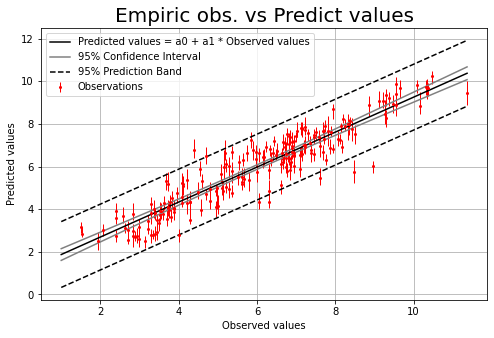

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 1.013, median - 1.016, CI - [0.945-1.076]

SHAP-values for: A_year: mean - 0.274, median - 0.271, CI - [0.22-0.33]

SHAP-values for: Azimuth: mean - 0.281, median - 0.28, CI - [0.224-0.34]

SHAP-values for: D_cm: mean - 0.192, median - 0.194, CI - [0.15-0.233]

SHAP-values for: Distance_km: mean - 0.478, median - 0.476, CI - [0.394-0.552]

SHAP-values for: F_Soil_ID: mean - 0.09, median - 0.089, CI - [0.064-0.115]

SHAP-values for: G_m2_ha: mean - 0.164, median - 0.162, CI - [0.125-0.201]

SHAP-values for: H_m: mean - 0.105, median - 0.103, CI - [0.076-0.133]

SHAP-values for: Species_ID: mean - 0.066, median - 0.066, CI - [0.042-0.089]



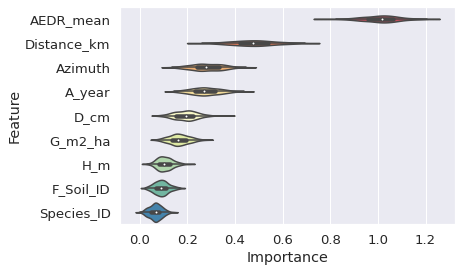

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'Distance_km', 'Azimuth', 'A_year', 'D_cm', 'G_m2_ha', 'H_m', 'F_Soil_ID', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 54.045, median: 52.0,
 pred. interval (P(0.025)-P(0.975)): 20.975-114.15, 
 conf. interval (p-value=0.95): 32.276-72.764 
***
Aggregate bias statistic: 
 mean: -0.015, median: -0.009,
 pred. interval (P(0.025)-P(0.975)): -0.261-0.235, 
 conf. interval (p-value=0.95): -0.142-0.103 
***
Aggregate RMSE statistic: 
 mean: 0.865, median: 0.868, pred. interval (P(0.025)-P(0.975)): 0.648-1.059, 
 conf. interval (p-value=0.95): 0.766-0.969 
***
Aggregate MSE statistic: 
 mean: 0.76, median: 0.754, pred. interval (P(0.025)-P(0.975)): 0.42-1.122, 
 conf. interval (p-value=0.95): 0.588-0.94 
***
Aggregate R^2 statistic: 
 mean: 0.816, median: 0.825, pred. interval (P(0.025)-P(0.975)): 0.698-0.892, 
 conf. interval (p-value=0.95): 0.767-0.864 
***
Aggregate bias(%) statistic: 
 mean: -0.213, median: -0.156, pred. interval (P(0.025)-P(0.975)): -4.459-4.088, 
 conf. interval (p-value=0.95): -2.30

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

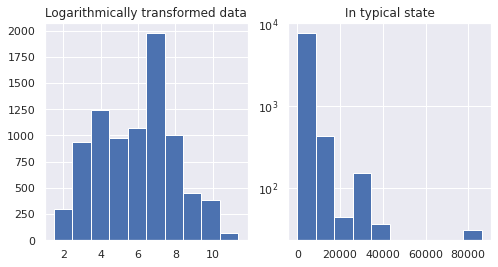

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 2, 4, 6, 8, 10])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 2000, 5000, 10000, 100000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

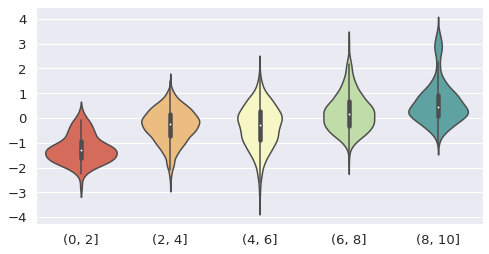

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

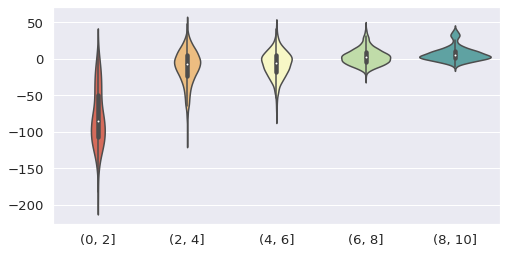

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

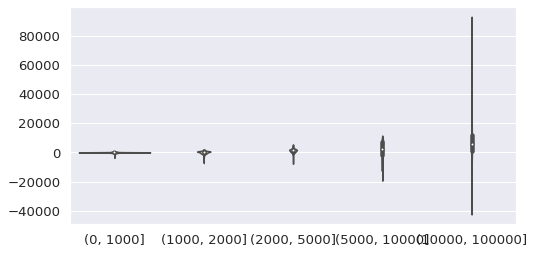

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

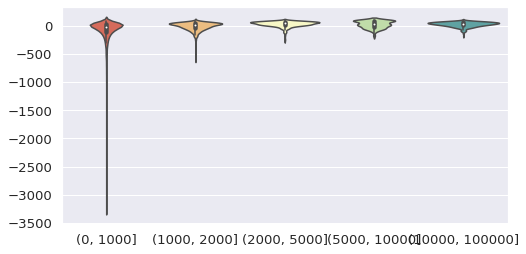

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.97138
[1]	validation_0-rmse:4.26627
[2]	validation_0-rmse:3.66970
[3]	validation_0-rmse:3.16045
[4]	validation_0-rmse:2.75727
[5]	validation_0-rmse:2.37999
[6]	validation_0-rmse:2.10388
[7]	validation_0-rmse:1.83526


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.61900
[9]	validation_0-rmse:1.43117
[10]	validation_0-rmse:1.29001
[11]	validation_0-rmse:1.16853
[12]	validation_0-rmse:1.08342
[13]	validation_0-rmse:1.01401
[14]	validation_0-rmse:0.93891
[15]	validation_0-rmse:0.88888
[16]	validation_0-rmse:0.83725
[17]	validation_0-rmse:0.79331
[18]	validation_0-rmse:0.75536
[19]	validation_0-rmse:0.74025
[20]	validation_0-rmse:0.72373
[21]	validation_0-rmse:0.70786
[22]	validation_0-rmse:0.69139
[23]	validation_0-rmse:0.67422
[24]	validation_0-rmse:0.65472
[25]	validation_0-rmse:0.64504
[26]	validation_0-rmse:0.63947
[27]	validation_0-rmse:0.62802
[28]	validation_0-rmse:0.61652
[29]	validation_0-rmse:0.60598
[30]	validation_0-rmse:0.59280
[31]	validation_0-rmse:0.57967
[32]	validation_0-rmse:0.57147
[33]	validation_0-rmse:0.56739
[34]	validation_0-rmse:0.56519
[35]	validation_0-rmse:0.55070
[36]	validation_0-rmse:0.54054
[37]	validation_0-rmse:0.53492
[38]	validation_0-rmse:0.52562
[39]	validation_0-rmse:0.52090
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 146


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

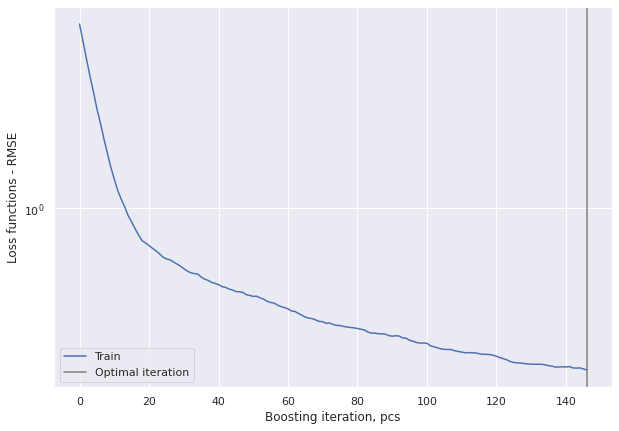

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.17
RMSE: 0.2
Relative RMSE(%):  4.112
MSE: 0.1
R square: 98.6%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.986
Uncertainty
a0: 0.13+/-0.05
a1: 0.977+/-0.008


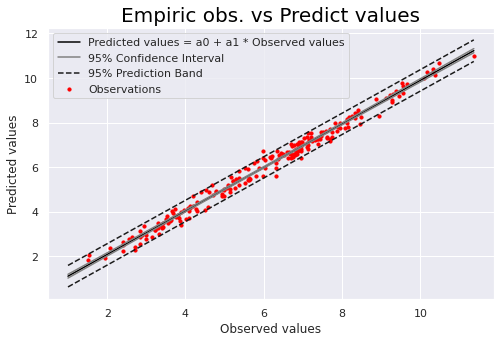

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

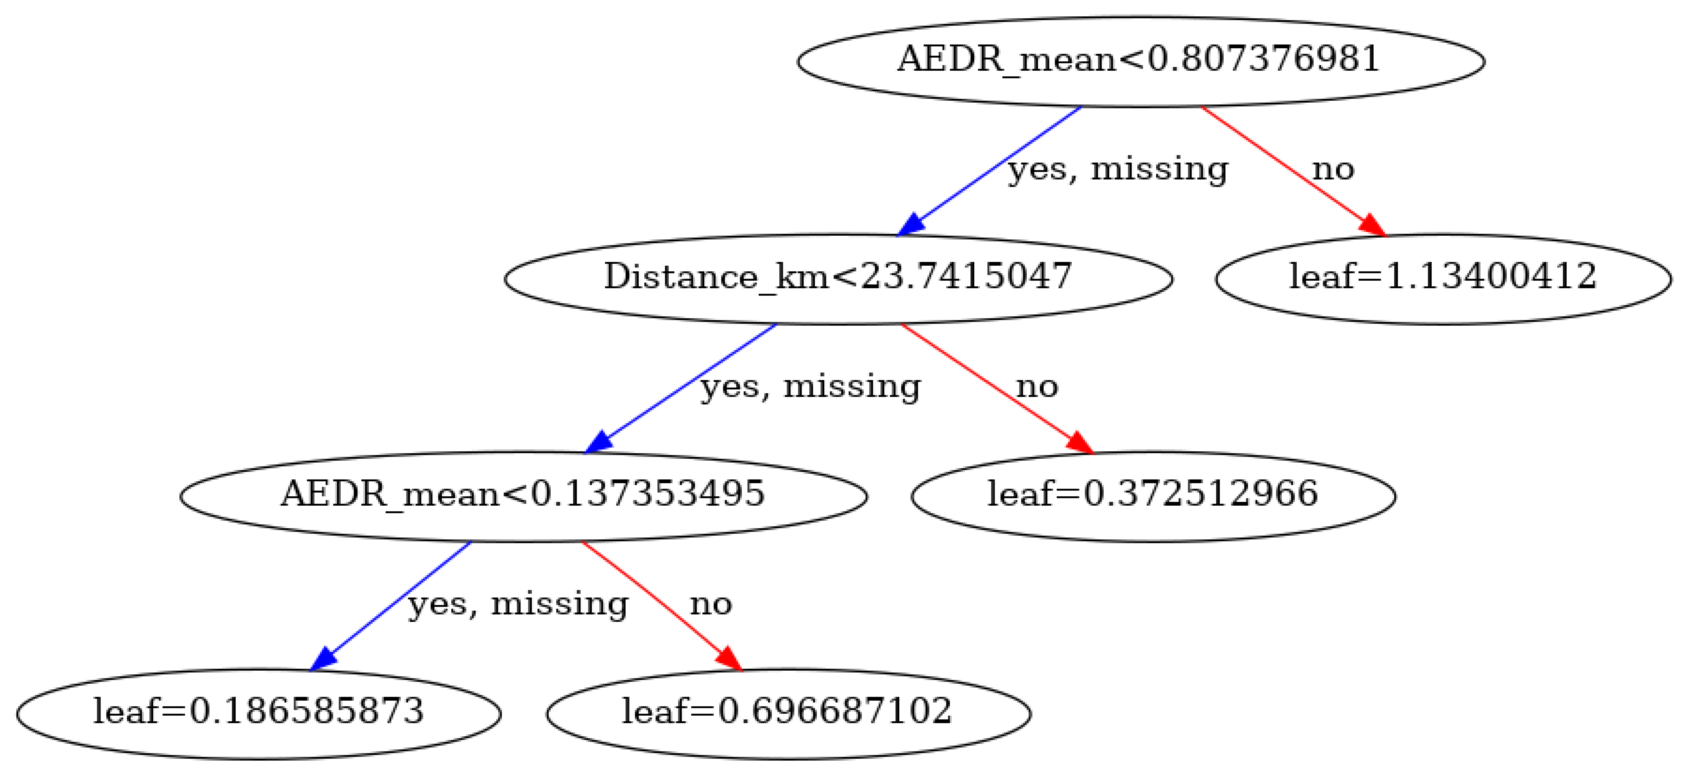

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

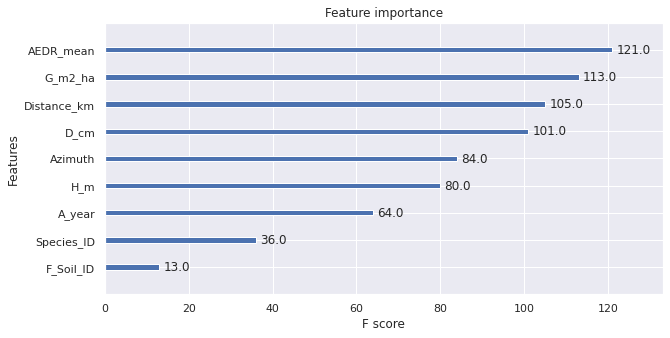

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

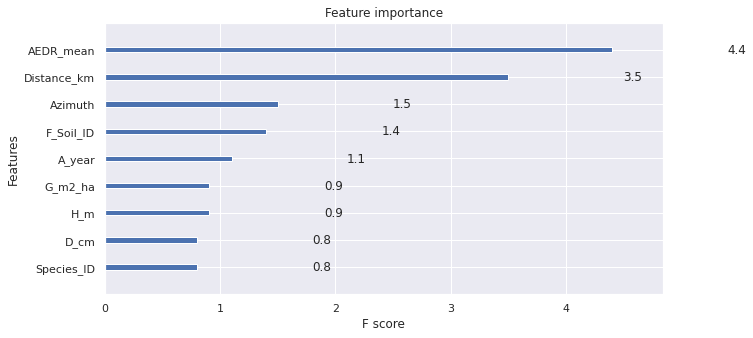

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

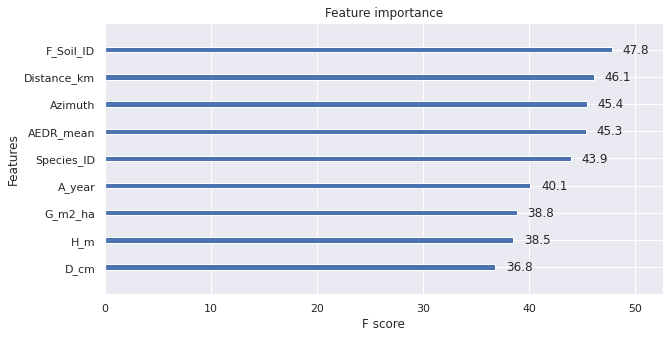

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


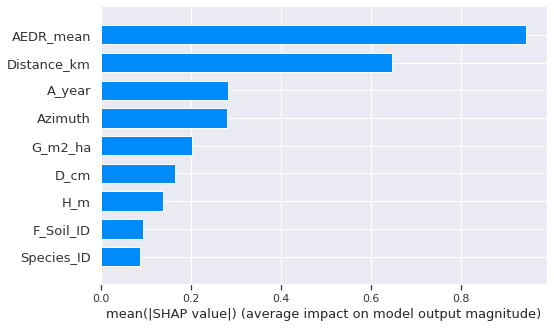

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

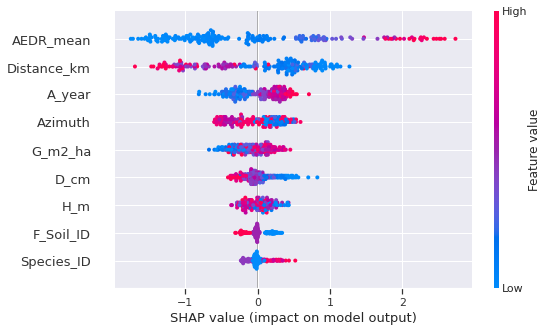

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

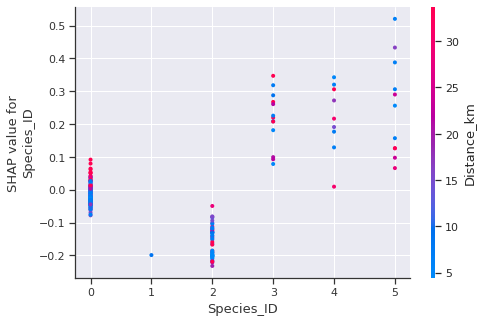

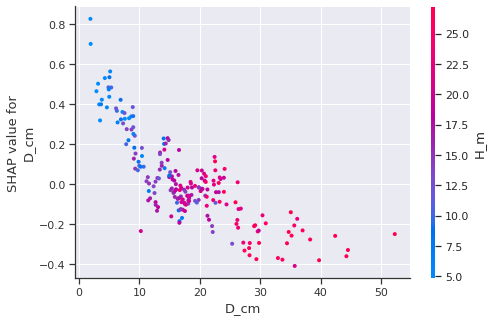

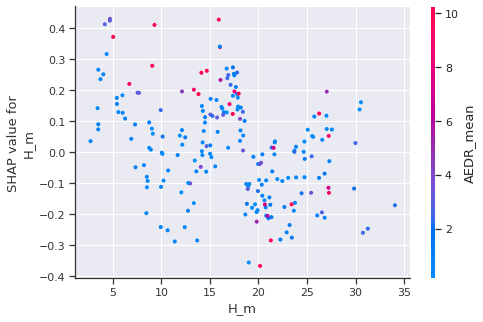

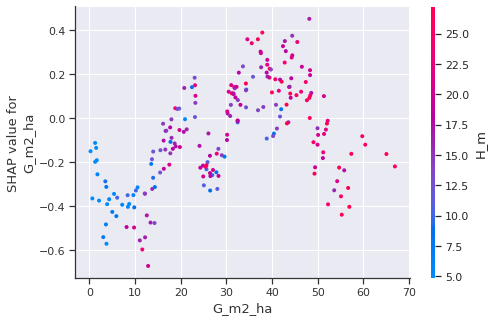

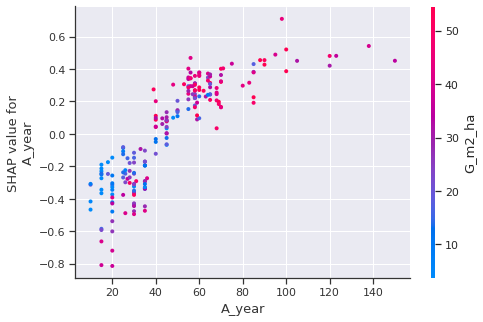

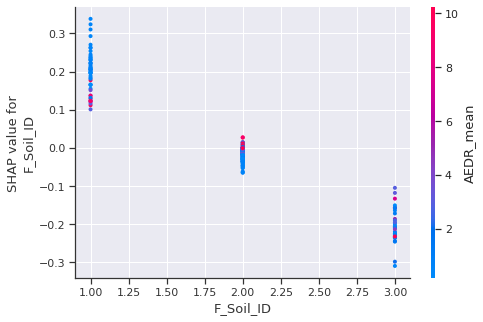

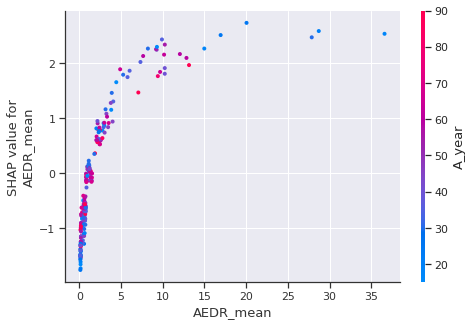

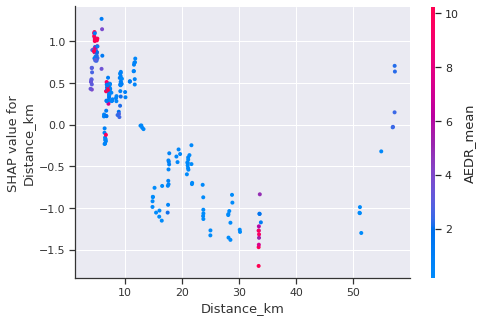

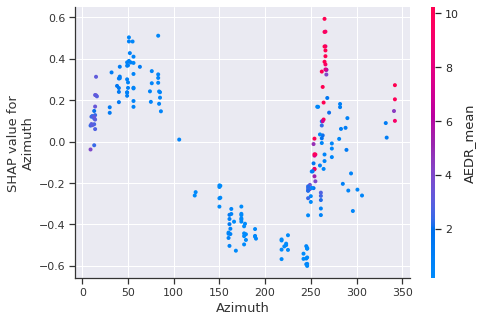

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_with_geo_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_with_geo_XGB_model.txt")